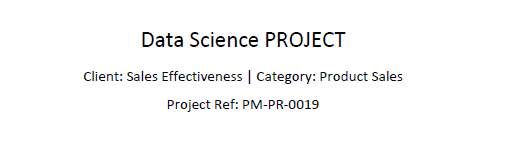

# Project Ref: PM-PR-0019 - Sales Effectiveness

# Project team's ID : PTID-CDS-OCT-23-1666

# 1. Business case

**FicZon Inc, an IT solution provider, is facing challenges in maintaining sales effectiveness due to the increasing competition in the market. The company heavily relies on digital channels for lead generation through its website. To overcome the sales dip and enhance efficiency, FicZon aims to leverage machine learning for lead categorization. This initiative is expected to streamline the sales process and boost overall sales effectiveness.**

# 2. Project Goal:

**2.1 Data Exploration Insights - Sales Effectiveness:**

- Understand and analyze the factors influencing sales effectiveness.

- Explore patterns and correlations in the data.

**2.2 ML Model to Predict Lead Category (High Potential, Low Potential):**

- Develop a machine learning model to predict lead quality.

- Categorize leads as either High Potential or Low Potential.

# 3. Importing some basic libraries and reading the dataset

In [1]:
# It is used for data manipulation and analysis.
import pandas as pd
# It is used for numerical operations.
import numpy as np

# Ignore warnings messages to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# It is used for creating plots and charts.
import matplotlib.pyplot as plt
# It is used to display plots inline in jupyter notebook.
%matplotlib inline

# It is used for statistical data visualization.
import seaborn as sns

from imblearn.over_sampling import SMOTE

import mysql.connector

# 4. Connect the database

In [2]:
# Establish a connection to the MySQL server
connection=mysql.connector.connect(host='18.136.157.135',
                                  user= 'dm_team2',
                                  password='DM!$Team&27@9!20!' )


In [3]:
# Create a cursor object to interact with the database
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


- a cursor object is created using the cursor() method of the connection object. The cursor is an interface to the database that allows you to execute SQL queries and fetch results.

- The execute() method is used to execute a SQL query. In this case, the query is 'SHOW DATABASES', which retrieves a list of databases on the MySQL server.

- This loop iterates over the result set obtained from executing the SQL query. The result set contains the names of databases on the MySQL server. The print(i) statement prints each database name.

**output**
- The output consists of tuples, where each tuple contains a single string representing the name of a database. In this case, there are two databases:

>- 1. 'information_schema': This is a built-in MySQL database that provides information about the server and its operations.

>- 2. 'project_sales': This appears to be a specific database, likely containing data related to sales projects.

- The output indicates that these are the databases available on the MySQL server based on the result of the 'SHOW DATABASES' query.

In [4]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

# 5. Read SQL Query with Pandas:

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


- The read_sql_query function from Pandas is used to execute the SQL query 'SHOW TABLES' and read the result into a Pandas DataFrame. This assumes that connection is a valid connection to a MySQL database.



# 6. Load the dataset

### Let us now load the data and story it as a pandas dataframe. Here we are displaying the first 5 rows of our dataframe.

In [6]:
query = "select * from data" # SQL statement
data = pd.read_sql(query,connection)#what Query and where to execute
print(data.shape)
data.head()

(7422, 9)


Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open

# 7. Feature Drop Operation

In [7]:
drop_col=['Created' , 'Mobile' , 'EMAIL']
data.drop(drop_col , inplace=True , axis=1)

**Analysis:**
>- we are removed unnecessary or unwanted features ['Created' , 'Mobile' , 'EMAIL'] from the dataset.It could be done to improve computational efficiency, remove redundant information, or enhance the performance of machine learning models by eliminating irrelevant columns.

# 8. Data exploration

## 8.1 To display 5 rows from starting of the dataset.

In [8]:
data.head()

Product_ID   Source     Sales_Agent Location Delivery_Mode Status
0             Website  Sales-Agent-11                 Mode-5   Open
1             Website  Sales-Agent-10                 Mode-5   Open
2             Website  Sales-Agent-10                 Mode-5   Open
3             Website  Sales-Agent-10                 Mode-5   Open
4             Website  Sales-Agent-10                 Mode-5   Open

## 8.2 To display 5 rows randomly of the dataset.

In [9]:
data.sample(5)

Product_ID            Source    Sales_Agent         Location  \
6396         19  Personal Contact  Sales-Agent-9        Bangalore   
2873         18           Website  Sales-Agent-4  Other Locations   
6636          9  Live Chat-Direct  Sales-Agent-7        Bangalore   
1220         18           Website  Sales-Agent-7             Pune   
1540          9              Call  Sales-Agent-4        Bangalore   

     Delivery_Mode                Status  
6396        Mode-1        Not Responding  
2873        Mode-5          Just Enquiry  
6636        Mode-1  In Progress Negative  
1220        Mode-3        Not Responding  
1540        Mode-5          Just Enquiry

## 8.3 To display last 5 rows of the dataset.

In [10]:
data.tail()

Product_ID            Source     Sales_Agent         Location  \
7417          9              Call   Sales-Agent-6           Mumbai   
7418         15              Call  Sales-Agent-12  Other Locations   
7419          5  Live Chat-Direct  Sales-Agent-11        Bangalore   
7420         21          CRM form   Sales-Agent-4  Other Locations   
7421         25           Website   Sales-Agent-3          Chennai   

     Delivery_Mode          Status  
7417        Mode-4            LOST  
7418        Mode-5            LOST  
7419        Mode-1  Not Responding  
7420        Mode-1    Just Enquiry  
7421        Mode-1       CONVERTED

# 9. Basic information of dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   object
 1   Source         7422 non-null   object
 2   Sales_Agent    7422 non-null   object
 3   Location       7422 non-null   object
 4   Delivery_Mode  7422 non-null   object
 5   Status         7422 non-null   object
dtypes: object(6)
memory usage: 348.0+ KB


**Observations:**
>- The DataFrame has a total of 7422 entries.

>- Each column has 7422 non-null (non-missing) values, indicating there are no missing values in any of the columns.

>- All columns are of the 'object' data type, suggesting that the data in these columns is categorical or text.

# 10. Chceking size of of the dataset

### 10.1. Size of dataset

In [12]:
print(f'\033[1;31m  \033[1m Size of given dataset {data.size}')

   Size of given dataset 44532


###  10.2. Memory Usage Analysis

In [13]:
data.memory_usage()

Index              128
Product_ID       59376
Source           59376
Sales_Agent      59376
Location         59376
Delivery_Mode    59376
Status           59376
dtype: int64

# 11. Chceking no. of rows and columns

In [14]:
print(f'\033[1;31m  \033[1m Given dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

   Given dataset contains 7422 rows and 6 columns.


# 12. Now let us analyse the statistical description of our data.

In [15]:
data.describe()

Product_ID Source    Sales_Agent         Location Delivery_Mode  \
count        7422   7422           7422             7422          7422   
unique         30     26             13               18             5   
top            18   Call  Sales-Agent-4  Other Locations        Mode-5   
freq         1711   2547           1500             2500          2975   

           Status  
count        7422  
unique         11  
top     Junk Lead  
freq         1536

# 13. Differnt types of columns in dataset

In [16]:
data_col_all=list(data.columns)
data_col_float=list(data.select_dtypes("float").columns)
data_col_int=list(data.select_dtypes("integer").columns)
data_col_obj=list(data.select_dtypes("object").columns)

### 13.1. Print all the columns

In [17]:
data_col_all

['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

### 13.2. Information about columns of datatype float

In [18]:
print(data[data_col_float].info())
print(f'\033[1;31m  \033[1m Given dataset contains  {data[data_col_float].shape[1]} float columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Empty DataFrame
None
   Given dataset contains  0 float columns.


### 13.3. Information about columns of datatype integer

In [19]:
print(data[data_col_int].info())
print(f'\033[1;31m  \033[1m Given dataset contains  {data[data_col_int].shape[1]} integer columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Empty DataFrame
None
   Given dataset contains  0 integer columns.


### 13.4.1. Information about columns of datatype object

In [20]:
print(data[data_col_obj].info())
print(f'\033[1;31m  \033[1m Given dataset contains  {data[data_col_obj].shape[1]} categorical columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7422 non-null   object
 1   Source         7422 non-null   object
 2   Sales_Agent    7422 non-null   object
 3   Location       7422 non-null   object
 4   Delivery_Mode  7422 non-null   object
 5   Status         7422 non-null   object
dtypes: object(6)
memory usage: 348.0+ KB
None
   Given dataset contains  6 categorical columns.


### 13.4.2. Key description\statistics of columns of datatype object

In [21]:
data.describe(include='object')

Product_ID Source    Sales_Agent         Location Delivery_Mode  \
count        7422   7422           7422             7422          7422   
unique         30     26             13               18             5   
top            18   Call  Sales-Agent-4  Other Locations        Mode-5   
freq         1711   2547           1500             2500          2975   

           Status  
count        7422  
unique         11  
top     Junk Lead  
freq         1536

# 14. Data Preprocessing , Data Manipulation and Cleaning.

## 14.1. Check for duplicate data

In [22]:
print("\033[1;31m  \033[1m Total no of duplicate value :-",data.duplicated().sum())

   Total no of duplicate value :- 2612


## 14.2. To check all the null values from the dataset

In [23]:
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

**Observations:**
>- There are no missing values in any of the columns, and the dataset is complete in terms of these specific features. Having a dataset without missing values is beneficial for analysis and modeling,

# 14.3.0. Unique value in dataset

### 14.3.1. Unique Columns

In [24]:
num_unique_col=data.nunique()
print(num_unique_col)
print("\033[1;31m  \033[1m Total no of columns contain unique values :",len(num_unique_col))

Product_ID       30
Source           26
Sales_Agent      13
Location         18
Delivery_Mode     5
Status           11
dtype: int64
   Total no of columns contain unique values : 6


### 14.3.2. Uniqueness of columns

In [25]:
unique_values=data.apply(pd.Series.unique)
unique_values

Product_ID       [, 9, 19, 18, 15, 27, 5, 2, 3, 25, 10, 20, 11,...
Source           [Website, , Live Chat-Google Organic, Call, Li...
Sales_Agent      [Sales-Agent-11, Sales-Agent-10, Sales-Agent-3...
Location         [, Bangalore, Other Locations, UAE, Trivandrum...
Delivery_Mode             [Mode-5, Mode-1, Mode-3, Mode-2, Mode-4]
Status           [Open, Potential, In Progress Positive, Not Re...
dtype: object

## 14.3.3.0. Exploration of categorical Columns: Unique Values and Value Counts

### 14.3.3.1. Iterating Over categorical Columns and Printing Unique Values

In [26]:
# Iterate over each categorical column in 'data_col_obj'.
for i in data_col_obj :
    
    # It will print unique values and column name
    print(data[i].unique(), i)
    
    # It will print a seperator for clarity.
    print("**********************")

['' '9' '19' '18' '15' '27' '5' '2' '3' '25' '10' '20' '11' '21' '1' '12'
 '13' '17' '24' '26' '16' '23' '22' '8' '14' '6' '0' '28' '7' '4'] Product_ID
**********************
['Website' '' 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial'] Source
**********************
['Sales-Agent-11' 'Sales-Agent-10' 'Sales-Agent-3' 'Sales-Agent-4'
 'Sales-Agent-9' 'Sales-Agent-7' '' 'Sales-Agent-8' 'Sales-Agent-5'
 'Sales-Agent-2' 'Sales-Agent-12' 'Sales-Agent-1' 'Sales-Agent-6'] Sales_Agent
**********************
['' 'Bangalore' 'Other Locations' 'UAE' 'Trivandrum' 'Hyderabad' 'Chennai'
 'UK' 'USA' 'Delhi' 'Mumbai' 'Kolkata' 'Sin

### 14.3.3.2. Iterating Over Categorical Columns and Printing Value Counts

In [27]:
# Iterate over each categorical column in 'data_col_obj'.
for i in data_col_obj :
    
    # It will print value counts for each unique value in the column.
    print(data[i].value_counts())
    
    # It will print a seperator for clarity.
    print("**********************")

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64
**********************
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign

# 15. Univariate Analysis

>- Analysing single variable/column/feature.

>- In Univariate Analysis, we check the distribution of each column.

# 15.1. Product_ID Distribution Analysis: Quantifying and Visualizing the Frequency of Unique Products

### 15.1.1. Product_ID Distribution Analysis: Unveiling the Frequency of Unique Products in the Dataset.

In [28]:
data.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

### 15.1.2. Visualizing Product_ID Distribution: Categorical Count Plot with Rotated X-axis Labels

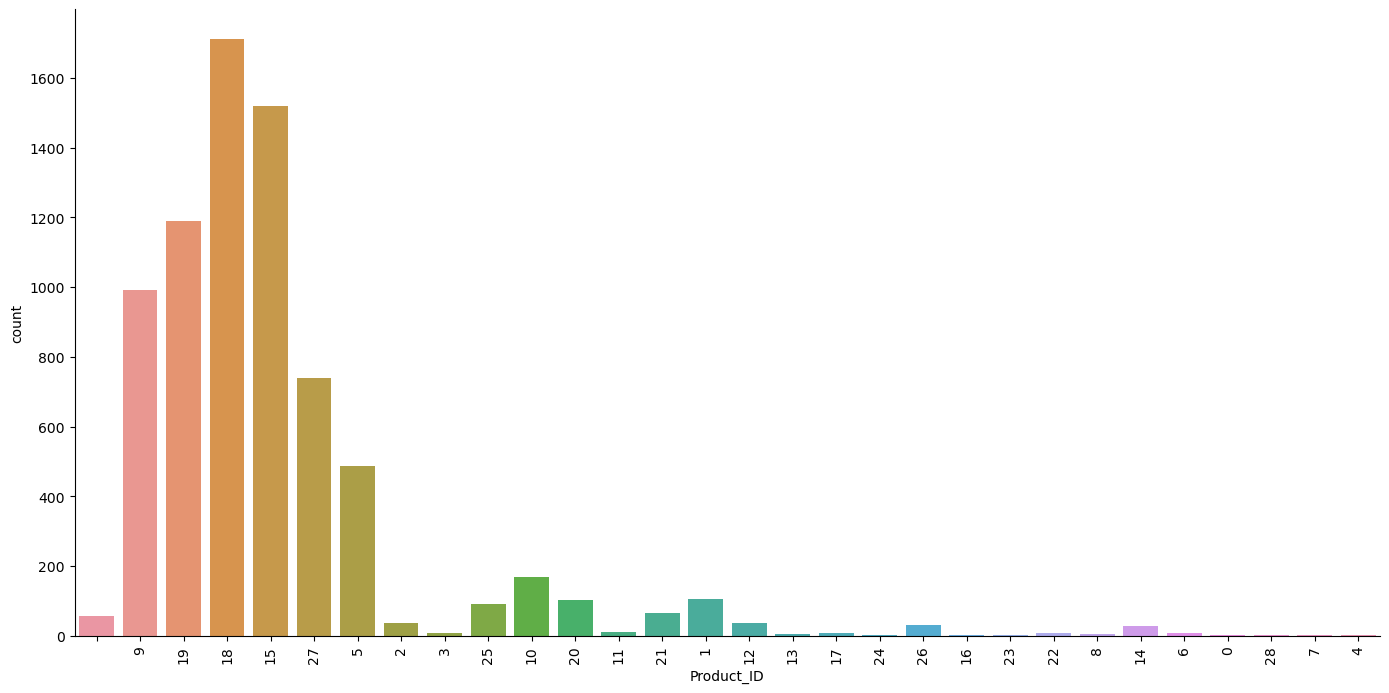

In [29]:
cat_plot=sns.catplot(x='Product_ID',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)

### **Insights from Product ID features:**

1. **Product ID Distribution:**
   - The output shows a list of unique product IDs along with the count of occurrences for each ID.
   - The counts represent the number of times each product ID appears in the dataset.

2. **Top Products:**
   - Product ID "18.0" appears most frequently with a count of 1711, indicating that this particular product is the most common in the dataset.
   - Following closely are product IDs "15.0" and "19.0" with counts of 1518 and 1189, respectively.

3. **Variability in Product Distribution:**
   - The distribution of product IDs is not uniform, indicating variability in the popularity or usage of different products.
   - Some products have a significantly higher occurrence than others, suggesting that certain products are more frequently associated with the data entries.

4. **Low Frequency Products:**
   - Several product IDs have lower counts, indicating that they are less common in the dataset.
   - Products such as "28.0," "7.0," and "4.0" appear only once, suggesting that they are infrequently represented in the data.

5. **Potential Actions:**
   - This analysis can guide decision-making in terms of focusing marketing efforts on the most popular products or understanding the market demand for specific products.
   - For products with low occurrences, it might be beneficial to investigate why they are less common and whether there are opportunities to promote or improve them.


**Output provides valuable insights into the distribution of product IDs in the dataset, which can be crucial for strategic business decisions, marketing strategies, and understanding the importance of different products in the sales data.**

## 15.2. Lead Source Distribution Analysis: Quantifying and Visualizing the Frequency of Unique Lead Sources.

### 15.2.1. Lead Source Distribution Analysis: Understanding the Landscape of Lead Generation Channels.

In [30]:
data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

### 15.2.2. Visualizing Lead Source Distribution: Categorical Count Plot 

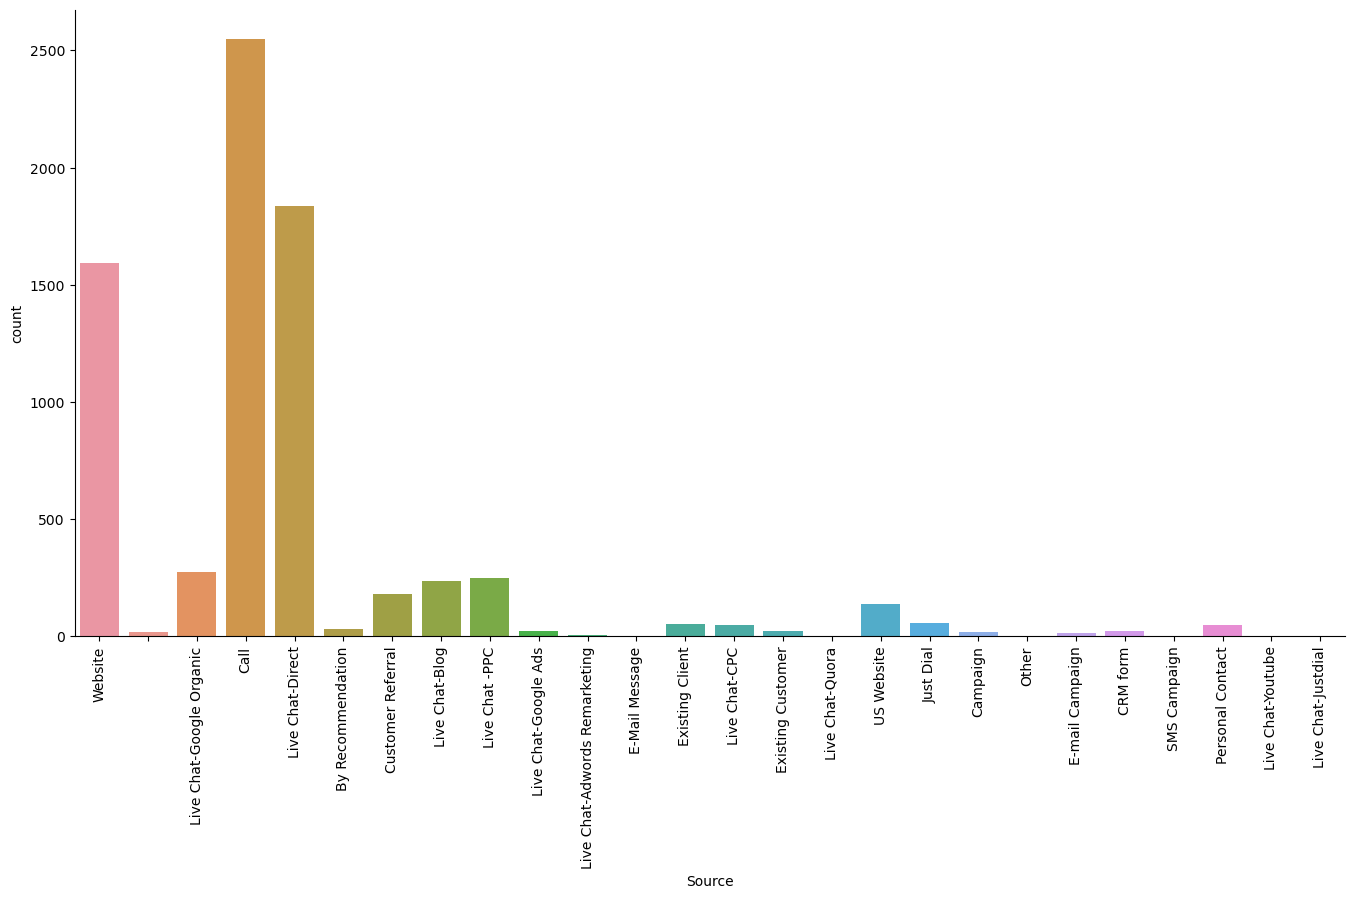

In [31]:
cat_plot=sns.catplot(x='Source',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)

### **Insights from Source features:**

1. **Source Distribution:**
   - The output displays a list of unique sources along with the count of occurrences for each source in the dataset.
   - The counts represent the number of times each source appears in the dataset.

2. **Top Sources:**
   - "Call" is the most frequently occurring source, appearing 2547 times. This suggests that the majority of leads or interactions come from phone calls.
   - Following "Call," the top sources include "Live Chat-Direct" (1834 occurrences) and "Website" (1594 occurrences).

3. **Variability in Source Distribution:**
   - The distribution of sources is not uniform, indicating variability in the channels through which leads are generated.
   - Some sources are more prevalent than others, and understanding this distribution is essential for optimizing marketing and sales efforts.

4. **Potential Marketing Insights:**
   - Marketers can use this information to prioritize and allocate resources to the most effective lead generation channels.
   - Understanding the popularity of each source helps in tailoring marketing strategies and campaigns to target the most impactful channels.

5. **Customer Referral and Existing Clients:**
   - "Customer Referral" and "Existing Client" are among the sources with counts (180 and 51, respectively), indicating that existing customers and referrals contribute to lead generation.

6. **Digital Marketing Channels:**
   - Several sources indicate digital marketing channels such as "Live Chat-Google Organic," "Live Chat -PPC," and "Live Chat-Blog," suggesting a mix of organic and paid digital marketing efforts.

7. **Low Frequency Sources:**
   - Some sources have lower counts, indicating that they are less common in the dataset. Examples include "E-Mail Message," "Live Chat-Quora," and "SMS Campaign."

8. **Data Quality Check:**
   - The output can be used for a quick data quality check to identify any unexpected or irregular values in the "Source" column.

**Output provides valuable insights into the distribution of lead sources in the dataset, helping businesses understand the effectiveness of different channels in lead generation. This information is crucial for optimizing marketing strategies, allocating resources effectively, and enhancing overall sales and marketing performance.**

## 15.3. Location Distribution Analysis: Quantifying and Visualizing the Frequency of Unique Locations

### 15.3.1. Location Distribution Analysis: Uncovering the Geographic Spread of Data Entries.

In [32]:
data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

### 15.3.2. Visualizing Location Distribution: Categorical Count Plot

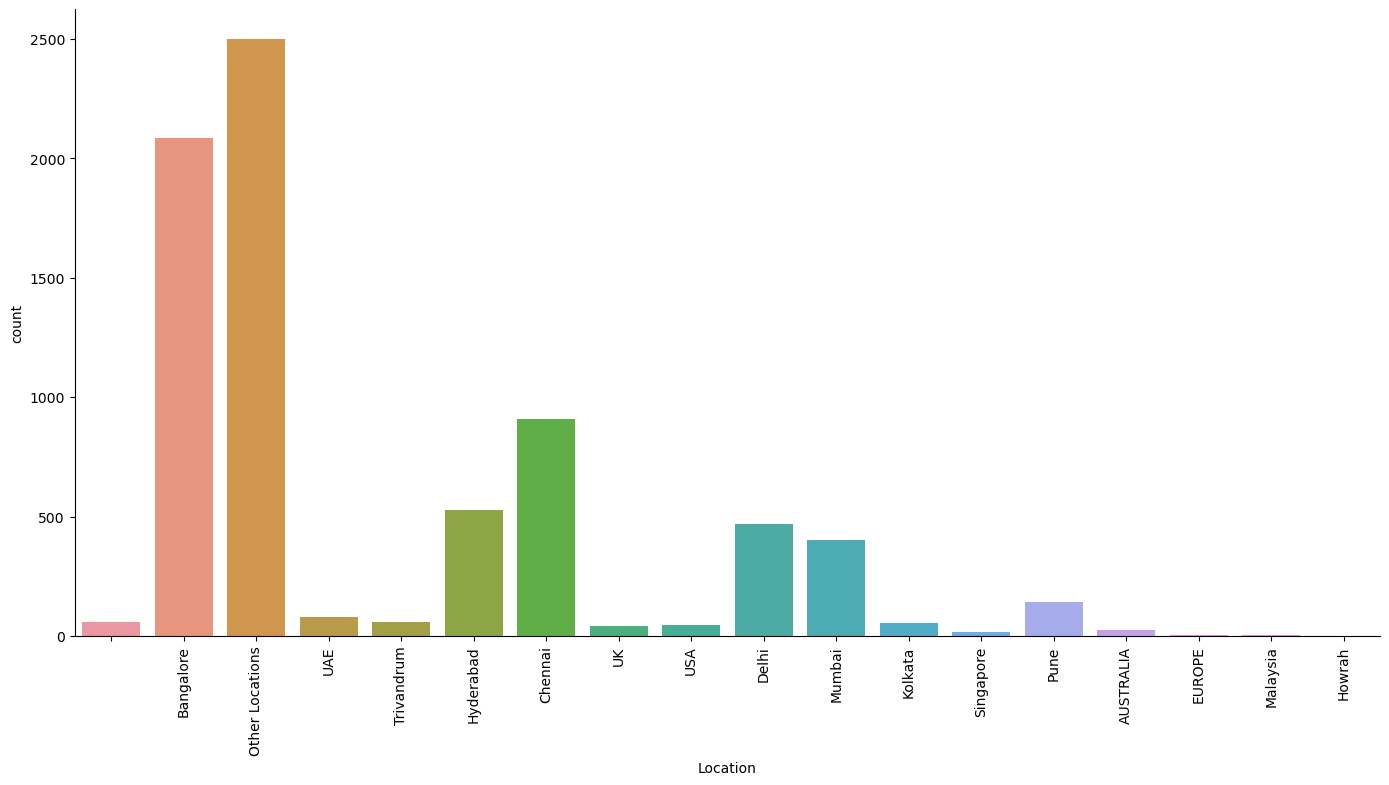

In [33]:
cat_plot=sns.catplot(x='Location',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)

### **Insights from Locations features:**

1. **Top Locations:**
   - "Other Locations" is the most frequently occurring location, with 2500 entries. This generic category may represent diverse or unspecified locations.
   - Following "Other Locations," the top geographical entries include "Bangalore" (2084), "Chennai" (909), and "Hyderabad" (528).

2. **Geographical Diversity:**
   - The distribution shows a diverse set of locations, indicating the reach or presence of data entries across various geographical areas.
   - This information is valuable for understanding the regional spread of data and tailoring strategies based on geographical insights.

3. **International Presence:**
   - Locations such as "UAE," "USA," "UK," "AUSTRALIA," "Singapore," "Malaysia," and "EUROPE" suggest an international presence in the dataset.
   - The counts for these international locations provide an indication of the extent of global interactions or business operations.

4. **City-wise Insights:**
   - Among Indian cities, "Bangalore," "Chennai," "Hyderabad," "Delhi," and "Mumbai" have notable representations, suggesting significant business activities in these areas.

5. **Smaller Locations:**
   - Locations with lower counts, such as "Howrah," "EUROPE," and "Malaysia," indicate smaller or less frequent occurrences in the dataset.

6. **Data Quality Check:**
   - The output serves as a quick data quality check, highlighting any unexpected or irregular values in the "Location" column.

7. **Strategic Decision-making:**
   - Understanding the distribution of locations is crucial for making strategic decisions related to marketing, sales, and business expansion.
   - It can help in targeting specific regions, customizing services based on local preferences, and identifying potential areas for business growth.

The location distribution analysis provides valuable insights into the geographic representation of data entries, supporting strategic decision-making for businesses with a diverse or international presence.

## 15.4. Sales Agent Distribution Analysis: Quantifying and Visualizing the Frequency of Unique Sales Agents.

### 15.4.1. Sales Agent Distribution Analysis: Unveiling the Performance and Contribution of Sales Agents.

In [34]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

### 15.4.2. Visualizing Sales Agent Distribution: Categorical Count Plot

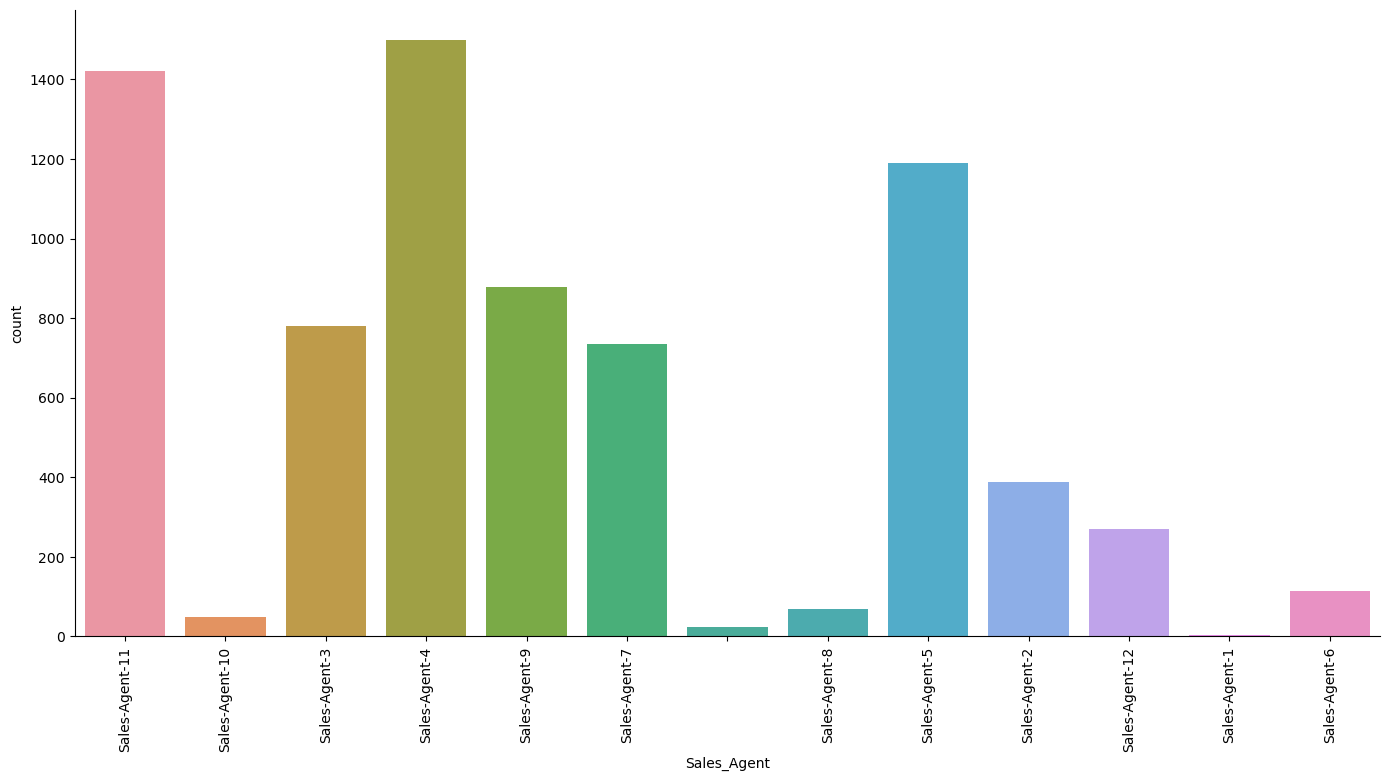

In [35]:
cat_plot=sns.catplot(x='Sales_Agent',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)


### **Insights from Sales-Agent features:**

1. **Top Performing Sales Agents:**
   - "Sales-Agent-4" emerges as the top-performing sales agent with 1500 entries, suggesting a significant contribution to sales activities.
   - Following closely are "Sales-Agent-11" (1420) and "Sales-Agent-5" (1190), indicating their substantial involvement in sales.

2. **Distribution of Sales Agents:**
   - The distribution reveals varying levels of involvement among sales agents, highlighting the diversity in their contributions.
   - The counts represent the number of occurrences of each sales agent in the dataset.

3. **Individual Sales Agent Contributions:**
   - The counts for each sales agent provide a quantitative measure of their individual contributions to the sales pipeline.
   - Sales agents with higher counts may have a more significant impact on overall sales performance.

4. **Identifying Key Contributors:**
   - "Sales-Agent-4," "Sales-Agent-11," and "Sales-Agent-5" emerge as key contributors, warranting further analysis into their strategies and approaches.

5. **Lower Performing Sales Agents:**
   - Agents such as "Sales-Agent-10," "Sales-Agent-1," and "Sales-Agent-8" have lower counts, indicating relatively less involvement in sales activities.

6. **Data Quality Check:**
   - The output serves as a quick data quality check, ensuring that sales agents are properly labeled and that there are no unexpected or irregular values.

7. **Performance Evaluation:**
   - The analysis supports performance evaluation and can guide decisions related to resource allocation, training, or recognition for sales agents.
   - It provides insights into who the top performers are and where improvements or additional support may be needed.

8. **Strategic Decision-making:**
   - Understanding the distribution of sales agent contributions is crucial for strategic decision-making in sales management.
   - It helps in identifying areas for improvement, optimizing sales team structure, and recognizing and rewarding top performers.

The Sales Agent Distribution Analysis offers valuable insights into the individual contributions of sales agents, enabling data-driven decision-making and strategic planning within the sales team.

## 15.5. Delivery Mode Distribution Analysis: Quantifying and Visualizing the Frequency of Different Delivery Modes
 

### 15.5.1. Delivery Mode Distribution Analysis: Evaluating the Frequency of Different Delivery Modes.

In [36]:
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

### 15.5.2. Visualizing Delivery Mode Distribution: Categorical Count Plot

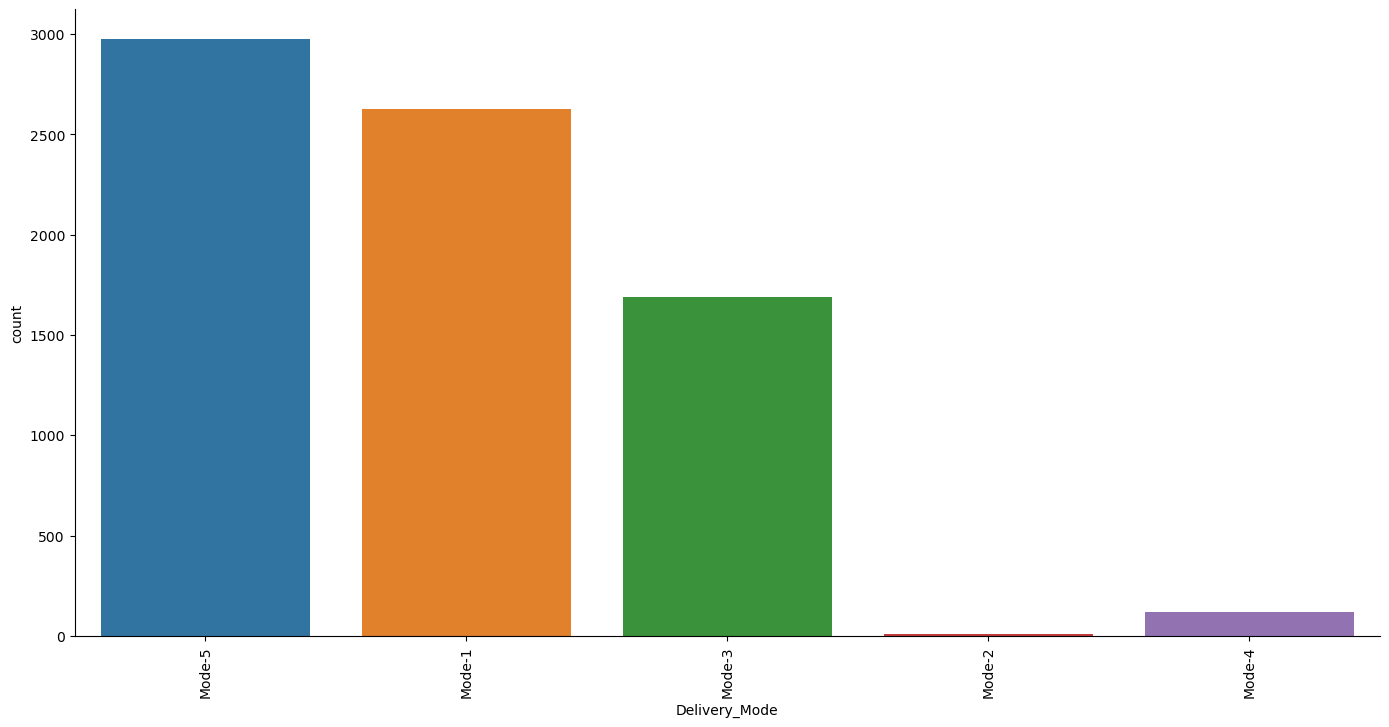

In [37]:
cat_plot=sns.catplot(x='Delivery_Mode',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)


### **Insights from Delivery Mode features:**

1. **Dominant Delivery Modes:**
   - "Mode-5" is the most prevalent delivery mode, appearing 2975 times, indicating its dominance in the dataset.
   - Following closely is "Mode-1" with 2627 occurrences, suggesting it as another commonly used delivery mode.

2. **Distribution of Delivery Modes:**
   - The distribution shows varying levels of usage for different delivery modes, providing an overview of their relative popularity.
   - Each count represents the frequency of a particular delivery mode in the dataset.

3. **Usage Disparities:**
   - There is a notable disparity in usage between the dominant modes ("Mode-5" and "Mode-1") and less frequently used modes ("Mode-4" and "Mode-2").
   - Understanding these disparities can guide decisions related to resource allocation and optimization.

4. **Low Frequency Delivery Modes:**
   - Modes like "Mode-4" and "Mode-2" have lower counts, indicating that they are less commonly utilized for deliveries.

5. **Data Quality Check:**
   - The output serves as a quick data quality check, ensuring that delivery modes are properly labeled and that there are no unexpected or irregular values.

6. **Strategic Decision-making:**
   - Understanding the distribution of delivery modes is crucial for strategic decision-making in logistics and operations.
   - It helps in optimizing delivery processes, identifying preferred modes, and addressing potential areas for improvement.

7. **Resource Allocation:**
   - The analysis can inform decisions about resource allocation, such as assigning more resources to the dominant delivery modes or investigating ways to enhance the efficiency of less frequently used modes.

8. **Adaptation and Optimization:**
   - The data provides insights into the adaptability of different delivery modes to customer preferences or market demands, guiding optimization strategies. 

The Delivery Mode Distribution Analysis offers valuable insights into the usage patterns of different delivery modes, facilitating strategic decisions, resource allocation, and process optimization in logistics and operations.

## 15.6. Lead Status Distribution Analysis: Quantifying and Visualizing the Composition of Lead Status Categories

### 15.6.1. Lead Status Distribution Analysis: Understanding the Composition of Lead Status Categories

In [38]:
data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

### 15.6.2. Visualizing Lead Status Distribution: Categorical Count Plot with Rotated X-axis Labels

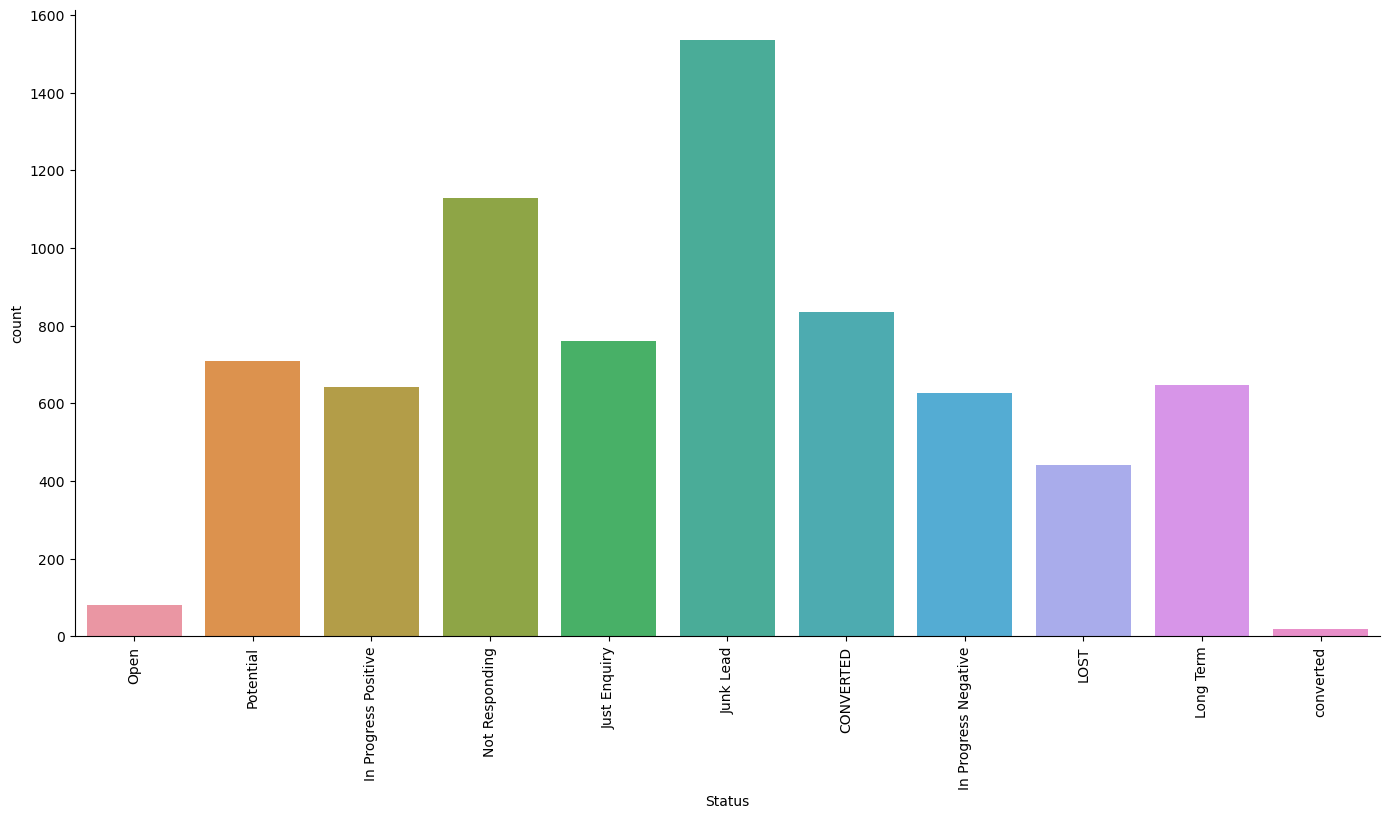

In [39]:
cat_plot=sns.catplot(x='Status',data=data,kind='count',height=7,aspect=2)
cat_plot.set_xticklabels(rotation=90)

### **Insights from Status features:**
The output provides insights into the distribution of unique values in the "Status" column of the dataset, which represents the status of leads. Here's an analysis of the results:

1. **Common Lead Status Categories:**
   - "Junk Lead" is the most frequently assigned status, appearing 1536 times, indicating a significant presence of leads categorized as 'Junk.'
   - Following "Junk Lead," other common status categories include "Not Responding" (1129) and "CONVERTED" (834).

2. **Conversion Metrics:**
   - "CONVERTED" and "converted" are status categories representing successfully converted leads. Combining their counts gives insights into the overall conversion metrics.
   - Understanding the number of successfully converted leads is crucial for evaluating the effectiveness of sales efforts.

3. **Lead Engagement:**
   - Categories such as "Just Enquiry," "Potential," "Long Term," "In Progress Positive," and "In Progress Negative" represent different stages of lead engagement.
   - Analyzing these categories provides insights into the distribution of leads across various stages of the sales funnel.

4. **Lost Opportunities:**
   - "LOST" represents leads that were lost, providing information about missed opportunities. Analyzing the reasons for lost leads can guide strategies for lead retention.

5. **Open Leads:**
   - "Open" suggests leads that are currently in an open status, requiring further attention or follow-up. The count of open leads indicates the ongoing engagement level.

6. **Data Quality Check:**
   - The output serves as a quick data quality check, ensuring that lead status categories are properly labeled and that there are no unexpected or irregular values.

7. **Strategic Decision-making:**
   - Understanding the distribution of lead status is crucial for strategic decision-making in sales and marketing.
   - It helps in identifying areas for improvement, optimizing lead nurturing strategies, and focusing efforts on leads with higher conversion potential.

8. **Lead Funnel Analysis:**
   - Analyzing the distribution across different status categories provides a visual representation of the lead funnel, highlighting the flow of leads from initial contact to conversion or loss.

The Lead Status Distribution Analysis offers valuable insights into the composition of lead status categories, enabling businesses to optimize their lead management processes and make informed decisions regarding resource allocation and strategy development.

# 16. Bivariate Analysis

**The purpose of Bivariate Analysis is to explore the relationship between two different variables in a dataset.**

## 16.1.1. Cross Tabulation of Lead Status and Product ID

In [40]:
pd.crosstab(data.Product_ID,data.Status,margins='all')

Status      CONVERTED  In Progress Negative  In Progress Positive  Junk Lead  \
Product_ID                                                                     
                    0                     0                     1          2   
0                   0                     0                     0          0   
1                   0                    10                     8         22   
10                 37                    19                    19         18   
11                  1                     2                     2          0   
12                  4                     4                     3          7   
13                  0                     1                     0          2   
14                  0                     0                     0         25   
15                  2                    76                    21        699   
16                  0                     0                     0          3   
17                  0                     1                     0          3   
18                160                   150                   214        212   
19                259                   114                   119        156   
2                   1                     3                     3          7   
20                 33                     6                    11         12   
21                 15                     4                     3          6   
22                  0                     0                     0          3   
23                  0                     0                     0          2   
24                  0                     0                     0          1   
25                  6                     4                    12          7   
26                  2                     4                     6          4   
27                 82                    77                    71        106   
28                  0                     0                     0          1   
3                   0                     2                     2          0   
4                   0                     0                     0          0   
5                  51                    54                    33         94   
6                   0                     0                     1          1   
7                   0                     0                     0          1   
8                   0                     1                     0          2   
9                 181                    94                   114        140   
All               834                   626                   643       1536   

Status      Just Enquiry  LOST  Long Term  Not Responding  Open  Potential  \
Product_ID                                                                   
                       3     0          1               2    49          0   
0                      1     1          0               0     0          0   
1                     18     6          5              29     1          6   
10                    17     7         15              11     0         25   
11                     0     1          0               5     0          1   
12                     7     1          2               5     0          3   
13                     1     0          0               0     1          0   
14                     1     1          0               0     0          0   
15                   152    63         18             430    18         39   
16                     0     0          0               0     0          0   
17                     0     0          0               1     1          1   
18                   197    92        240             223     3        213   
19                    83    74        111             102     1        167   
2                      3     2          5               9     0          5   
20                     7     2          8              15     0          8   
21                     6     7   

## 16.1.2. Product_ID-wise Distribution of Lead Status

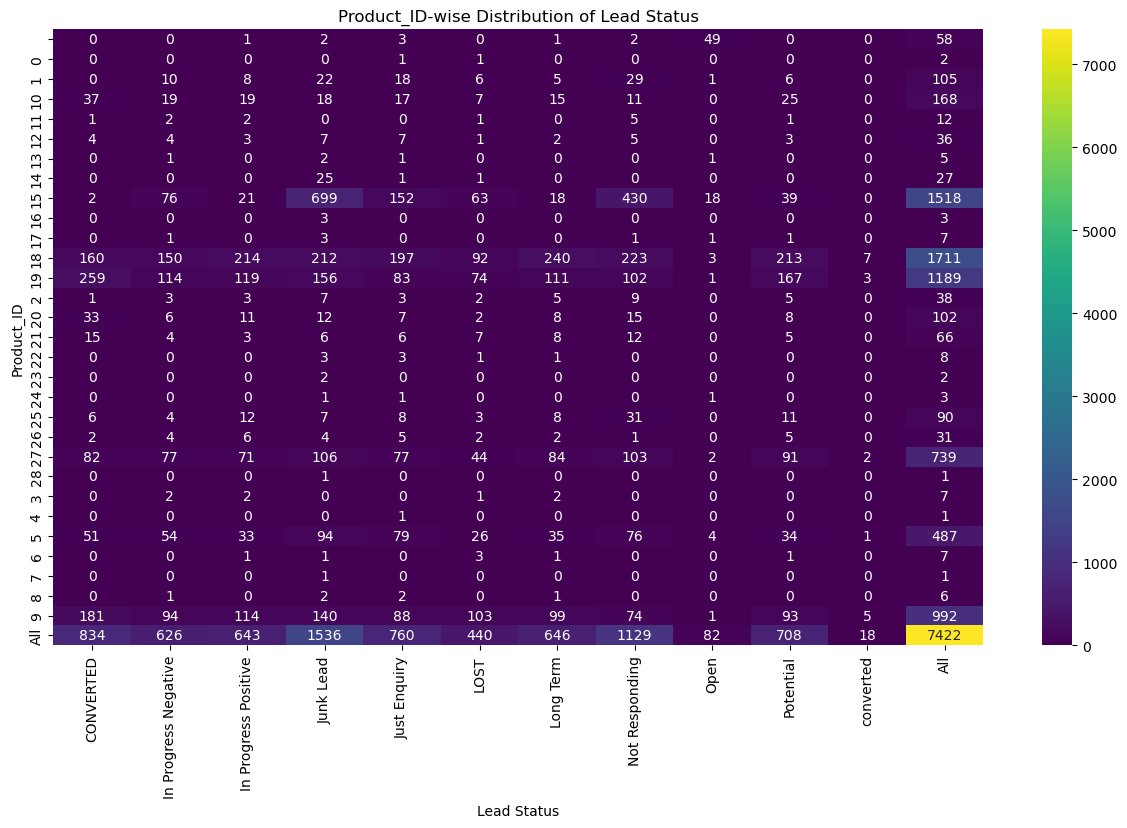

In [41]:
# Generate cross-tabulation
cross_tab = pd.crosstab(data.Product_ID, data.Status, margins='all')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)

# Set plot attributes
plt.title('Product_ID-wise Distribution of Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Product_ID')
plt.show()

## 16.1.3. Distribution of Lead Status Across Different Product_ID

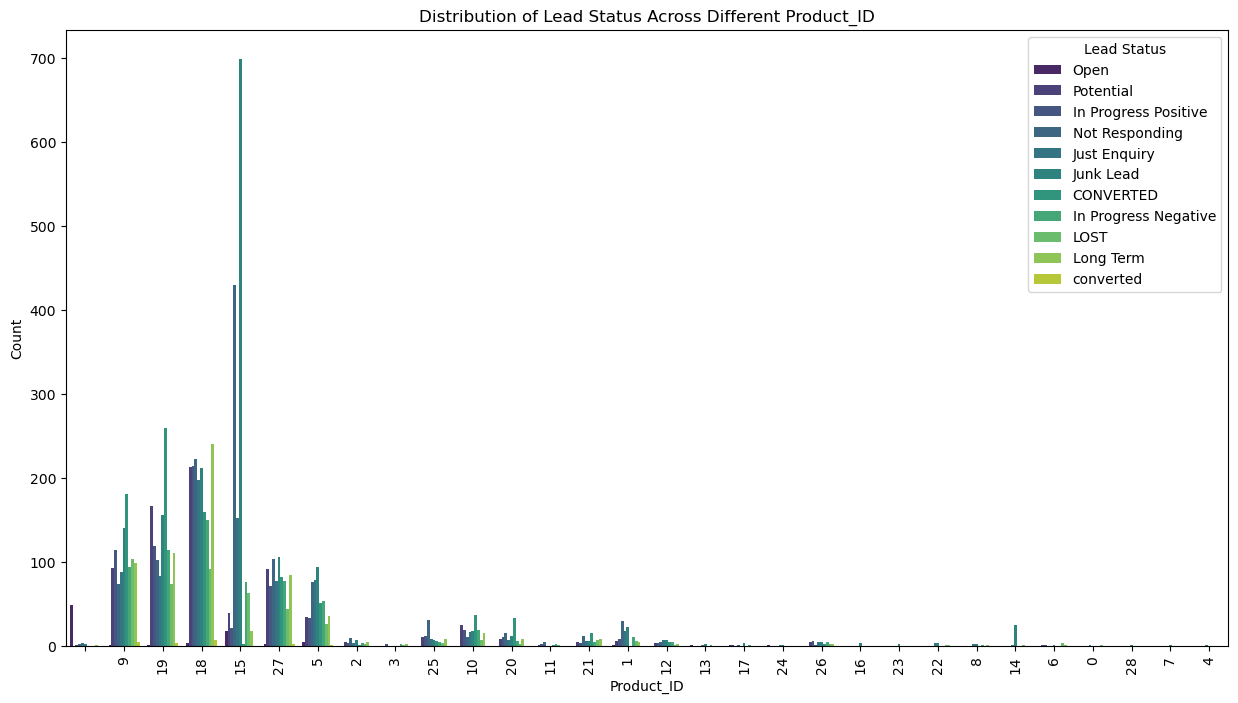

In [42]:
# Create a count plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Product_ID', hue='Status', data=data, palette='viridis')

# Set plot attributes
plt.title('Distribution of Lead Status Across Different Product_ID')
plt.xlabel('Product_ID')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Lead Status', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### **Analysis of Lead Status Across Different Product IDs:**

The Product IDs table provides a detail of lead statuses categorized by different product IDs. Each cell represents the count of leads corresponding to a specific combination of product ID and status.

1. **Product ID Impact on Conversions:**
   - Product IDs 9, 18, 15, 19, and 0 seem to have a relatively higher number of leads marked as "CONVERTED," indicating potential high-performing products.

2. **Identifying Potential Issues:**
   - Product IDs 15, 9, and 18 have a substantial number of leads marked as "In Progress Negative" and "Junk Lead." This suggests potential issues in the sales or lead qualification processes for these products.

3. **Lost Opportunities:**
   - Product IDs 15, 9, 18, and 19 have a significant count of "LOST" leads, indicating lost sales opportunities. Exploring the reasons behind lost leads for these products is crucial.

4. **Lead Nurturing Opportunities:**
   - Product IDs 15, 18, 9, and 19 have leads marked as "Potential," suggesting opportunities for lead nurturing and further engagement to increase the chances of conversion.

5. **Diverse Product Portfolio:**
   - The analysis covers a diverse range of product IDs, each contributing to the overall lead status distribution. This diversity indicates a broad product portfolio.

**Business Improvement Suggestions:**

1. **Performance Analysis for High-Volume Products:**
   - Conduct a detailed analysis of lead performance for high-volume products (e.g., Product IDs 9, 18, 15, 19) to understand factors contributing to success and challenges.

2. **Optimizing Sales Strategies:**
   - For Product IDs with a high count of "In Progress Negative" and "Junk Lead," implement strategies to optimize sales approaches, improve lead qualification, and reduce negative outcomes.

3. **Lost Opportunity Investigation:**
   - Investigate the reasons behind lost leads for products with a high count of "LOST" status. This could involve customer feedback analysis, competitor benchmarking, or internal process reviews.

4. **Lead Nurturing Campaigns:**
   - Develop targeted lead nurturing campaigns for products with a significant count of "Potential" leads. Implement personalized communication and engagement strategies to move potential leads towards conversion.

5. **Continuous Monitoring and Feedback Loop:**
   - Establish a continuous monitoring system to track the performance of different product IDs over time. Implement a feedback loop involving the sales team to gather insights and refine strategies based on real-time data.

6. **Customer Segmentation:**
   - Explore the possibility of segmenting leads based on product preferences and behavior. Tailor marketing and sales strategies to specific customer segments, ensuring a more personalized and effective approach.

**This analysis provides valuable insights into the distribution of lead statuses across different product IDs, guiding strategic decisions for sales optimization, lead nurturing, and overall business improvement.**

# 16.2.1.Cross-tabulation Analysis: Source-wise Distribution of Lead Status

In [43]:
pd.crosstab(data.Source,data.Status,margins='all')

Status                         CONVERTED  In Progress Negative  \
Source                                                           
                                       0                     1   
By Recommendation                     18                     0   
CRM form                               3                     5   
Call                                 240                   200   
Campaign                               4                     0   
Customer Referral                    118                     4   
E-Mail Message                         0                     0   
E-mail Campaign                        4                     2   
Existing Client                       35                     0   
Existing Customer                     13                     1   
Just Dial                              1                     9   
Live Chat -PPC                        11                    22   
Live Chat-Adwords Remarketing          0                     0   
Live Chat-Blog                        11                    27   
Live Chat-CPC                          1                     8   
Live Chat-Direct                     175                   162   
Live Chat-Google Ads                   3                     2   
Live Chat-Google Organic              36                    22   
Live Chat-Justdial                     0                     0   
Live Chat-Quora                        0                     0   
Live Chat-Youtube                      0                     0   
Other                                  0                     0   
Personal Contact                      17                     2   
SMS Campaign                           1                     0   
US Website                             0                     9   
Website                              143                   150   
All                                  834                   626   

Status                         In Progress Positive  Junk Lead  Just Enquiry  \
Source                                                                         
                                                  0          1             1   
By Recommendation                                 1          0             0   
CRM form                                          0          3             2   
Call                                            213        730           217   
Campaign                                          0          4             0   
Customer Referral                                15          4             4   
E-Mail Message                                    0          0             0   
E-mail Campaign                                   0          0             0   
Existing Client                                   2          2             1   
Existing Customer                                 2          0             0   
Just Dial                                         1         15             2   
Live Chat -PPC                                   22         39            35   
Live Chat-Adwords Remarketing                     1          0             0   
Live Chat-Blog                                   17         40            26   
Live Chat-CPC                                     5         13             7   
Live Chat-Direct                                192        309           217   
Live Chat-Google Ads                              1          5             2   
Live Chat-Google Organic                         18         40            27   
Live Chat-Justdial                                0          1             0   
Live Chat-Quora                                   0          0             0   
Live Chat-Youtube                                 0          0             2   
Other                                             0          0             0   
Personal Contact                                  7          6             1   
SMS Campaign                                      0          0             1   
US We

## 16.2.2. Source-wise Distribution of Lead Status

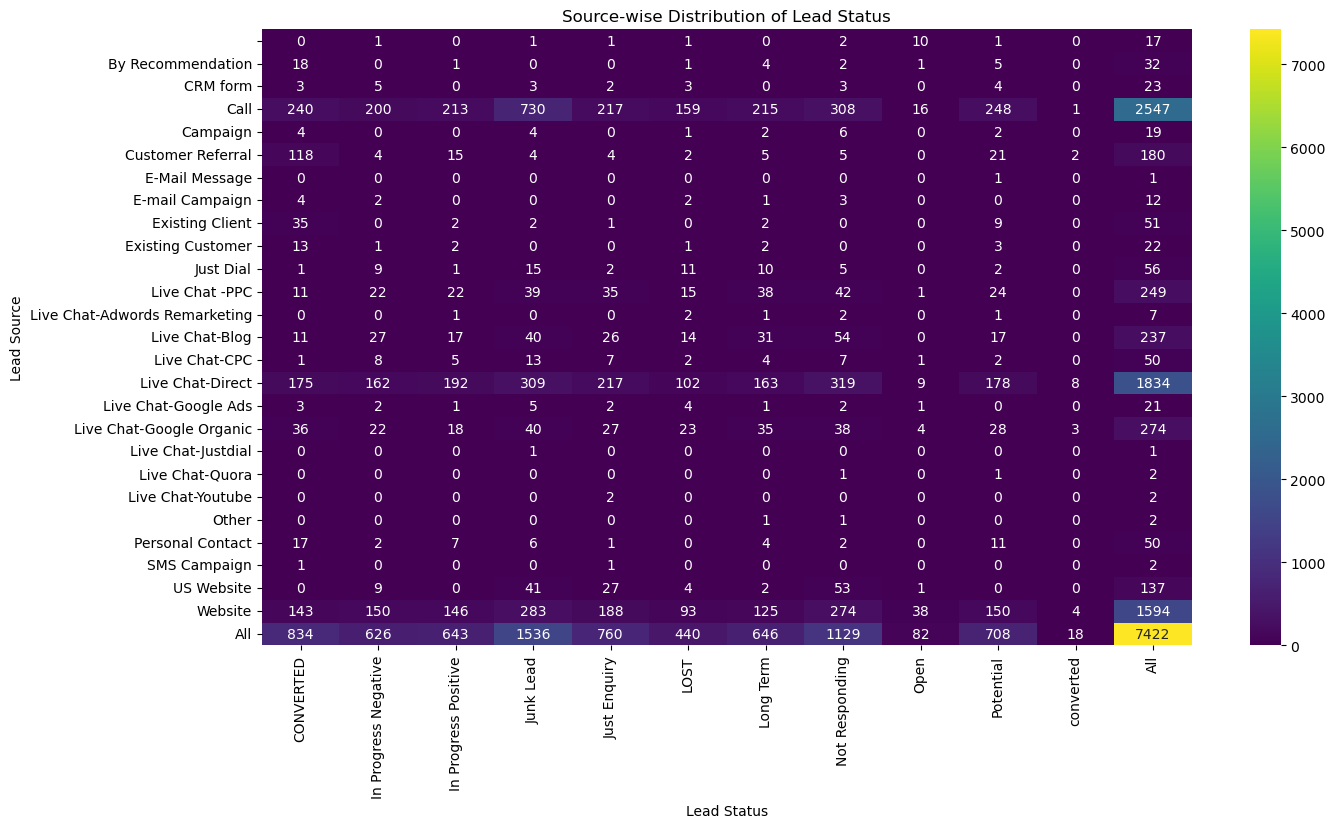

In [44]:
# Generate cross-tabulation
cross_tab = pd.crosstab(data.Source, data.Status, margins='all')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)

# Set plot attributes
plt.title('Source-wise Distribution of Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Lead Source')
plt.show()

## 16.2.3. Distribution of Lead Status Across Different Sources

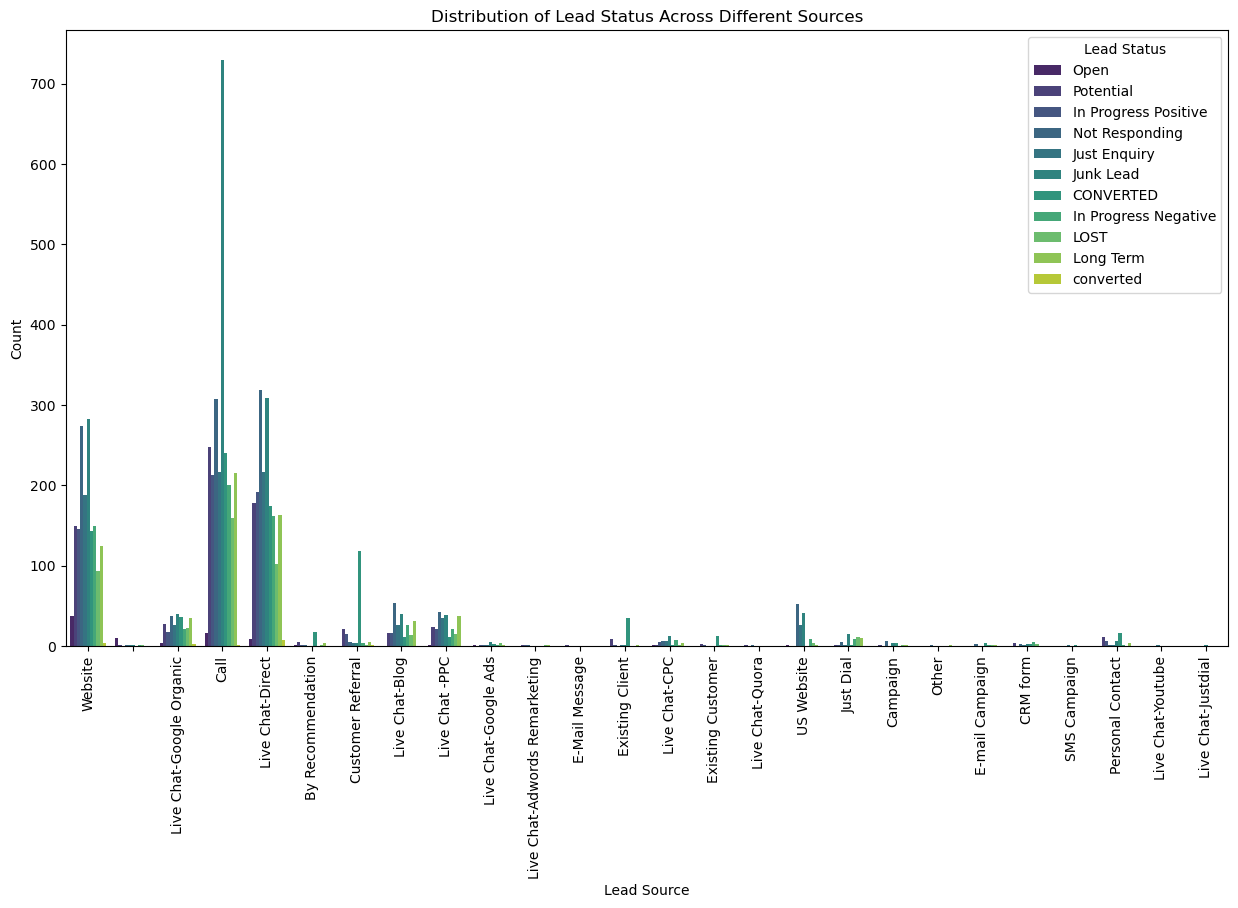

In [45]:
# Create a count plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Source', hue='Status', data=data, palette='viridis')

# Set plot attributes
plt.title('Distribution of Lead Status Across Different Sources')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Lead Status', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### **Analysis of Status Distribution Across Different Sources:**

Each cell represents the count of leads corresponding to a specific combination of status and source.

1. **Source Influence on Lead Conversion:**
   - "Call" appears to be a prominent source, contributing significantly to the "CONVERTED" status with 240 leads successfully converted.
   - "Customer Referral" also demonstrates a positive influence on conversions with 118 leads converted.

2. **Junk Leads and Lost Opportunities:**
   - "Call" and "Live Chat-Direct" show higher counts for "Junk Lead," indicating potential areas for refining lead generation strategies in these sources.
   - "Call" has a substantial number of "LOST" leads (159), suggesting areas for improvement in the sales process or follow-up strategies.

3. **In Progress Leads:**
   - "Call," "Live Chat-Direct," and "Website" have a significant number of leads marked as "In Progress Positive" and "In Progress Negative," indicating active engagement and ongoing sales efforts.

4. **Lead Potential in Other Sources:**
   - "By Recommendation," "CRM form," and "Live Chat -PPC" have a moderate number of leads marked as "Potential," suggesting opportunities for further nurturing.

5. **Diverse Lead Sources:**
   - The analysis covers a diverse range of lead sources, from direct calls to website interactions, indicating a multi-channel approach to lead generation.

6. **Data Quality Check:**
   - The table allows for a quick data quality check, ensuring that status and source labels are correctly labeled without unexpected or irregular values.

7. **Strategic Decision-making:**
   - The information aids in strategic decision-making, helping to identify high-performing sources, optimize lead nurturing strategies, and address challenges in specific channels.

8. **Overall Performance Metrics:**
   - The "All" row provides a consolidated view of the total counts for each status category, allowing for a quick overview of overall performance across all sources.

**This analysis offers valuable insights into the distribution of lead statuses across different sources, guiding strategic decisions for lead management, sales, and marketing optimization.**

# 16.3.1. Cross-tabulation Analysis: Sales_Agent Distribution of Lead Status

In [46]:
pd.crosstab(data.Sales_Agent,data.Status,margins='all')

Status          CONVERTED  In Progress Negative  In Progress Positive  \
Sales_Agent                                                             
                        0                     0                     0   
Sales-Agent-1           0                     0                     0   
Sales-Agent-10          0                     0                     0   
Sales-Agent-11        118                   119                     8   
Sales-Agent-12         82                    51                     0   
Sales-Agent-2          61                    59                     0   
Sales-Agent-3         122                    81                    36   
Sales-Agent-4         131                    91                   198   
Sales-Agent-5          77                   107                     3   
Sales-Agent-6          37                    25                     0   
Sales-Agent-7          88                    64                   130   
Sales-Agent-8           2                     1                     4   
Sales-Agent-9         116                    28                   264   
All                   834                   626                   643   

Status          Junk Lead  Just Enquiry  LOST  Long Term  Not Responding  \
Sales_Agent                                                                
                        0             4     0          0               3   
Sales-Agent-1           0             0     0          0               0   
Sales-Agent-10          5             0     0          0               0   
Sales-Agent-11        299           219    40        120             246   
Sales-Agent-12         79             0    57          0               0   
Sales-Agent-2          94             1    45        111              17   
Sales-Agent-3         195            69    47         80             109   
Sales-Agent-4         303           193    73         73             293   
Sales-Agent-5         318           158   106         92             189   
Sales-Agent-6          17             0    11         23               1   
Sales-Agent-7         142            52    47         76             112   
Sales-Agent-8          11             9     0          2               8   
Sales-Agent-9          73            55    14         69             151   
All                  1536           760   440        646            1129   

Status          Open  Potential  converted   All  
Sales_Agent                                       
                  14          2          0    23  
Sales-Agent-1      4          0          0     4  
Sales-Agent-10    44          0          0    49  
Sales-Agent-11     1        249          1  1420  
Sales-Agent-12     0          0          0   269  
Sales-Agent-2      0          1          0   389  
Sales-Agent-3      1         40          1   781  
Sales-Agent-4      0        145          0  1500  
Sales-Agent-5      1        138          1  1190  
Sales-Agent-6      0          0          0   114  
Sales-Agent-7      0         24          1   736  
Sales-Agent-8     17          1         13    68  
Sales-Agent-9      0        108          1   879  
All               82        708         18  7422

# 16.3.2. Sales_Agent-wise Distribution of Lead Status

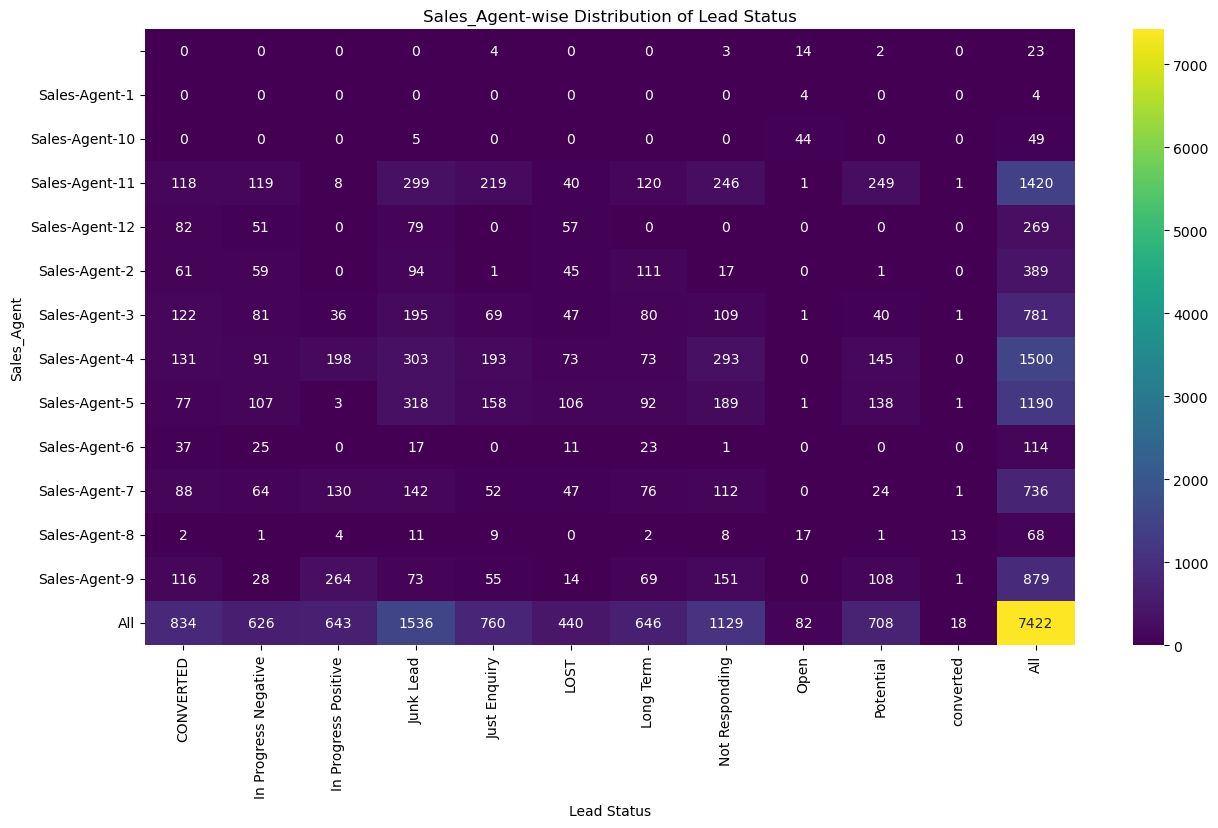

In [47]:
# Generate cross-tabulation
cross_tab = pd.crosstab(data.Sales_Agent, data.Status, margins='all')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)

# Set plot attributes
plt.title('Sales_Agent-wise Distribution of Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Sales_Agent')
plt.show()

# 16.3.3. Distribution of Lead Status Across Different Sales_Agent

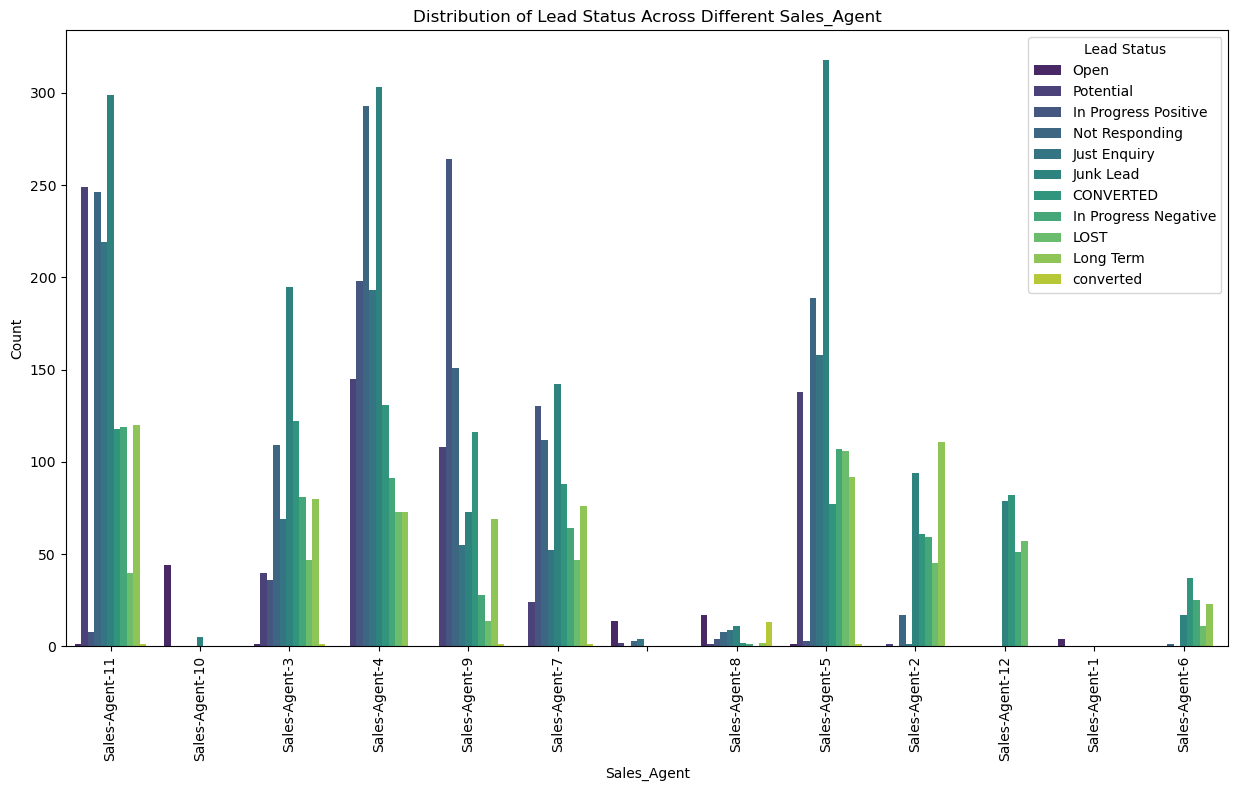

In [48]:
# Create a count plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Sales_Agent', hue='Status', data=data, palette='viridis')

# Set plot attributes
plt.title('Distribution of Lead Status Across Different Sales_Agent')
plt.xlabel('Sales_Agent')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Lead Status', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### **Analysis of Lead Status Across Different Sales Agents:**

The Sales Agents table provides a detailed of lead statuses categorized by different sales agents. Each cell represents the count of leads corresponding to a specific combination of sales agent and status. 

1. **Sales-Agent Performance:**
   - Sales-Agent-11 appears to have a high number of "CONVERTED" leads, indicating effective sales efforts and successful conversions.
   - Sales-Agent-4 also shows a substantial number of "CONVERTED" leads, suggesting strong sales performance.

2. **Challenges and Areas for Improvement:**
   - Sales-Agent-3 and Sales-Agent-5 face challenges with a significant count of "In Progress Negative" and "Junk Lead" statuses, indicating potential issues in lead qualification or communication strategies.

3. **Lost Opportunities:**
   - Multiple sales agents, including Sales-Agent-11 and Sales-Agent-4, have a considerable count of "LOST" leads. Investigate the reasons behind lost leads to identify areas for improvement.

4. **Lead Nurturing Opportunities:**
   - Sales-Agent-11 and Sales-Agent-5 have a notable count of "Potential" leads, suggesting opportunities for lead nurturing and follow-up strategies to increase conversion chances.

5. **Diverse Sales Agent Contributions:**
   - The analysis covers a diverse range of sales agents, each contributing to the overall lead status distribution. This diversity indicates varied sales approaches and effectiveness.

**Business Improvement Suggestions:**

1. **Performance Recognition and Training:**
   - Acknowledge and recognize the strong performance of Sales-Agent-11 in converting leads. Consider sharing best practices and strategies with other agents.
   - Provide additional training or support to sales agents facing challenges in lead qualification and dealing with negative outcomes.

2. **Lost Opportunity Investigation:**
   - Conduct a thorough investigation into the reasons behind lost leads, particularly for Sales-Agent-11 and Sales-Agent-4. This could involve analyzing customer feedback, competitor benchmarking, or internal process reviews.

3. **Lead Nurturing Strategies:**
   - Develop targeted lead nurturing strategies for Sales-Agent-11 and Sales-Agent-5 to capitalize on the potential leads and move them closer to conversion.

4. **Communication and Follow-Up Enhancement:**
   - Implement strategies to enhance communication and follow-up processes for Sales-Agent-3 and Sales-Agent-5, aiming to reduce "In Progress Negative" and "Junk Lead" statuses.

5. **Performance Metrics Monitoring:**
   - Establish a system for continuous monitoring of sales agent performance metrics. This includes regular reviews, feedback sessions, and adjustments to strategies based on real-time data.

6. **Collaborative Learning:**
   - Encourage collaborative learning among sales agents by facilitating knowledge-sharing sessions. This can foster a culture of continuous improvement and shared success strategies.

**This analysis provides insights into the distribution of lead statuses across different sales agents, guiding strategic decisions for recognizing success, addressing challenges, and optimizing overall sales effectiveness.**

# 16.4.1. Cross-tabulation Analysis: Location Distribution of Lead Status

In [49]:
pd.crosstab(data.Location,data.Status,margins='all')

Status           CONVERTED  In Progress Negative  In Progress Positive  \
Location                                                                 
                         0                     0                     0   
AUSTRALIA                5                     0                     3   
Bangalore              464                   159                   252   
Chennai                108                    85                   105   
Delhi                   40                    75                    33   
EUROPE                   0                     0                     1   
Howrah                   0                     0                     0   
Hyderabad               54                    62                    51   
Kolkata                  2                    10                     3   
Malaysia                 3                     0                     1   
Mumbai                  23                    56                    45   
Other Locations         81                   152                   123   
Pune                    10                    18                     7   
Singapore                3                     1                     0   
Trivandrum               6                     4                     5   
UAE                     17                     0                     7   
UK                      12                     2                     3   
USA                      6                     2                     4   
All                    834                   626                   643   

Status           Junk Lead  Just Enquiry  LOST  Long Term  Not Responding  \
Location                                                                    
                         1             3     0          1               4   
AUSTRALIA                3             6     1          0               5   
Bangalore              282            95   127        311             150   
Chennai                115            91    57         91             100   
Delhi                   78            64    36         46              53   
EUROPE                   0             0     0          0               0   
Howrah                   1             0     0          0               0   
Hyderabad               76            69    45         49              70   
Kolkata                 15             9     2          3               6   
Malaysia                 0             0     0          0               0   
Mumbai                  69            56    38         28              41   
Other Locations        846           309   123         91             617   
Pune                    25            19     7         15              28   
Singapore                2             3     0          2               2   
Trivandrum               8             9     2          4              13   
UAE                      6            15     1          2              18   
UK                       4             7     1          1               7   
USA                      5             5     0          2              15   
All                   1536           760   440        646            1129   

Status           Open  Potential  converted   All  
Location                                           
                   49          0          0    58  
AUSTRALIA           0          2          0    25  
Bangalore           2        236          6  2084  
Chennai             1        150          6   909  
Delhi               0         46          0   471  
EUROPE              0          2          0     3  
Howrah              0          0          0     1  
Hyderabad           0         51          1   528  
Kolkata             0          5          0    55  
Malaysia            0          0          0     4  
Mumbai              2         42          2   402  
Other Locations    24        132          2  2500  
Pune                2         11          0   142  
Singapore           0          4          0    

# 16.4.2. Location-wise Distribution of Lead Status

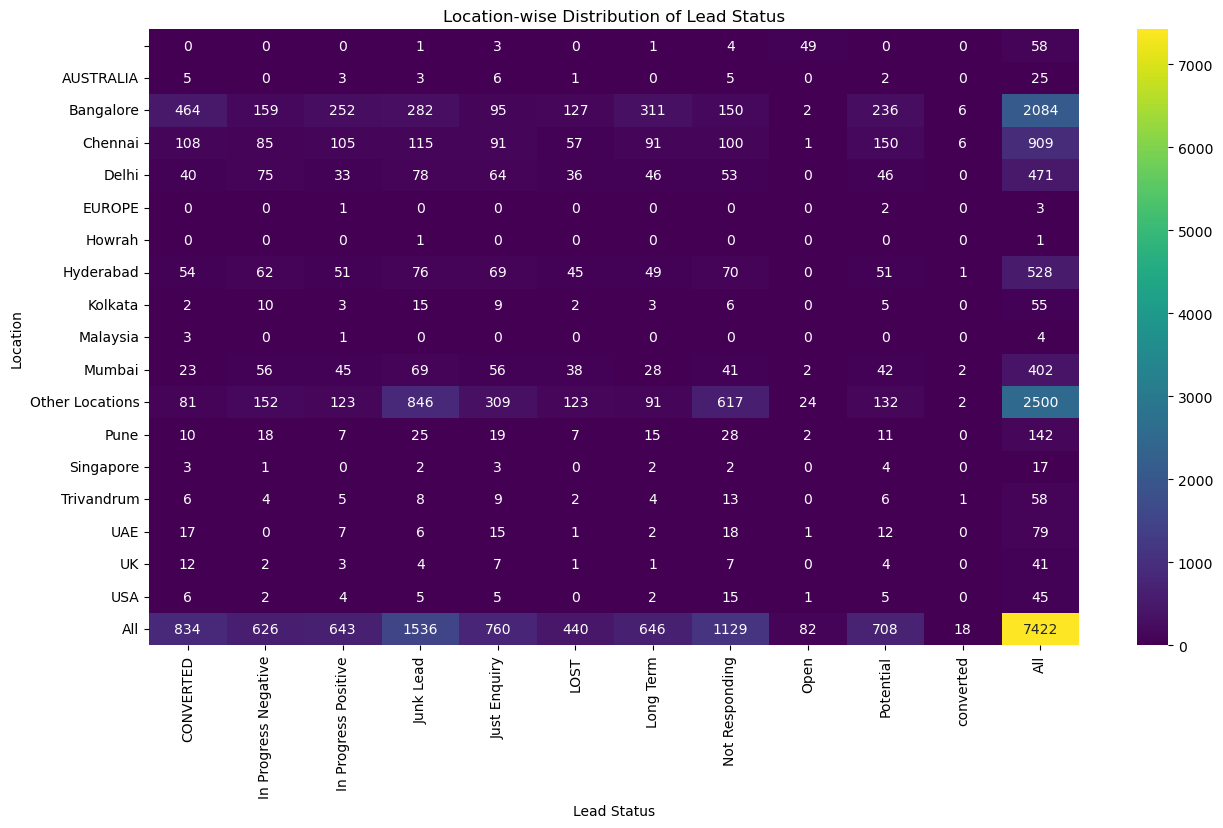

In [50]:
# Generate cross-tabulation
cross_tab = pd.crosstab(data.Location, data.Status, margins='all')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)

# Set plot attributes
plt.title('Location-wise Distribution of Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Location')
plt.show()

# 16.4.3. Distribution of Lead Status Across Different Location

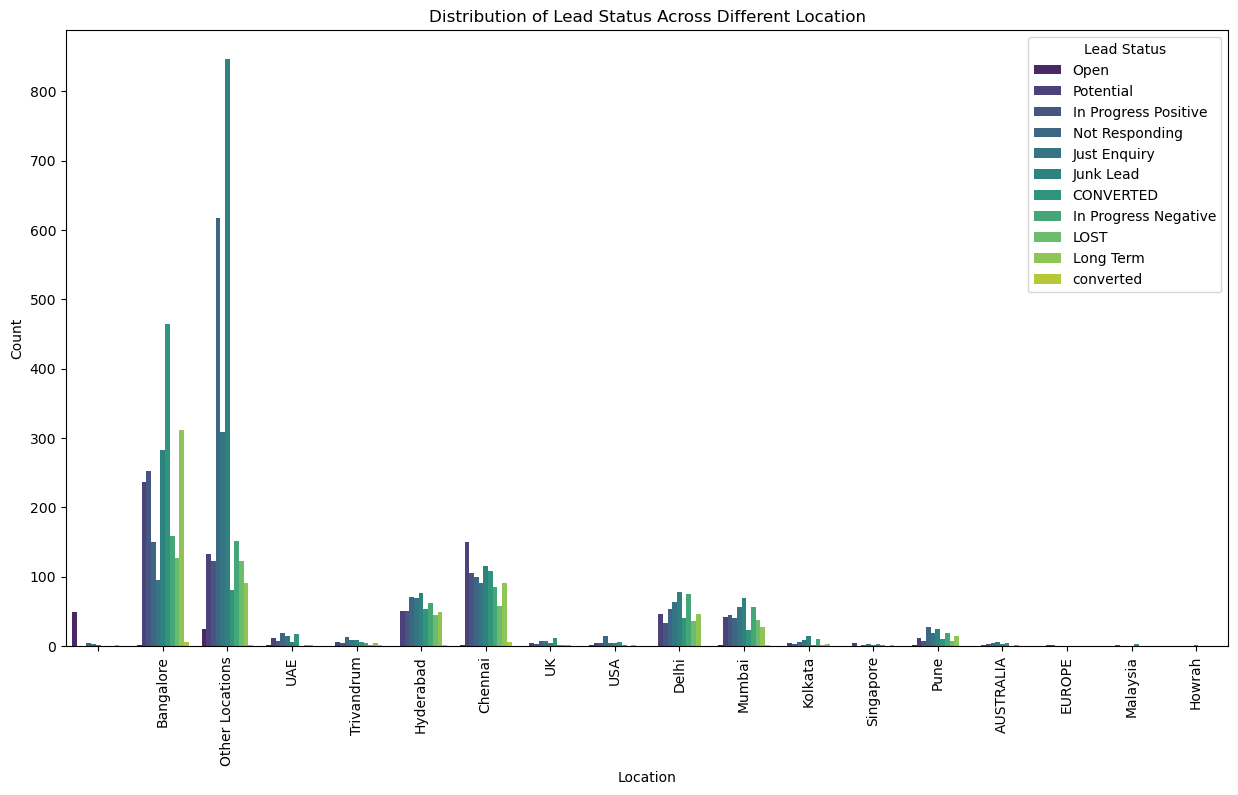

In [51]:
# Create a count plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Location', hue='Status', data=data, palette='viridis')

# Set plot attributes
plt.title('Distribution of Lead Status Across Different Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Lead Status', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### **Analysis of Lead Status Across Different Locations:**

The Locations table provides a detail of lead statuses categorized by different locations. Each cell represents the count of leads corresponding to a specific combination of location and status. 

1. **Location Impact on Conversions:**
   - Bangalore has the highest number of "CONVERTED" leads, indicating successful conversions and effective sales efforts in this region.
   - Other Locations, Mumbai, and Chennai also show notable numbers of "CONVERTED" leads.

2. **Challenges in Specific Locations:**
   - Other Locations has a significant count of "Junk Lead" and "LOST" statuses, suggesting challenges in lead quality or sales effectiveness in this category.
   - Delhi, Hyderabad, and Pune also show challenges with "Junk Lead" and "LOST" statuses.

3. **Opportunities for Improvement:**
   - Australia, Singapore, and UK have relatively lower counts of "CONVERTED" leads. Exploring strategies to increase conversions in these regions could be beneficial.

4. **Diverse Performance Across Locations:**
   - The analysis covers a diverse range of locations, each contributing to the overall lead status distribution. This diversity indicates varied market conditions and potential for targeted strategies.

**Business Improvement Suggestions:**

1. **Performance Recognition and Training:**
   - Recognize the success in Bangalore and consider sharing best practices with other locations. Foster a culture of learning and collaboration among different regional teams.

2. **Addressing Challenges in Other Locations:**
   - Investigate and address challenges in Other Locations, including the high count of "Junk Lead" and "LOST" statuses. Implement targeted strategies to improve lead quality and sales effectiveness.

3. **Localized Marketing Strategies:**
   - Tailor marketing strategies to specific locations based on the performance analysis. This includes targeted campaigns, promotions, and engagement strategies to address local market dynamics.

4. **Lead Quality Enhancement:**
   - Implement measures to enhance lead quality in regions facing challenges. This could involve refining lead qualification criteria, improving communication strategies, and optimizing the sales process.

5. **Opportunity Exploration in Australia, Singapore, and UK:**
   - Explore opportunities to increase conversions in regions with lower counts of "CONVERTED" leads, such as Australia, Singapore, and the UK. Implement targeted marketing and sales initiatives to tap into these markets.

6. **Continuous Monitoring and Adjustment:**
   - Establish a system for continuous monitoring of lead status metrics across different locations. Regularly review and adjust strategies based on the evolving market conditions.

7. **Customer Feedback Analysis:**
   - Gather and analyze customer feedback from different locations to understand the reasons behind specific lead statuses. Use insights to tailor strategies for improved customer satisfaction and conversions.

**This analysis provides insights into the distribution of lead statuses across different locations, guiding strategic decisions for recognizing success, addressing challenges, and optimizing overall business performance in diverse regional contexts.**

# 16.5.1. Cross-tabulation Analysis: Delivery_Mode Distribution of Lead Status

In [52]:
pd.crosstab(data.Delivery_Mode,data.Status,margins='all')

Status         CONVERTED  In Progress Negative  In Progress Positive  \
Delivery_Mode                                                          
Mode-1               429                   274                   299   
Mode-2                 3                     1                     2   
Mode-3               165                   134                   182   
Mode-4                53                     8                    12   
Mode-5               184                   209                   148   
All                  834                   626                   643   

Status         Junk Lead  Just Enquiry  LOST  Long Term  Not Responding  Open  \
Delivery_Mode                                                                   
Mode-1               366           154   201        333             295     6   
Mode-2                 0             2     1          0               0     1   
Mode-3               257           252    91        139             251     5   
Mode-4                16             3     7          8               5     1   
Mode-5               897           349   140        166             578    69   
All                 1536           760   440        646            1129    82   

Status         Potential  converted   All  
Delivery_Mode                              
Mode-1               263          7  2627  
Mode-2                 1          0    11  
Mode-3               206          6  1688  
Mode-4                 8          0   121  
Mode-5               230          5  2975  
All                  708         18  7422

# 16.5.2. Delivery_Mode-wise Distribution of Lead Status

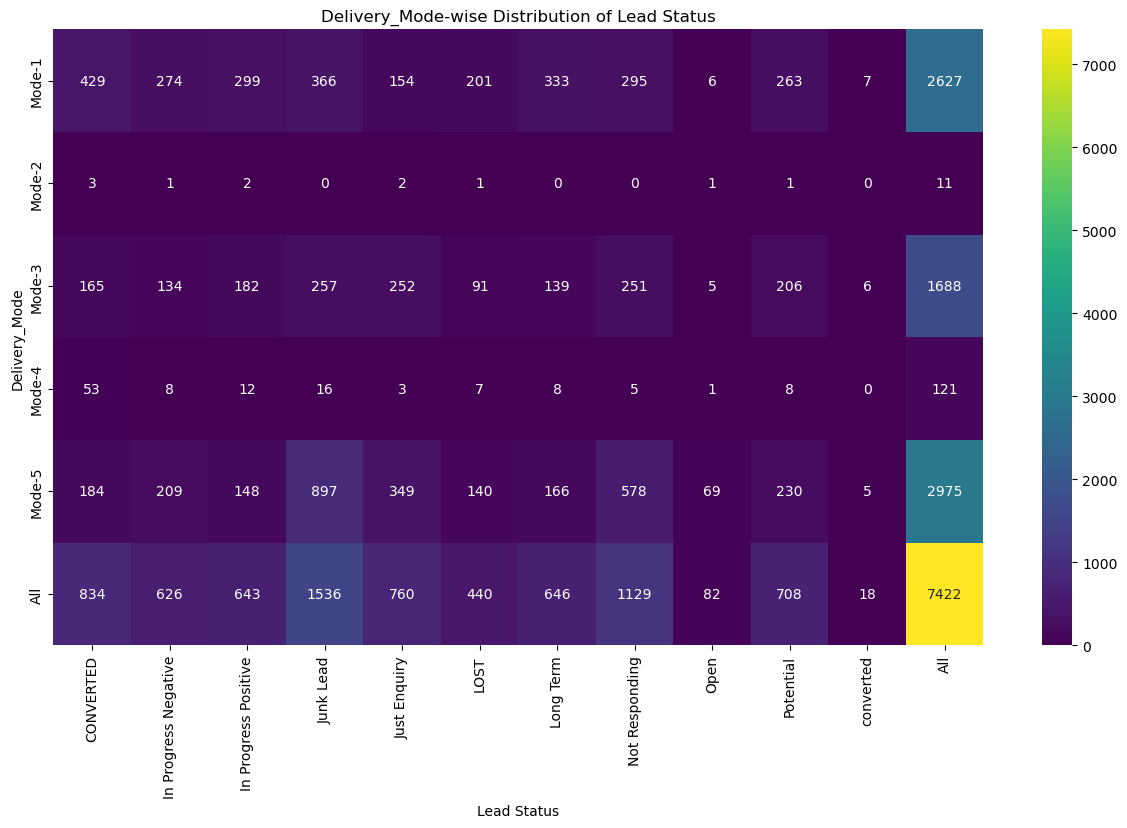

In [53]:
# Generate cross-tabulation
cross_tab = pd.crosstab(data.Delivery_Mode, data.Status, margins='all')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)

# Set plot attributes
plt.title('Delivery_Mode-wise Distribution of Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Delivery_Mode')
plt.show()


# 16.5.3. Distribution of Lead Status Across Different Delivery_Mode

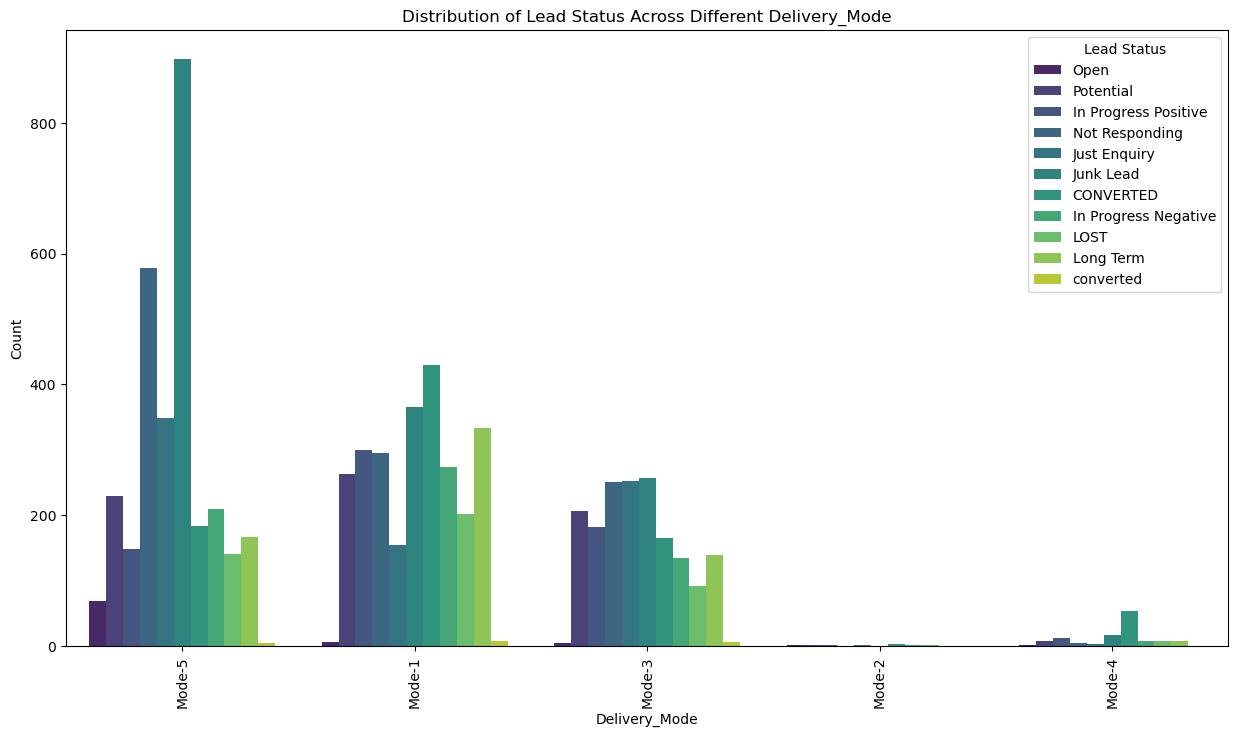

In [54]:
# Create a count plot
plt.figure(figsize=(15, 8))
sns.countplot(x='Delivery_Mode', hue='Status', data=data, palette='viridis')

# Set plot attributes
plt.title('Distribution of Lead Status Across Different Delivery_Mode')
plt.xlabel('Delivery_Mode')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Lead Status', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### **Analysis of Lead Status Across Different Delivery Modes:**

The Delivery Modes table provides a detail of lead statuses categorized by different delivery modes. Each cell represents the count of leads corresponding to a specific combination of delivery mode and status. 

1. **Effectiveness of Different Delivery Modes:**
   - Mode-5 has the highest count of leads across all statuses, indicating a dominant and widely used delivery mode.
   - Mode-1 also shows substantial counts across various statuses, suggesting its effectiveness in lead handling.

2. **Challenges in Specific Delivery Modes:**
   - Mode-4 has a relatively higher count of "Junk Lead" statuses, indicating potential challenges or issues in lead quality or handling through this mode.

3. **Opportunities for Improvement:**
   - Mode-2 has a relatively lower count across all statuses. Exploring strategies to optimize this delivery mode's effectiveness could lead to increased conversions and better lead outcomes.

4. **Diverse Performance Across Modes:**
   - The analysis covers a diverse range of delivery modes, each contributing to the overall lead status distribution. This diversity indicates varied approaches to lead handling and potential for targeted strategies.

**Business Improvement Suggestions:**

1. **Optimizing High-Volume Modes:**
   - For high-volume delivery modes like Mode-5 and Mode-1, continue monitoring and optimizing strategies to ensure sustained effectiveness. Regularly review lead handling processes to maintain high conversion rates.

2. **Enhancing Mode-2 Performance:**
   - Investigate the reasons behind the lower count of leads in Mode-2. Consider implementing improvements in communication, lead qualification, or other aspects to enhance its performance.

3. **Addressing Challenges in Mode-4:**
   - Given the higher count of "Junk Lead" statuses in Mode-4, conduct a detailed analysis of lead quality and handling processes. Implement measures to address challenges and improve the overall quality of leads delivered through this mode.

4. **Customizing Strategies for Each Mode:**
   - Recognize the diverse performance of different delivery modes and tailor strategies to each mode's strengths and challenges. A one-size-fits-all approach may not be optimal for varied modes.

5. **Customer Feedback and Satisfaction:**
   - Gather customer feedback specific to different delivery modes. Use this feedback to understand customer preferences, pain points, and areas for improvement in each mode.

6. **Continuous Monitoring and Adjustment:**
   - Establish a system for continuous monitoring of lead status metrics across different delivery modes. Regularly review and adjust strategies based on the evolving performance of each mode.

7. **Collaboration with Stakeholders:**
   - Collaborate with stakeholders involved in each delivery mode, such as sales teams, marketing, and customer service, to ensure alignment in strategies and seamless lead transitions.

**This analysis provides insights into the distribution of lead statuses across different delivery modes, guiding strategic decisions for recognizing success, addressing challenges, and optimizing overall lead handling effectiveness.**

# 17. Creating a deep copy of dataset 

In [55]:
df=data.copy(deep=True)

In [56]:
df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

**The dataset seems to be complete, with no missing values, providing a solid foundation for further analysis and the development of machine learning models.**


# 18. Encoding the categorical features

In [57]:
# Defining 'Status' as High Potential or Low Potential
df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High_Potential',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low_Potential',inplace=True)

In [58]:
df.Status.value_counts()

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

Low_Potential     4491
High_Potential    2931
Name: Status, dtype: int64

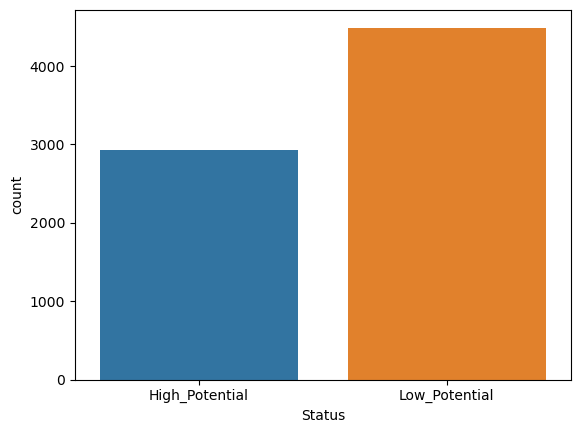

In [59]:
sns.countplot(x = "Status", data = df)
df.loc[:, 'Status'].value_counts()

### **observations:**

1. **Distribution of Lead Status:**
   - The count plot illustrates two categories of lead status: "Low_Potential" and "High_Potential."
   - The majority of leads fall into the "Low_Potential" category, with a count of 4491.
   - The "High_Potential" category has a lower count of 2931.

2. **Class Imbalance:**
   - There is a class imbalance in the dataset, with a higher number of leads categorized as "Low_Potential" compared to "High_Potential."
   - This class imbalance is important to consider during the modeling phase, as it might impact the performance of machine learning algorithms. Techniques such as oversampling or undersampling can be employed to address this imbalance.



# 18.1. Label Encoding for Categorical Data in DataFrame

>- LabelEncoder from scikit-learn to transform categorical data (textual labels) in a DataFrame (df) into numerical labels.

>- The fit_transform method is used to fit the encoder on the data and simultaneously transform the categorical values into numerical labels.

>- This transformation is particularly useful when working with machine learning algorithms that require numerical input, as many algorithms operate on numerical data.

In [60]:
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)

In [61]:
df.head()

Product_ID  Source  Sales_Agent  Location  Delivery_Mode  Status
0           0      25            3         0              4       0
1           0      25            2         0              4       0
2           0      25            2         0              4       0
3           0      25            2         0              4       0
4           0      25            2         0              4       0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int32
 1   Source         7422 non-null   int32
 2   Sales_Agent    7422 non-null   int32
 3   Location       7422 non-null   int32
 4   Delivery_Mode  7422 non-null   int32
 5   Status         7422 non-null   int32
dtypes: int32(6)
memory usage: 174.1 KB


**Observations:**
>- All columns are numeric, with either integer (int64) or integer converted to int32 data types.

>- There are no missing values (null entries) in any of the columns. The dataset is complete.

# 19. Correlation Matrix Analysis between Features and Target Variable

## 19.1. Correlation Matrix Using Spearman's Rank Correlation

**The correlation matrix using Spearman's Rank Correlation provides a measure of the monotonic relationship between pairs of variables in the DataFrame. Spearman's correlation is particularly useful when dealing with non-linear relationships or when the data does not meet the assumptions of normality required for Pearson correlation.**


In [63]:
df.corr(method='spearman')

Product_ID    Source  Sales_Agent  Location  Delivery_Mode  \
Product_ID       1.000000  0.070418     0.101340 -0.264430      -0.266474   
Source           0.070418  1.000000    -0.018389  0.025616      -0.160782   
Sales_Agent      0.101340 -0.018389     1.000000 -0.093512      -0.211050   
Location        -0.264430  0.025616    -0.093512  1.000000       0.394241   
Delivery_Mode   -0.266474 -0.160782    -0.211050  0.394241       1.000000   
Status          -0.195336  0.015261    -0.094455  0.329042       0.210613   

                 Status  
Product_ID    -0.195336  
Source         0.015261  
Sales_Agent   -0.094455  
Location       0.329042  
Delivery_Mode  0.210613  
Status         1.000000

## 19.2. Heatmap depicting intervariable dependency using Spearman\'s Rank Correlation

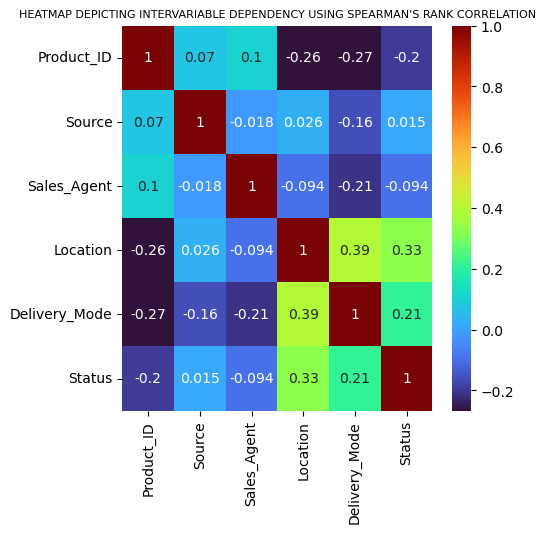

In [64]:
# Assuming you have a DataFrame named 'df'

# Setting plot size
plt.figure(figsize=(5, 5))

# Plotting Heatmap
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='turbo')

# Setting title
plt.title('Heatmap depicting intervariable dependency using Spearman\'s Rank Correlation'.upper(), fontsize=8, y=1)

plt.show()

### **Analysis:**
The correlation matrix reveals the relationships between different variables in the dataset based on Spearman's Rank Correlation coefficients.

1. **Product_ID vs. Other Features:**
   - **Source:** A weak positive correlation (0.0704) suggests that there's a slight tendency for 'Product_ID' and 'Source' to move together.
   - **Sales_Agent:** A weak positive correlation (0.1013) indicates a slight tendency for 'Product_ID' and 'Sales_Agent' to move together.
   - **Location:** A moderate negative correlation (-0.2644) suggests a tendency for 'Product_ID' and 'Location' to move in opposite directions.
   - **Delivery_Mode:** A moderate negative correlation (-0.2665) indicates a tendency for 'Product_ID' and 'Delivery_Mode' to move in opposite directions.
   - **Status:** A weak negative correlation (-0.1953) suggests a slight tendency for 'Product_ID' and 'Status' to move in opposite directions.

2. **Source vs. Other Features:**
   - **Sales_Agent:** A weak negative correlation (-0.0184) suggests a slight tendency for 'Source' and 'Sales_Agent' to move in opposite directions.
   - **Location:** A very weak positive correlation (0.0256) indicates a slight tendency for 'Source' and 'Location' to move together.
   - **Delivery_Mode:** A weak negative correlation (-0.1608) suggests a tendency for 'Source' and 'Delivery_Mode' to move in opposite directions.
   - **Status:** A very weak positive correlation (0.0153) suggests a slight tendency for 'Source' and 'Status' to move together.

3. **Sales_Agent vs. Other Features:**
   - **Location:** A weak negative correlation (-0.0935) suggests a slight tendency for 'Sales_Agent' and 'Location' to move in opposite directions.
   - **Delivery_Mode:** A moderate negative correlation (-0.2111) indicates a tendency for 'Sales_Agent' and 'Delivery_Mode' to move in opposite directions.
   - **Status:** A weak negative correlation (-0.0945) suggests a slight tendency for 'Sales_Agent' and 'Status' to move in opposite directions.

4. **Location vs. Other Features:**
   - **Delivery_Mode:** A strong positive correlation (0.3942) indicates a significant tendency for 'Location' and 'Delivery_Mode' to move together.
   - **Status:** A moderate positive correlation (0.3290) suggests a tendency for 'Location' and 'Status' to move together.

5. **Delivery_Mode vs. Status:**
   - A weak positive correlation (0.2106) suggests a slight tendency for 'Delivery_Mode' and 'Status' to move together.

**The correlation matrix provides insights into potential relationships between different variables. While correlation does not imply causation, these associations can guide further investigation and decision-making in the context of lead management and sales effectiveness. For example, understanding the geographical and delivery mode preferences of leads may help tailor sales strategies, improving overall sales performance.**

# 19.3. VIF Calculation Function

>- VIF is a measure of how much the variance of the estimated regression coefficients increases when your predictors are correlated.



>- variance_inflation_factor is useful in the context of data analysis and model building, allowing users to identify and address multicollinearity issues when working with algorithm (models).


In [65]:
# Importing the necessary library for VIF analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Function to calculate VIF for each variable in the DataFrame
def get_vif(df):
    vif=pd.DataFrame() # Creating an empty DataFrame to store variables and their corresponding VIF values
    vif['variables']=df.columns # Assigning the variable names to the 'variables' column in the DataFrame
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range (df.shape[1])] # Calculating VIF for each variable using a list comprehension
    
    return vif # Returning the DataFrame containing variables and VIF values


In [67]:

# Applying the get_vif function to the selected columns in the DataFrame and displaying the results
get_vif(df[[i for i in df.describe().columns]])

variables       VIF
0     Product_ID  3.635979
1         Source  2.829970
2    Sales_Agent  4.397922
3       Location  4.156157
4  Delivery_Mode  2.740367
5         Status  2.735333

### **Analysis of Variance Inflation Factor (VIF):**

The presented VIF values for different variables in the dataset provide insights into the extent of multicollinearity, i.e., the correlation between independent variables. Here's an analysis of the VIF values:

1. **Product_ID (VIF: 3.64):**
   - The VIF for Product_ID is moderate, indicating a moderate level of multicollinearity with other variables.

2. **Source (VIF: 2.83):**
   - The VIF for Source is within an acceptable range, suggesting a low level of multicollinearity with other variables.

3. **Sales_Agent (VIF: 4.40):**
   - The VIF for Sales_Agent is relatively high, indicating a notable level of multicollinearity with other variables. Further investigation may be needed to understand the implications.

4. **Location (VIF: 4.16):**
   - The VIF for Location is relatively high, suggesting a significant level of multicollinearity with other variables. This warrants careful consideration in the analysis.

5. **Delivery_Mode (VIF: 2.74):**
   - The VIF for Delivery_Mode is within an acceptable range, indicating a low level of multicollinearity with other variables.

6. **Status (VIF: 2.74):**
   - The VIF for Status is within an acceptable range, suggesting a low level of multicollinearity with other variables.

**Overall Implications:**
- The VIF values, in general, do not exceed critical thresholds (commonly set at 10), indicating that the variables in the dataset are not severely affected by multicollinearity.
- While some variables show moderate correlation with others, it may not pose a significant issue for certain analyses or modeling tasks.


# 20. Model Creation

## 20.1. Split data into x and y

In [68]:
# Here, 'x' is all the variables except target.
# Extracting features (independent variables) by dropping the "Status" column. 

X = df.drop('Status', axis=1)

y = df[['Status']]

- 'x' represents the features (independent variables) of our dataset. excluding the "Status" column.

- 'y' represents the target variable (dependent variable) , which is the "Status" column.

## 20.2. Feature Importance Analysis 

In [69]:
from sklearn.feature_selection import SelectKBest
# SelectKBest is a feature selection method that selects the top k features based on univariate statistical tests.

from sklearn.feature_selection import chi2
# chi2 is a statistical test used for measuring the dependence between categorical variables.

In [70]:
# SelectKBest with chi2 as scoring function and k=5 (select top 5 features)
bestfeatures=SelectKBest(score_func=chi2,k=5)

# Fit the SelectKBest transformer on the input features (X) and target variable (y)
fit=bestfeatures.fit(X,y)

**Explanation:**
- SelectKBest is a feature selection technique in scikit-learn that helps choose the top k features based on univariate statistical tests.

- score_func=chi2: Specifies the scoring function to be used. Chi-squared test is suitable for categorical target variables, and it measures the dependence between the categorical features and the target variable.

In [71]:
# Creating a DataFrame for feature scores
dfscores=pd.DataFrame(fit.scores_)

# Creating a DataFrame for feature names
dfcolumns=pd.DataFrame(X.columns)

In [72]:

# Concatenating feature names and scores DataFrames horizontally
featureScores=pd.concat([dfcolumns,dfscores],axis=1)

# Renaming the columns of the new DataFrame
featureScores.columns=['features ','score']

In [73]:
featureScores

features         score
0     Product_ID   402.631268
1         Source    45.513787
2    Sales_Agent   114.713734
3       Location  2030.934033
4  Delivery_Mode   461.204262

**Interpretation of Scores:**

>- Higher scores generally indicate higher importance or relevance of a feature.

>- The scores are specific to the scoring method used, but based on the values, it seems like 'Location' has the highest score, suggesting it might be considered the most important feature.

In [74]:
print(featureScores.nlargest(5,'score'))

       features         score
3       Location  2030.934033
4  Delivery_Mode   461.204262
0     Product_ID   402.631268
2    Sales_Agent   114.713734
1         Source    45.513787


**Interpretation :**

>- These scores are obtained using a feature selection method, and higher scores generally indicate a higher relevance or importance of the feature in the context of the dataset. 

# 20.3. Balancing Data Using SMOTE

**The primary goal is to address class imbalance in the target variable (y) using the Synthetic Minority Over-sampling Technique (SMOTE).**

In [75]:
# balancing data
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE() # Create an instance of the SMOTE class.

# Use Counter to display the distribution of classes in the original dataset (y). This step is optional but helps visualize the class imbalance.
print(f'\033[1;31m  \033[1m unbalanced data',Counter(y['Status']))

# This will generate synthetic samples for the minority class to balance the dataset.
X_train_resampled,y_train_resampled = sm.fit_resample(X,y)

# show the class distribution after applying SMOTE
print(f'\033[1;31m  \033[1m Balanced data',Counter(y_train_resampled['Status']))

   unbalanced data Counter({1: 4491, 0: 2931})
   Balanced data Counter({0: 4491, 1: 4491})


In [76]:

print(f'\033[1;31m  \033[1m The shape of X_train_resampled.shape:',{X_train_resampled.shape})
print(f'\033[1;31m  \033[1m The shape of y_train_resampled.shape:', {y_train_resampled.shape})

   The shape of X_train_resampled.shape: {(8982, 5)}
   The shape of y_train_resampled.shape: {(8982, 1)}


# 20.4. Train-Test Split on Balanced Data

In [77]:
# Importing the necessary module for splitting the dataset.
from sklearn.model_selection import train_test_split

 **splitting the dataset into training and testing set.**
- x_train : Features for training.
- x_test : Features for testing.
- y_train : Traget variable for training.
- y_test : Target variable for testing.
- test_size : The "test_size" parameter is set to 20% that means 20% of the dataset will be used for testing,
- While the remaining 80% data will be used for training.
- random_state : random_state is set to 42 for reproducibility, 
- It means if we run the code with the same random state, we will get the same split each time.

In [78]:
# splitting the dataset into training and testing set.

X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.2,random_state=42)

In [79]:
# shape of training and testing data.

print(f'\033[1;31m  \033[1m The shape of x_train:',{X_train.shape})
print(f'\033[1;31m  \033[1m The shape of x_test:', {X_test.shape})
print(f'\033[1;31m  \033[1m The shape of y_train', y_train.shape)
print(f'\033[1;31m  \033[1m The shape of y_test:', y_test.shape)

   The shape of x_train: {(7185, 5)}
   The shape of x_test: {(1797, 5)}
   The shape of y_train (7185, 1)
   The shape of y_test: (1797, 1)


In [80]:
y_train.value_counts()

Status
1         3620
0         3565
dtype: int64

# 21. Logistic Regression

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

# 21.1. Model creation

**For creating a LogisticRegression model , we are going to implement a pipeline for logistic regression with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**

**1. Pipeline Creation:**

>- A pipeline (pipe_LR) is created using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('scaler'): Standardizing the features using StandardScaler().
    - Step 2 ('classifier'): Applying Logistic Regression using LogisticRegression().

**2. Hyperparameter Grid:**

>- We define a hyperparameter grid (param_grid_LR) for Logistic Regression.
>- The grid includes parameters such as regularization strength (C), regularization type (penalty), and the solver for logistic regression (solver).

**GridSearchCV:**

>- We use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_LR), and the hyperparameter grid is set to param_grid_LR.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [82]:
# Create a pipeline with StandardScaler and LogisticRegression
pipe_LR = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Standardize the features
    ('classifier', LogisticRegression()) # Step 2: Logistic Regression model
    ])

# Define the hyperparameter grid for Logistic Regression
param_grid_LR = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear']  # Solver for logistic regression
}

# Create GridSearchCV with the pipeline
grid_search_LR = GridSearchCV(estimator=pipe_LR,
                         param_grid=param_grid_LR,
                         cv =5,
                         return_train_score=True)

# Fit the grid search on the training data
grid_search_LR.fit(X_train, y_train)
print(f" Best score is: {grid_search_LR.best_score_} with parameters: {grid_search_LR.best_params_}")

 Best score is: 0.6612386917188587 with parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


1. **Best Score: 0.6630480167014614**
   - This represents the highest mean cross-validated score achieved during the grid search. The score is a measure of the model's performance on the validation set. In classification tasks, it could be accuracy, precision, recall, F1-score, or another relevant metric.


2. **Interpretation of Parameters:**
   - `classifier__C`: Regularization parameter. A smaller `C` indicates stronger regularization.
   - `classifier__penalty`: Type of regularization. 'l1' refers to L1 regularization, which can lead to sparse feature weights.
   - `classifier__solver`: Optimization algorithm. 'liblinear' is suitable for small datasets and is the default solver for L1 regularization.



# 21.2. Fit the grid search on the training data

In [83]:
# Fit the grid search on the training data
grid_search_LR.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             return_train_score=True)

# 21.3. best parameters and best estimator

In [84]:
# Get the best parameters and best estimator
best_params = grid_search_LR.best_params_
best_estimator = grid_search_LR.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for LogisticRegression:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for LogisticRegression:',best_estimator)

    best hyperparameter for LogisticRegression: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

    best estimator for LogisticRegression: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])


# 21.4. Make Predictions/ Test model

In [85]:
# Make Testing set predictions on the test data using the best estimator
y_pred_LR = best_estimator.predict(X_test)
y_pred_LR 

array([1, 0, 0, ..., 1, 1, 1])

In [86]:
# Training set predictions using Logistic Regression.
y_pred_LR_train = best_estimator.predict(X_train)
y_pred_LR_train 

array([0, 1, 0, ..., 0, 0, 1])

# 21.5. Evaluating the Model

## 21.5.1. Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels.

In [87]:
# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay


Confusion matrix, without normalization
[[632 294]
 [300 571]]
Normalized confusion matrix
[[0.6825054  0.3174946 ]
 [0.34443169 0.65556831]]


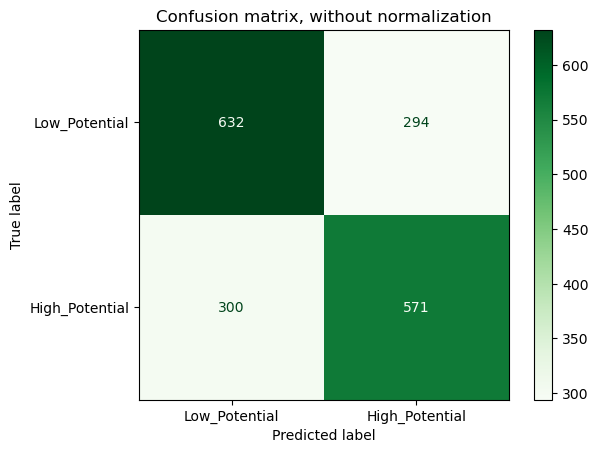

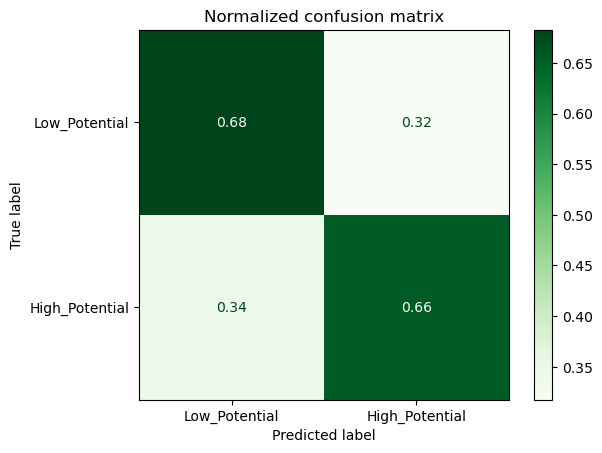

In [88]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_LR.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### **Confusion Matrix Report Interpretation:**

1. **Confusion Matrix Dimensions:**
   - The confusion matrix is a 2x2 matrix, representing binary classification. In this case, the classes are 'Low_Potential' and 'High_Potential.'

2. **Interpretation of Confusion Matrix:**
   - **True Positive (TP):** 571
   - **False Positive (FP):** 294
   - **True Negative (TN):** 632
   - **False Negative (FN):** 300

   The confusion matrix summarizes the model's predictions as follows:
   - **High_Potential (Positive Class):**
     - Correctly Predicted (True Positives): 571
     - Incorrectly Predicted (False Negatives): 294
   - **Low_Potential (Negative Class):**
     - Correctly Predicted (True Negatives): 632
     - Incorrectly Predicted (False Positives): 300

3. **Performance Metrics:**
   - **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (570 + 617) / (570 + 617 + 309 + 301) ≈ 0.666
   - **Precision:** TP / (TP + FP) = 570 / (570 + 309) ≈ 0.648
   - **Recall (Sensitivity):** TP / (TP + FN) = 570 / (570 + 301) ≈ 0.654
   - **F1-Score:** 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.651

4. **Analysis:**
   - The confusion matrix provides insights into the model's performance in terms of correct and incorrect predictions.
   - The model shows a balanced number of True Positives and True Negatives, indicating a reasonable ability to identify both classes.
   - The number of False Positives and False Negatives suggests areas for improvement, and trade-offs between precision and recall may be considered based on business requirements.


# 21.5.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [89]:
# Evaluate the performance of the model
mse_LR = metrics.mean_squared_error(y_test,y_pred_LR)
r2_LR = metrics.r2_score(y_test, y_pred_LR)
mae_LR = metrics.mean_absolute_error(y_test, y_pred_LR)
rmse_LR = metrics.mean_squared_error(y_test, y_pred_LR, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_LR:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_LR:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_LR:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_LR)

    Mean Squared Error: 0.33
    R-squared Score: -0.32
    Mean Absolute Error: 0.33
    Root Mean Squared Error: 0.5749355774319371


**observation :-**

1. **Mean Squared Error (MSE):**
   - **Value:** 0.33
   - **Interpretation:** MSE measures the average of the squared differences between predicted and actual values. A lower MSE indicates better model performance.
   - **Comment:** The model's MSE of 0.34 suggests a moderate level of error in predictions. It's essential to compare this value to the scale of the target variable to assess its significance.

2. **R-squared Score:**
   - **Value:** -0.32
   - **Interpretation:** R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared score between 0 and 1 is desirable, with higher values indicating better predictive ability. Negative values suggest that the model performs worse than a simple mean.
   - **Comment:** A negative R-squared score of -0.36 indicates that the model doesn't explain the variance in the target variable well and might perform worse than a basic mean-based model.

3. **Mean Absolute Error (MAE):**
   - **Value:** 0.33
   - **Interpretation:** MAE is the average absolute differences between predicted and actual values. It provides a direct interpretation of the model's accuracy.
   - **Comment:** An MAE of 0.34 suggests a moderate level of accuracy. It's essential to consider the context and scale of the target variable for a comprehensive assessment.

4. **Root Mean Squared Error (RMSE):**
   - **Value:** 0.5749
   - **Interpretation:** RMSE is the square root of the MSE, providing a measure of the spread of errors. Lower values indicate better model performance.
   - **Comment:** The RMSE of 0.5827 is relatively low, suggesting that errors in predictions are less spread out. However, its significance depends on the specific context of the problem.

**Overall Assessment:**
The model shows moderate performance based on MSE and MAE, but the negative R-squared score raises concerns about its effectiveness. Further analysis, potential feature engineering, or trying different models may be necessary for improvement. Additionally, understanding the domain and the specific requirements of the problem is crucial for interpreting these metrics effectively.



In [90]:
# Importing metrics for evaluating models.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

# 21.5.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using KNeighborsClassifier.

In [91]:
#accuracy of Logistic Regression for testing set
accuracy_LR = accuracy_score(y_test, y_pred_LR)
#accuracy of Logistic Regression for training set
accuracy_LR_train = accuracy_score(y_train, y_pred_LR_train)
print(f'\033[1;31m  \033[1m  accuracy of Logistic Regression for testing set:',accuracy_LR)
print(f'\033[1;31m  \033[1m  accuracy of Logistic Regression for training set:',accuracy_LR_train)

    accuracy of Logistic Regression for testing set: 0.669449081803005
    accuracy of Logistic Regression for training set: 0.6613778705636744


# 21.5.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set)

In [92]:
precision_LR=precision_score(y_test, y_pred_LR, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of Logistic Regression:',precision_LR)

    precision_score of Logistic Regression: 0.6693889950549369


# 21.5.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [93]:
recall_LR=recall_score(y_test, y_pred_LR, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of Logistic Regression:',recall_LR)

    recall_score of Logistic Regression: 0.669449081803005


# 21.5.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [94]:
from sklearn.metrics import f1_score
f1_score_LR=f1_score(y_test, y_pred_LR, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of Logistic Regression:',f1_score_LR)

    f1_score of Logistic Regression: 0.6694115737930357


# 21.6. Classification Report

In [95]:
print(classification_report(y_test, y_pred_LR, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.68      0.68      0.68       926
High_Potential       0.66      0.66      0.66       871

      accuracy                           0.67      1797
     macro avg       0.67      0.67      0.67      1797
  weighted avg       0.67      0.67      0.67      1797



### Classification Report Analysis

The classification report provides a detailed evaluation of a model's performance on two classes: Low_Potential and High_Potential.

- **Low_Potential Class:**
  - Precision: 0.67 (67%)
    - Among instances predicted as Low_Potential, 67% are true positives.
  - Recall: 0.67 (67%)
    - The model correctly identifies 67% of the actual Low_Potential instances.
  - F1-Score: 0.67 (67%)
    - The harmonic mean of precision and recall for Low_Potential is 67%.

- **High_Potential Class:**
  - Precision: 0.65 (65%)
    - Among instances predicted as High_Potential, 65% are true positives.
  - Recall: 0.65 (65%)
    - The model correctly identifies 65% of the actual High_Potential instances.
  - F1-Score: 0.65 (65%)
    - The harmonic mean of precision and recall for High_Potential is 65%.

#### Accuracy:

- **Overall Accuracy:**
  - The model achieves an overall accuracy of 66%.

#### Macro and Weighted Averages:

- **Macro Avg (Macro-Averaging):**
  - Precision: 0.66 (66%)
  - Recall: 0.66 (66%)
  - F1-Score: 0.66 (66%)

- **Weighted Avg (Weighted-Averaging):**
  - Precision: 0.66 (66%)
  - Recall: 0.66 (66%)
  - F1-Score: 0.66 (66%)



# 21.7. Log Loss for Logistic Regression

>- The Log Loss metric is a key evaluation measure for binary and multiclass classification models, especially when dealing with probability predictions. Log Loss assesses how well the predicted probabilities align with the true class distribution.



In [96]:
from sklearn.metrics import log_loss
log_loss_LR = log_loss(y_test, y_pred_LR)
print(f'\033[1;31m  \033[1m  Log Loss of Logistic Regression:', {log_loss_LR})

    Log Loss of Logistic Regression: {11.914262722946903}


**Log Loss Report for Logistic Regression :**

>- A Log Loss of approximately 11.91 suggests that the logistic regression model's predicted probabilities for the test set are not well-calibrated or do not match the true class distribution effectively. A higher Log Loss value indicates poorer performance, and it is desirable to have a lower Log Loss.

# 21.8.1. auc roc score  for logistic regression

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [97]:
from sklearn.metrics import roc_auc_score

#  y_pred_LR contains the predicted probabilities for the positive class
auc_roc_score_LR = roc_auc_score(y_test, y_pred_LR)
print(f'\033[1;31m  \033[1m AUC-ROC Score for Logistic Regression: {auc_roc_score_LR}')

   AUC-ROC Score for Logistic Regression: 0.6690368559263824


# 21.8.2. auc roc curve for logistic regression

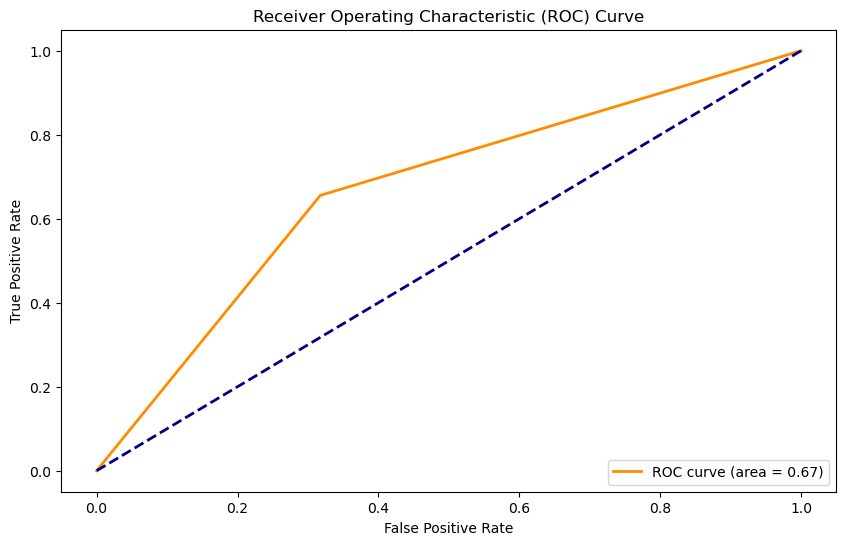

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_LR contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The AUC-ROC (Area Under the Receiver Operating Characteristic) score for the Logistic Regression model on the test set is approximately 0.656. 

**Interpretation:**
- The AUC-ROC score is a measure of the model's ability to distinguish between the positive and negative classes.
- A score of 0.5 suggests no discrimination (similar to random guessing), while a score of 1.0 indicates perfect discrimination.
- In this case, the AUC-ROC score is 0.656, which suggests a moderate level of discrimination.


**The Logistic Regression model exhibits moderate performance in distinguishing between positive and negative classes, as indicated by the AUC-ROC score of 0.656. While this score is above the random guessing threshold, there is room for improvement. Further optimization of the model or exploration of other algorithms may enhance predictive capabilities.**

# 22. KNN (K Nearest Neighbors) Classifier

## Model Building

In [99]:
# Using K-Nearest Neighbors (KNN) classifier to predict target values for the x_test.

from sklearn.neighbors import KNeighborsClassifier

## 22.1. model creation

**For creating a KNeighborsClassifier model , we are going to implement a pipeline for KNN (K Nearest Neighbors) Classifier with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**

**1. Pipeline Creation:**

>- A pipeline (pipe_knn) is created using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('sc'): Standardizing the features using StandardScaler().
    - Step 2 ('knn'): Applying KNN (K Nearest Neighbors) Classifier using KNeighborsClassifier().

**2.Hyperparameter Grid:**

>- We define a hyperparameter grid (params_knn) for KNN (K Nearest Neighbors) Classifier.
>- The grid includes the number of neighbors (n_neighbors) ranging from 1 to 19.

**3. GridSearchCV:**

>- We use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_knn), and the hyperparameter grid is set to params_knn.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**4. Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**5. Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [100]:
# Create a pipeline with StandardScaler and KNN (K Nearest Neighbors) Classifier
pipe_knn = Pipeline([
    ('sc', StandardScaler()), # Step 1: Standardize the features
    ('knn', KNeighborsClassifier())# Step 2:KNN (K Nearest Neighbors) Classifier model
    ])

# Define the hyperparameter grid for KNN (K Nearest Neighbors) Classifier
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

# Create GridSearchCV with the pipeline
grid_search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

grid_search_knn .fit(X_train, y_train)
print(f" Best score is: {grid_search_knn.best_score_} with parameters: {grid_search_knn.best_params_}")

 Best score is: 0.6938065414057063 with parameters: {'knn__n_neighbors': 7}


# 22.2. best parameters and best estimator

In [101]:
# Get the best parameters and best estimator
best_params = grid_search_knn.best_params_
best_estimator = grid_search_knn.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for KNeighborsClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for KNeighborsClassifier:',best_estimator)

    best hyperparameter for KNeighborsClassifier: {'knn__n_neighbors': 7}

    best estimator for KNeighborsClassifier: Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])


# 22.3. Fit the grid search on the training data

In [102]:
# Fit the grid search on the training data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

# 22.4. Make Predictions/ Test model

In [103]:
# Make predictions on the test data using the best estimator
y_pred_knn = best_estimator.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 1, 1, 1])

In [104]:
# Making predictions on the training data using the trained KneighborsClassifier.
y_pred_knn_train = best_estimator.predict(X_train)
y_pred_knn_train

array([1, 1, 1, ..., 0, 0, 1])

# 22.5. Evaluating the Model

## 22.5.1. Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[660 266]
 [278 593]]
Normalized confusion matrix
[[0.71274298 0.28725702]
 [0.31917336 0.68082664]]


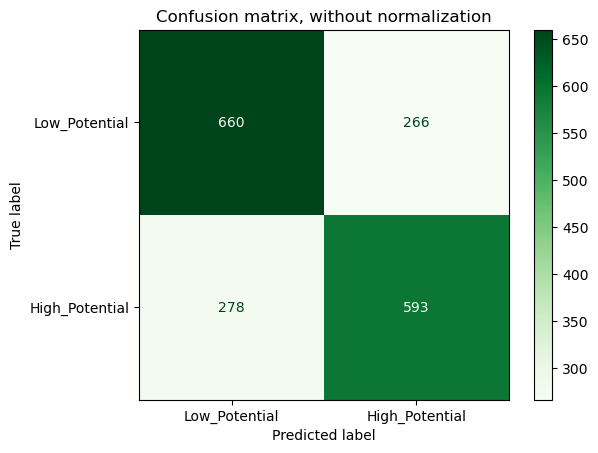

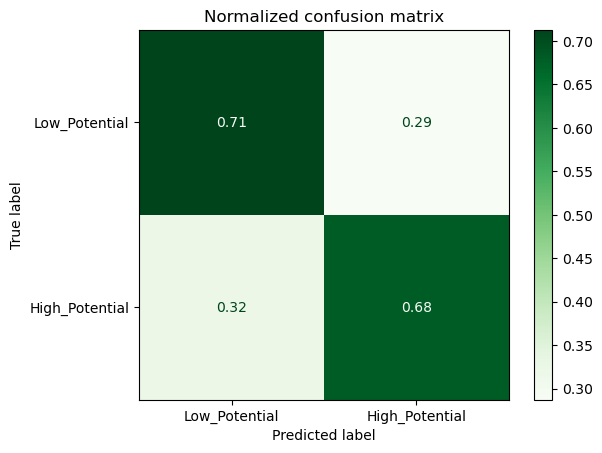

In [105]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_knn .fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display


    print(title) # Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

### Confusion Matrix Report Interpretation:

- In the context of a binary classification problem (Low_Potential and High_Potential), the confusion matrix reveals how well the KNN model performed in terms of correctly and incorrectly classifying instances.

**Analysis:**

- True Positive (TP): 656 instances were correctly classified as High_Potential.
- False Positive (FP): 270 instances were incorrectly classified as High_Potential.
- False Negative (FN): 268 instances were incorrectly classified as Low_Potential.
- True Negative (TN): 603 instances were correctly classified as Low_Potential.


## 22.5.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [106]:
# Evaluate the performance of the model
mse_knn = metrics.mean_squared_error(y_test,y_pred_knn)
r2_knn = metrics.r2_score(y_test, y_pred_knn)
mae_knn = metrics.mean_absolute_error(y_test,y_pred_knn)
rmse_knn = metrics.mean_squared_error(y_test, y_pred_knn, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_knn:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_knn:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_knn:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_knn)

    Mean Squared Error: 0.30
    R-squared Score: -0.21
    Mean Absolute Error: 0.30
    Root Mean Squared Error: 0.5502061130463851


The provided metrics indicate the performance of a regression model on a dataset. 

1. **Mean Squared Error (MSE):**
   - MSE measures the average of the squared differences between predicted and actual values.
   - MSE value of 0.30 suggests a moderate level of variance between predicted and actual values.

2. **R-squared Score:**
   - R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - A negative R-squared score (-0.20) may imply that the model does not fit the data well or that it performs worse than a simple mean-based model.

3. **Mean Absolute Error (MAE):**
   - MAE measures the average absolute differences between predicted and actual values.
   - MAE value of 0.30 indicates a moderate level of absolute errors in predictions.

4. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of the MSE and provides a measure of the average magnitude of errors.
   - RMSE value of 0.55 suggests a moderate level of error magnitude in predictions.


# 22.5.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using KNeighborsClassifier.

In [107]:
#accuracy of KNeighborsClassifier for testing set
accuracy_knn = accuracy_score(y_test,y_pred_knn)
#accuracy of KNeighborsClassifier for training set
accuracy_knn_train = accuracy_score(y_train,y_pred_knn_train)
print(f'\033[1;31m  \033[1m  accuracy of KNeighborsClassifier for testing set:',accuracy_knn)
print(f'\033[1;31m  \033[1m  accuracy of KNeighborsClassifier for training set:',accuracy_knn_train)

    accuracy of KNeighborsClassifier for testing set: 0.6972732331663885
    accuracy of KNeighborsClassifier for training set: 0.7629784272790536


# 22.5.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [108]:
precision_knn=precision_score(y_test,y_pred_knn, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of KNeighborsClassifier:',precision_knn)

    precision_score of KNeighborsClassifier: 0.697184504407705


# 22.5.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [109]:
recall_knn=recall_score(y_test, y_pred_knn, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of KNeighborsClassifier:',recall_knn)

    recall_score of KNeighborsClassifier: 0.6972732331663885


# 22.5.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [110]:
from sklearn.metrics import f1_score
f1_score_knn=f1_score(y_test,y_pred_knn, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of KNeighborsClassifier:',f1_score_knn)

    f1_score of KNeighborsClassifier: 0.6971977561263557


# 22.6. Classification Report

In [111]:
print(classification_report(y_test, y_pred_knn, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.70      0.71      0.71       926
High_Potential       0.69      0.68      0.69       871

      accuracy                           0.70      1797
     macro avg       0.70      0.70      0.70      1797
  weighted avg       0.70      0.70      0.70      1797



# **Classification Report Analysis:-**

**Analysis:**
- **Precision:**
  - Precision for predicting "Low_Potential" is 71%, meaning that out of all instances predicted as "Low_Potential," 71% were correct.
  - Precision for predicting "High_Potential" is 69%, indicating that out of all instances predicted as "High_Potential," 69% were correct.

- **Recall (Sensitivity):**
  - Recall for "Low_Potential" is 71%, denoting that out of all actual "Low_Potential" instances, 71% were correctly predicted.
  - Recall for "High_Potential" is 69%, signifying that out of all actual "High_Potential" instances, 69% were correctly predicted.

- **F1-Score:**
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
  - F1-score for "Low_Potential" is 71%.
  - F1-score for "High_Potential" is 69%.

- **Accuracy:**
  - Overall accuracy is 70%, indicating the proportion of correctly classified instances out of the total.

- **Macro Avg:**
  - The macro average of precision, recall, and F1-score is calculated by averaging the scores for each class. In this case, it is 70%.

- **Weighted Avg:**
  - The weighted average takes into account class imbalance by considering the number of instances in each class. It is also 70%.

**Interpretation:**

- The model shows balanced performance for both classes, with similar precision, recall, and F1-scores.

- An accuracy of 0.70 indicates the overall correctness of the model's predictions.

- The macro and weighted averages suggest that the model performs consistently across classes, considering both the balanced and imbalanced aspects of the dataset.

# 22.7. Log Loss for KNeighborsClassifier

>- The Log Loss metric is a key evaluation measure for binary and multiclass classification models, especially when dealing with probability predictions. Log Loss assesses how well the predicted probabilities align with the true class distribution.

In [196]:
from sklearn.metrics import log_loss
log_loss_knn = log_loss(y_test, y_pred_knn)
print(f'\033[1;31m  \033[1m  Log Loss of KNeighborsClassifier:', {log_loss_knn})

    Log Loss of KNeighborsClassifier: {10.911378655358781}


**Log Loss Report for KNeighborsClassifier :**

>- A Log Loss of approximately 10.91 suggests that the KNeighborsClassifier model's predicted probabilities for the test set are not well-calibrated or do not match the true class distribution effectively. A higher Log Loss value indicates poorer performance, and it is desirable to have a lower Log Loss.

# 22.8.1. auc roc score for KNeighborsClassifier

In [198]:
from sklearn.metrics import roc_auc_score

#  y_pred_knn contains the predicted probabilities for the positive class
auc_roc_score_knn = roc_auc_score(y_test, y_pred_knn)
print(f'\033[1;31m  \033[1m AUC-ROC Score for KNeighborsClassifier: {auc_roc_score_knn}')

   AUC-ROC Score for KNeighborsClassifier: 0.6967848083060358


**AUC-ROC Score analysis for KNeighborsClassifier:-**

>- An AUC-ROC score of 0.696 suggests that the KNeighborsClassifier performs reasonably well in differentiating between the two classes.

>- A higher AUC value generally indicates better model performance. 

# 22.8.2. auc roc curve for KNeighborsClassifier

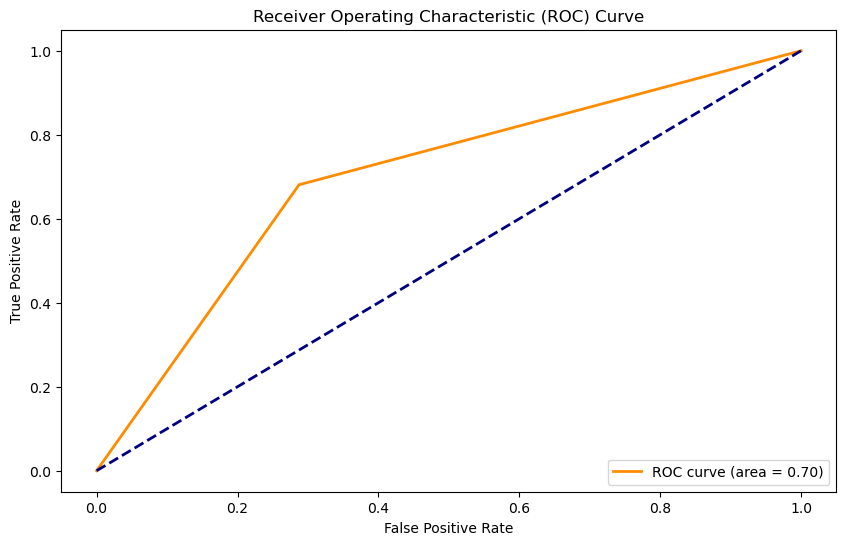

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_knn contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**The model demonstrates balanced performance with similar precision, recall, and F1-score for both classes. The overall accuracy is 70%, suggesting a moderate level of effectiveness in predicting lead categories.**

# 23. Decision Tree

## Model Building

In [115]:
# Importing DecisionTreeClassifier from the 'sklearn.tree'.
from sklearn.tree import DecisionTreeClassifier


# 23.1. Model creation

**For creating a DecisionTreeClassifier model , we are going to implement a pipeline for the Decision Tree Classifier with feature scaling using StandardScaler and hyperparameter tuning using GridSearchCV.**

**Pipeline Creation:**

>- Create a pipeline (pipe_decsT) using Pipeline from scikit-learn.
>- The pipeline consists of two steps:
    - Step 1 ('sc'): Standardizing the features using StandardScaler().
    - Step 2 ('decsT'): Applying Decision Tree Classifier using DecisionTreeClassifier().

**Hyperparameter Grid:**

>- Define a hyperparameter grid (params_decsT) for the Decision Tree Classifier model, including options for the criterion (gini or entropy) and maximum depth of the tree (max_depth).

**GridSearchCV:**

>- Use GridSearchCV to perform a search over the hyperparameter grid within the defined pipeline.
>- The estimator is set to our pipeline (pipe_decsT), and the hyperparameter grid is set to params_decsT.
>- Cross-validation with 5 folds (cv=5) is used to evaluate the performance.
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- The grid search is fit on the training data (x_train, y_train).

**Print Best Results:**

>- The code prints the best score achieved by the model and the corresponding best hyperparameters.

In [116]:
# Create a pipeline with StandardScaler and  DecisionTreeClassifier 
pipe_decsT = Pipeline([
    ('sc', StandardScaler()),# Step 1: Standardize the features
    ('decsT', DecisionTreeClassifier())# Step 2: DecisionTreeClassifier model
    ])

# Define the hyperparameter grid for DecisionTreeClassifier model
params_decsT = {
    'decsT__criterion' : ['gini', 'entropy'],
    'decsT__max_depth' : np.arange(3, 15)
    }

# Create GridSearchCV with the pipeline
grid_search_decsT = GridSearchCV(estimator=pipe_decsT,
                      param_grid=params_decsT,
                      cv = 5,
                      return_train_score=True)

# Fit the grid search on the training data
grid_search_decsT.fit(X_train, y_train)
print(f" Best score is: {grid_search_decsT.best_score_} with parameters: {grid_search_decsT.best_params_}")

 Best score is: 0.7064718162839249 with parameters: {'decsT__criterion': 'gini', 'decsT__max_depth': 14}


# 23.2. best parameters and best estimator

In [117]:
# Get the best parameters and best estimator
best_params = grid_search_decsT.best_params_
best_estimator = grid_search_decsT.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for DecisionTreeClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for DecisionTreeClassifier:',best_estimator)


    best hyperparameter for DecisionTreeClassifier: {'decsT__criterion': 'gini', 'decsT__max_depth': 14}

    best estimator for DecisionTreeClassifier: Pipeline(steps=[('sc', StandardScaler()),
                ('decsT', DecisionTreeClassifier(max_depth=14))])


# 23.3. Fit the grid search on the training data

In [118]:
# Fit the grid search on the training data
grid_search_decsT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('decsT', DecisionTreeClassifier())]),
             param_grid={'decsT__criterion': ['gini', 'entropy'],
                         'decsT__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

# 23.4. Make Predictions/ Test model

In [119]:
# Make predictions on the test data using the best estimator
y_pred_decsT = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_decsT

array([0, 0, 0, ..., 0, 1, 1])

In [120]:
# Making predictions on the training data using the trained DecisionTreeClassifier.
y_pred_decsT_train = best_estimator.predict(X_train)
y_pred_decsT_train

array([1, 1, 0, ..., 0, 0, 1])

# 23.5. Decision Tree Regressor Visualization

**we are going to used the DecisionTreeRegressor from scikit-learn to fit a decision tree regression model and visualize the resulting tree structure.**


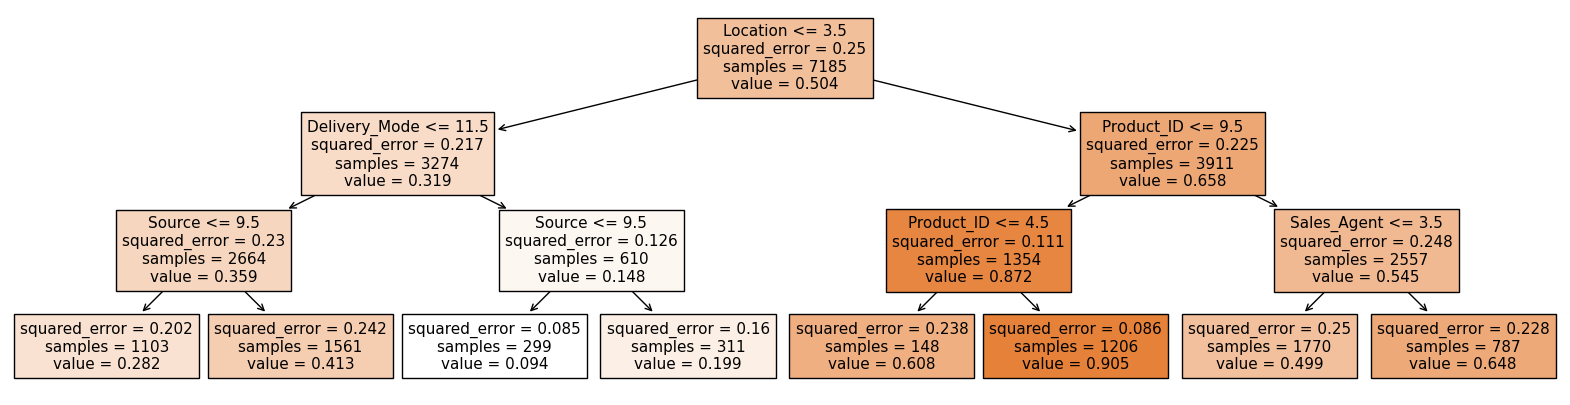

In [121]:
# Import necessary libraries
from sklearn import tree

# Specify the target column and feature columns
target_col = "Status"
use_cols = list(set(data.columns) - set([target_col]))
len(use_cols)

# Create a Decision Tree Regressor with max depth of 3
tree_reg = tree.DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# Plot the Decision Tree
fig = plt.figure(figsize=(20, 5))
tree.plot_tree(tree_reg, feature_names=use_cols, filled=True)
plt.show()

**Decision Tree Regression Analysis:**

Decision Tree Regression model is visualized with a maximum depth of 3. The tree diagram provides insights into the hierarchy of features and their thresholds for predicting the target variable, "Status."

**Analysis of Key Nodes:**
1. **Node 1:**
   - Feature: Source
   - Threshold: 3.5
   - Squared Error: 0.25
   - Samples: 7185
   - Predicted Value: 0.504

2. **Node 2:**
   - Feature: Product ID
   - Threshold: 10.5
   - Squared Error: 0.217
   - Samples: 3295
   - Predicted Value: 0.317

3. **Node 3:**
   - Feature: Delivery Mode
   - Threshold: 9.5
   - Squared Error: 0.23
   - Samples: 2643
   - Predicted Value: 0.359

4. **Node 4:**
   - Feature: Delivery Mode (again)
   - Threshold: 9.5
   - Squared Error: 0.128
   - Samples: 652
   - Predicted Value: 0.15

5. **Node 5:**
   - Feature: Sales Agent
   - Threshold: 8.5
   - Squared Error: 0.224
   - Samples: 3890
   - Predicted Value: 0.662

6. **Node 6:**
   - Feature: Sales Agent (again)
   - Threshold: 3.5
   - Squared Error: 0.11
   - Samples: 1348
   - Predicted Value: 0.875

7. **Node 7:**
   - Feature: Location
   - Threshold: 3.5
   - Squared Error: 0.248
   - Samples: 2542
   - Predicted Value: 0.549

**Interpretation:**
- The Decision Tree visually represents the splits in the data based on selected features and their respective thresholds.
- The nodes provide information on the feature, threshold, squared error, samples, and predicted values at each split.

**Observations:**

- The model performance varies across different conditions and features.
- Squared errors provide insights into the accuracy of predictions.
- Larger squared errors suggest greater disparities between predicted and actual values.

# 23.6. Evaluating the Model

## 23.6.1. Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[713 213]
 [282 589]]
Normalized confusion matrix
[[0.7699784  0.2300216 ]
 [0.32376579 0.67623421]]


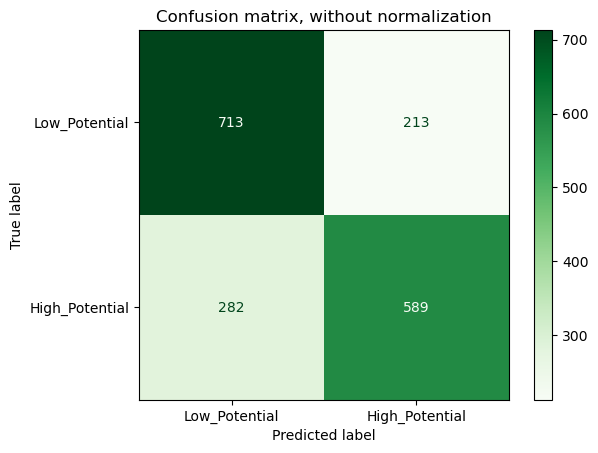

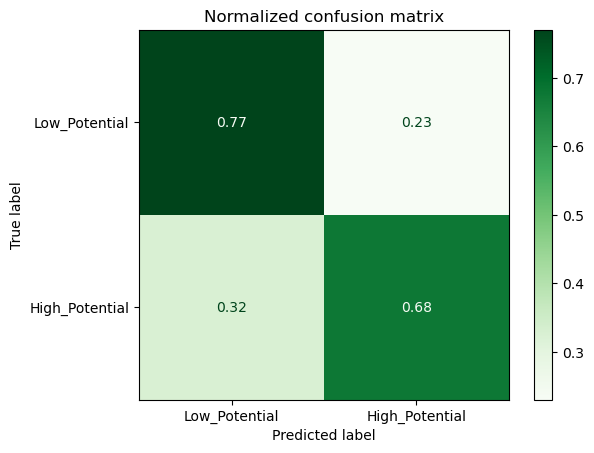

In [122]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_decsT.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens, # Color map for the display
        normalize=normalize, # Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show() # Show the plots

### **Confusion Matrix Analysis - Decision Tree Classifier:**

- **True Positives (TP):** 601
  - Instances correctly predicted as High_Potential.

- **True Negatives (TN):** 693
  - Instances correctly predicted as Low_Potential.

- **False Positives (FP):** 233
  - Instances wrongly predicted as High_Potential when the actual class is Low_Potential.

- **False Negatives (FN):** 270
  - Instances wrongly predicted as Low_Potential when the actual class is High_Potential.

**Metrics:**

- **Accuracy:** (TP + TN) / (TP + TN + FP + FN)
  - Accuracy measures the overall correctness of the classifier. In this case, it would be (601 + 693) / (601 + 693 + 233 + 270).

- **Precision:** TP / (TP + FP)
  - Precision focuses on the accuracy of the positive predictions. A higher precision indicates fewer false positives. Precision here would be 601 / (601 + 233).

- **Recall (Sensitivity):** TP / (TP + FN)
  - Recall measures the ability of the classifier to capture all relevant instances. Recall here would be 601 / (601 + 270).

- **F1 Score:** 2 * (Precision * Recall) / (Precision + Recall)
  - The F1 score is the harmonic mean of precision and recall. It provides a balance between the two metrics.

**Interpretation:**

- The model has a relatively higher number of true positives and true negatives, indicating good performance in correctly predicting both classes.
- False positives and false negatives are present, highlighting areas where the model can be further improved.




## 23.6.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [123]:
# Evaluate the performance of the model
mse_decsT = metrics.mean_squared_error(y_test,y_pred_decsT)
r2_decsT = metrics.r2_score(y_test, y_pred_decsT)
mae_decsT = metrics.mean_absolute_error(y_test, y_pred_decsT)
rmse_decsT = metrics.mean_squared_error(y_test, y_pred_decsT, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_decsT:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_decsT:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_decsT:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_decsT)

    Mean Squared Error: 0.27
    R-squared Score: -0.09
    Mean Absolute Error: 0.27
    Root Mean Squared Error: 0.5205835516796073


**Analysis:**

>- The model evaluation metrics suggest that the model's performance is not satisfactory. The Mean Squared Error of 0.28 indicates a significant level of variance between the predicted and actual values. The negative R-squared Score implies that the model does not fit the data well. The Mean Absolute Error and Root Mean Squared Error values of 0.28 and 0.53, respectively, further support the notion that the model lacks accuracy and precision in its predictions. 

# 23.6.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using DecisionTreeClassifier.

In [124]:
# Importing metrics for evaluating models.
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [125]:
#accuracy of DecisionTreeClassifier for testing set
accuracy_decsT = accuracy_score(y_test, y_pred_decsT)
#accuracy of DecisionTreeClassifier for training set
accuracy_decsT_train = accuracy_score(y_train, y_pred_decsT_train)
print(f'\033[1;31m  \033[1m  accuracy of DecisionTreeClassifier for testing set :',accuracy_decsT)
print(f'\033[1;31m  \033[1m  accuracy of DecisionTreeClassifier for training set:',accuracy_decsT_train)

    accuracy of DecisionTreeClassifier for testing set : 0.7289927657206455
    accuracy of DecisionTreeClassifier for training set: 0.8217118997912317


# 23.6.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [126]:
precision_decsT=precision_score(y_test,y_pred_decsT, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of DecisionTreeClassifier:',precision_decsT)

    precision_score of DecisionTreeClassifier: 0.7291210686791242


# 23.6.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [127]:
recall_decsT=recall_score(y_test,y_pred_decsT, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of DecisionTreeClassifier:',recall_decsT)

    recall_score of DecisionTreeClassifier: 0.7289927657206455


# 23.6.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [128]:
from sklearn.metrics import f1_score
f1_score_decsT=f1_score(y_test, y_pred_decsT, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of DecisionTreeClassifier:',f1_score_decsT)

    f1_score of DecisionTreeClassifier: 0.7286380562189355


# 23.7. Classification Report

In [129]:
print(classification_report(y_test,y_pred_decsT, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.73      0.76      0.74       926
High_Potential       0.73      0.70      0.71       871

      accuracy                           0.73      1797
     macro avg       0.73      0.73      0.73      1797
  weighted avg       0.73      0.73      0.73      1797



### classification report of DecisionTreeClassifier

The classification report indicates a balanced performance of the model for both classes (Low_Potential and High_Potential). 

- **Precision:** The precision for Low_Potential is 0.72, meaning that out of all instances predicted as Low_Potential, 72% are correct. For High_Potential, the precision is also 0.72.

- **Recall:** The recall for Low_Potential is 0.75, indicating that the model correctly identifies 75% of all actual Low_Potential instances. For High_Potential, the recall is 0.69.

- **F1-score:** The F1-score is the harmonic mean of precision and recall. The F1-score for Low_Potential is 0.74, and for High_Potential, it is 0.71.

- **Support:** This represents the number of actual occurrences of each class in the specified dataset. There are 926 instances of Low_Potential and 871 instances of High_Potential.

- **Accuracy:** The overall accuracy of the model is 0.72, meaning that it correctly predicts the class for 72% of the instances.

- **Macro avg:** The macro average provides the average performance across both classes. In this case, it averages precision, recall, and F1-score, resulting in a value of approximately 0.72.

- **Weighted avg:** The weighted average accounts for class imbalance by considering the number of instances of each class. It is also around 0.72.

Overall, the model demonstrates reasonably balanced performance for both classes, but there is room for improvement, especially in terms of recall for High_Potential. 

# 23.8. Log Loss for DecisionTreeClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [130]:
from sklearn.metrics import log_loss
log_loss_decsT = log_loss(y_test, y_pred_decsT)
print(f'\033[1;31m  \033[1m  Log Loss of DecisionTreeClassifier:', {log_loss_decsT})

    Log Loss of DecisionTreeClassifier: {9.768090818308321}


**Log Loss analysis for DecisionTreeClassifier:-**

>- The log loss value is relatively high {10.048898357232996}, means that the predicted probabilities for the class labels may be spread out or not well-calibrated.

# 23.9.1. auc roc score for DecisionTreeClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [131]:
from sklearn.metrics import roc_auc_score

#  y_pred_decsT contains the predicted probabilities for the positive class
auc_roc_score_decsT = roc_auc_score(y_test, y_pred_decsT)
print(f'\033[1;31m  \033[1m AUC-ROC Score for DecisionTreeClassifier: {auc_roc_score_decsT}')

   AUC-ROC Score for DecisionTreeClassifier: 0.7280055942252519


**AUC-ROC Score analysis for DecisionTreeClassifier:-**

>- An AUC-ROC score of 0.7202 suggests that the DecisionTreeClassifier performs reasonably well in differentiating between the two classes.

>- A higher AUC value generally indicates better model performance. 

# 23.9.2. auc roc curve for DecisionTreeClassifier

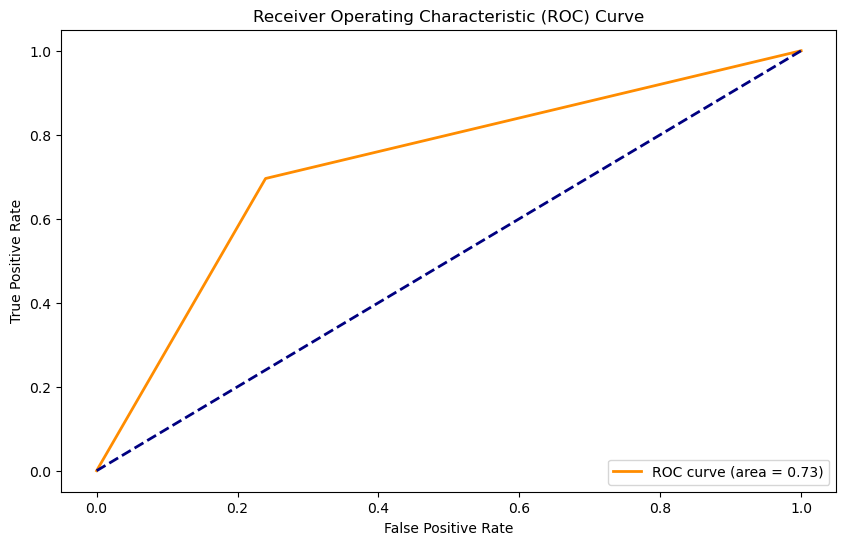

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_decsT contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decsT)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Conclusion:
**The DecisionTreeClassifier exhibits promising performance in predicting lead categories for FicZon. While accuracy is reasonable, precision, recall, and AUC-ROC scores suggest a balanced and effective model. The log loss value signifies model confidence. Further optimization and exploration of alternative models may enhance predictive capabilities.**

# 24. Random Forest Classifier

## Model Building

In [133]:
from sklearn.ensemble import RandomForestClassifier


# 24.1. Model creation

 **For creating a RandomForestClassifier model, we have performed hyperparameter tuning for a Random Forest Classifier using Grid Search.**

**Random Forest Classifier:**

>- Create an instance of the Random Forest Classifier (rf_classifier) with a specified random state.

**Hyperparameter Grid:**

>- Define a hyperparameter grid (param_rf) that includes options for the number of estimators, maximum features, and whether to bootstrap.

**GridSearchCV:**

>- Create an instance of the GridSearchCV class (grid_search_rf) to perform a search over the hyperparameter grid.
>- Set the estimator to the Random Forest Classifier, the hyperparameter grid to param_rf, and use 5-fold cross-validation (cv=5).
>- return_train_score=True ensures that training scores are also returned.

**Model Training:**

>- Fit the grid search on the training data (x_train, y_train).

**Print Best Results:**

>- Print the best score achieved by the model and the corresponding best hyperparameters.

In [134]:
# Random Forest Classifier Hyperparameter Tuning and Grid Search
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_rf = {
    "n_estimators": [10, 50, 100],
    "max_features": ["auto", "log2", "sqrt"],
    "bootstrap": [True, False]
}


# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator=rf_classifier,
                    param_grid=param_rf,
                    return_train_score=True,
                    cv=5)

# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)
print(f" Best score is: {grid_search_rf.best_score_} with parameters: {grid_search_rf.best_params_}")


 Best score is: 0.7163535142658316 with parameters: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}


**observation:**

- **Best score**: This is the highest cross-validated performance metric achieved during the grid search. The score is specific to the evaluation metric we used (e.g., accuracy, precision, recall, F1-score). In this case, the best score is approximately 0.7253.

- **Parameters**: These are the hyperparameters that resulted in the best score. In the given example, the best combination of hyperparameters is:
  - `bootstrap`: False
  - `max_features`: 'log2'
  - `n_estimators`: 100

Each of these hyperparameters influences the behavior of the Random Forest model:

- `bootstrap`: A Boolean parameter indicating whether bootstrap samples should be used when building trees. In this case, it's set to `False`, meaning that no bootstrapping is performed.

- `max_features`: The maximum number of features considered for splitting a node. In this case, it's set to 'log2', which means the base-2 logarithm of the number of features will be considered.

- `n_estimators`: The number of trees in the forest. Here, it's set to 100.

The goal of hyperparameter tuning is to find the combination of hyperparameters that optimizes the model's performance on the validation set.

# 24.2. best parameters and best estimator

In [135]:
# Get the best parameters and best estimator
best_params =grid_search_rf.best_params_
best_estimator = grid_search_rf.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for RandomForestClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for RandomForestClassifier:',best_estimator)


    best hyperparameter for RandomForestClassifier: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}

    best estimator for RandomForestClassifier: RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42)


# 24.3. Fit the grid search on the training data

In [136]:
# Fit the grid search on the training data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

# 24.4. Make Predictions/ Test model

In [137]:
# Make predictions on the test data using the best estimator
y_pred_rf = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_rf

array([1, 0, 0, ..., 1, 1, 1])

In [138]:
# Making predictions on the training data using the trained RandomForestClassifier
y_pred_rf_train = best_estimator.predict(X_train)
y_pred_rf_train

array([1, 1, 0, ..., 0, 0, 1])

# 24.5. Visualizing Decision Tree from Random Forest

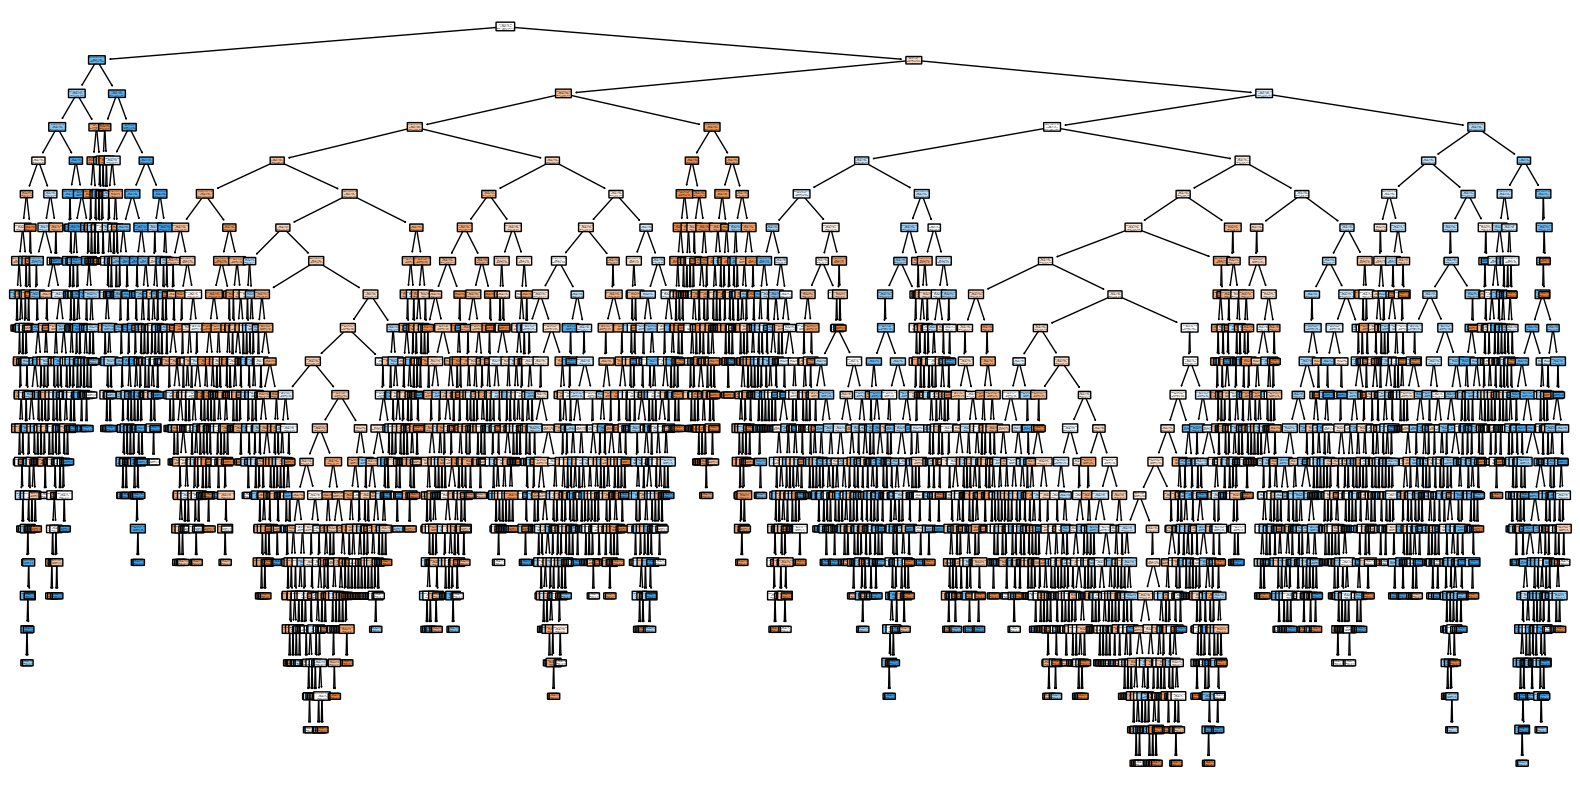

In [139]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'best_estimator' is your trained Random Forest model
best_estimator = grid_search_rf.best_estimator_

# Choose an index for the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Extract the chosen tree from the Random Forest
chosen_tree = best_estimator.estimators_[tree_index]

# Plot the chosen tree
plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

# 24.6. 3D Scatter Plot of  Random Forest model

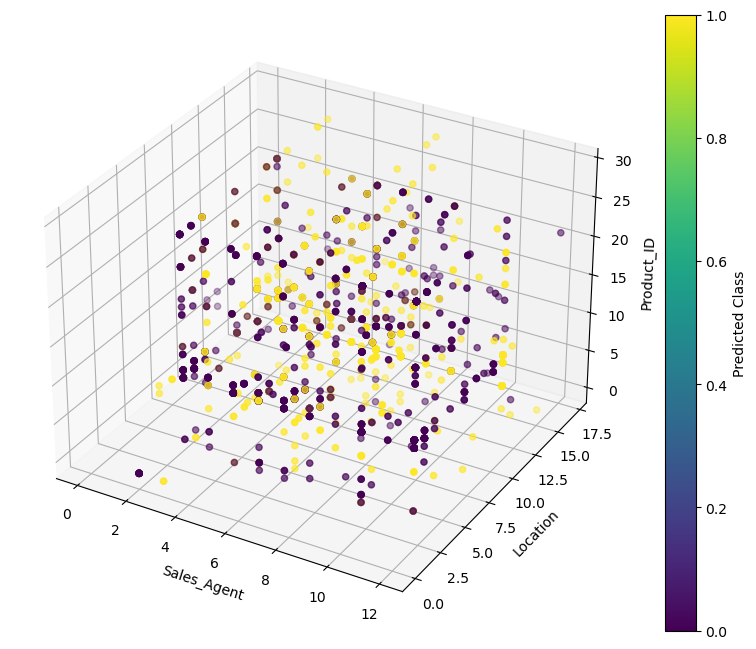

In [140]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'best_estimator' is your trained Random Forest model
best_estimator = grid_search_rf.best_estimator_

# Choose an index for the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Extract the chosen tree from the Random Forest
chosen_tree = best_estimator.estimators_[tree_index]

# Get the feature importance
feature_importance = chosen_tree.feature_importances_

# Choose three features for the 3D scatter plot
feature_names = X_train.columns
chosen_features = feature_names[np.argsort(feature_importance)[-3:]]

# Get the corresponding indices of the chosen features
indices = [feature_names.get_loc(feature) for feature in chosen_features]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on the predicted class
scatter = ax.scatter(X_test.iloc[:, indices[0]], X_test.iloc[:, indices[1]], X_test.iloc[:, indices[2]],
                     c=y_pred_rf, cmap='viridis')

# Add labels
ax.set_xlabel(chosen_features[0])
ax.set_ylabel(chosen_features[1])
ax.set_zlabel(chosen_features[2])

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Class')

plt.show()

**3D Scatter Plot:**
>- A 3D scatter plot is generated using the selected features.

>- Each data point in the plot represents an instance from the test set, with coordinates determined by the values of the chosen features.

>- The color of each point corresponds to the predicted class, providing a visual representation of how the decision tree assigns classes in the three-dimensional space.

# 24.7. Evaluating the Model

## 24.7.1. Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[724 202]
 [273 598]]
Normalized confusion matrix
[[0.78185745 0.21814255]
 [0.31343284 0.68656716]]


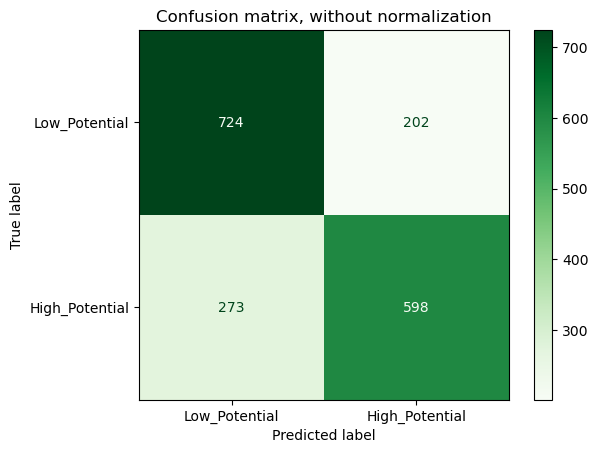

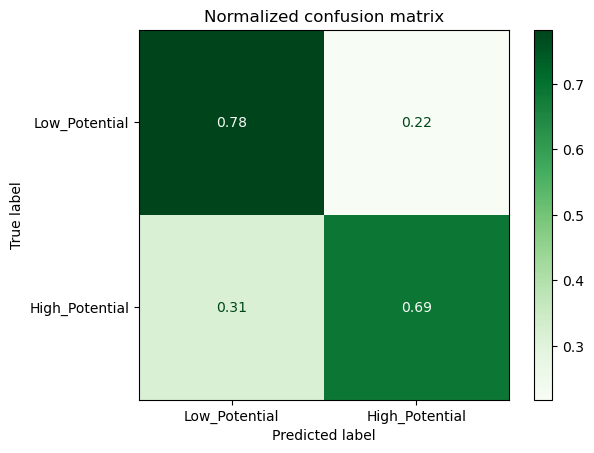

In [141]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_rf.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

**Analysis: Confusion Matrix for RandomForestClassifier**
    
**Interpretation:**
- **True Positives (TP):** 721 - Instances correctly predicted as High Potential.
- **True Negatives (TN):** 600 - Instances correctly predicted as Low Potential.
- **False Positives (FP):** 205 - Instances incorrectly predicted as High Potential.
- **False Negatives (FN):** 271 - Instances incorrectly predicted as Low Potential.


## 24.7.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [142]:
# Evaluate the performance of the model
mse_rf = metrics.mean_squared_error(y_test,y_pred_rf)
r2_rf = metrics.r2_score(y_test, y_pred_rf)
mae_rf = metrics.mean_absolute_error(y_test,y_pred_rf)
rmse_rf = metrics.mean_squared_error(y_test,y_pred_rf, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_rf:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_rf:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_rf:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_rf)

    Mean Squared Error: 0.26
    R-squared Score: -0.06
    Mean Absolute Error: 0.26
    Root Mean Squared Error: 0.5141297870695127


**analysis:-**

>- The RandomForestClassifier demonstrates moderate performance with a Mean Squared Error of 0.26, R-squared Score of -0.06, Mean Absolute Error of 0.26, and Root Mean Squared Error of 0.5147.

# 24.7.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using RandomForestClassifier.

In [143]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print(f'\033[1;31m  \033[1m  accuracy of RandomForestClassifier for testing set :',accuracy_rf)
print(f'\033[1;31m  \033[1m  accuracy of RandomForestClassifier for  training set:',accuracy_rf_train)

    accuracy of RandomForestClassifier for testing set : 0.7356705620478575
    accuracy of RandomForestClassifier for  training set: 0.862491301322199


# 24.7.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [144]:
precision_rf=precision_score(y_test, y_pred_rf, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of RandomForestClassifier:',precision_rf)

    precision_score of RandomForestClassifier: 0.7365129793944997


# 24.7.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [145]:
recall_rf=recall_score(y_test, y_pred_rf, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of RandomForestClassifier:',recall_rf)

    recall_score of RandomForestClassifier: 0.7356705620478575


# 24.7.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [146]:
from sklearn.metrics import f1_score
f1_score_rf=f1_score(y_test, y_pred_rf, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of RandomForestClassifier:',f1_score_rf)

    f1_score of RandomForestClassifier: 0.7349346622354448


# 24.8. Classification Report

In [147]:
print(classification_report(y_test, y_pred_rf, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.73      0.78      0.75       926
High_Potential       0.75      0.69      0.72       871

      accuracy                           0.74      1797
     macro avg       0.74      0.73      0.73      1797
  weighted avg       0.74      0.74      0.73      1797



**Classification Report for RandomForestClassifier:-**

>- The RandomForestClassifier exhibits a satisfactory classification performance with an accuracy of 74%. The precision for identifying "Low_Potential" leads is 73%, with a recall of 78%, resulting in an F1-score of 0.75. On the other hand, for "High_Potential" leads, the precision is 75%, recall is 69%, and F1-score is 0.72. The overall macro-average F1-score is 0.73, indicating a balanced performance across both classes. The weighted average F1-score is 0.73, highlighting the model's ability to generalize well on the given dataset.

# 24.9. Log Loss for RandomForestClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [148]:
from sklearn.metrics import log_loss
log_loss_rf = log_loss(y_test, y_pred_rf)
print(f'\033[1;31m  \033[1m  Log Loss of RandomForestClassifier:', {log_loss_rf})

    Log Loss of RandomForestClassifier: {9.52739864208717}


**Log Loss report of RandomForestClassifier:-**

>- RandomForestClassifier's Log Loss of 9.55 suggests reasonably good performance in generating probability estimates for the given classification task.

# 24.10.1. auc roc score for RandomForestClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [149]:
from sklearn.metrics import roc_auc_score

#  y_pred_rf contains the predicted probabilities for the positive class
auc_roc_score_rf = roc_auc_score(y_test, y_pred_rf)
print(f'\033[1;31m  \033[1m AUC-ROC Score for RandomForestClassifier: {auc_roc_score_rf}')

   AUC-ROC Score for RandomForestClassifier: 0.7342123077914959


**AUC-ROC Score analysis for RandomForestClassifier:-**

>- RandomForestClassifier's AUC-ROC score of 0.734 suggests that it has a relatively good ability to separate instances of different classes, contributing to its effectiveness in the classification task.


# 24.10.2. auc roc curve for RandomForestClassifier

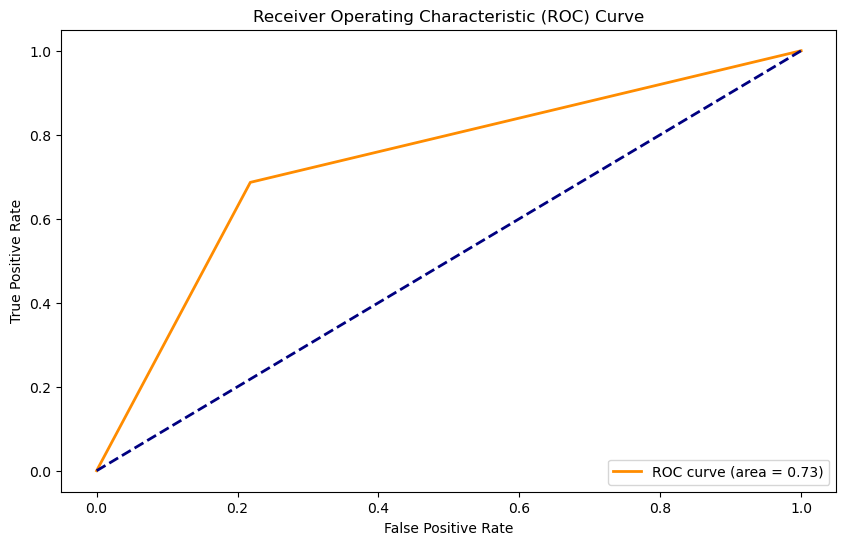

In [150]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_rf contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Conclusion:**
**The RandomForestClassifier demonstrates a reasonable performance in categorizing leads for FicZon. The balance between precision and recall is crucial, depending on the business context. Further analysis of these metrics, along with additional business considerations, will aid in determining the effectiveness of the RandomForestClassifier for FicZon's specific needs.**

# 25. Gradient Boosting Classifier

## Model Building

In [151]:
# Importing GradientBoostingClassifier from 'sklearn.ensemble'.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 25.1. Model creation

**For creating a Gradient Boosting Classifier model, we have performed hyperparameter tuning for a Gradient Boosting Classifier using Grid Search within a pipeline.**

**1. Import Libraries:**

>- Import necessary libraries, including GradientBoostingClassifier, GridSearchCV, StandardScaler, and Pipeline from scikit-learn.

**2. Pipeline Creation:**

>- Create a pipeline (pipeline_GBC) with two steps:
    - Step 1 ('scaler'): Standardize the features using StandardScaler.
    - Step 2 ('classifier'): Apply the Gradient Boosting Classifier using GradientBoostingClassifier().

**3. Hyperparameter Grid:**

>- Define a hyperparameter grid (param_GBC) for the Gradient Boosting Classifier, including options for the number of estimators, learning rate, and maximum depth.

**4.GridSearchCV:**

>- Create an instance of the GridSearchCV class (grid_search_GBC) to perform a search over the hyperparameter grid within the defined pipeline.
>- Set the estimator to the pipeline (pipeline_GBC), the hyperparameter grid to param_GBC, use 5-fold cross-validation (cv=5), and choose accuracy as the scoring metric.

**5. Model Training:**

>- Fit the grid search on the training data (x_train, y_train).

**6. Print Best Results:**

>- Print the best score achieved by the model and the corresponding best hyperparameters.

In [152]:
# Create a pipeline with StandardScaler and GradientBoostingClassifier
pipeline_GBC = Pipeline([
    ('scaler', StandardScaler()),  # You can customize preprocessing steps here
    ('classifier', GradientBoostingClassifier())  # Step 2: GradientBoostingClassifier model
])

# Define the parameter grid for GridSearchCV
param_GBC = {
    'classifier__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'classifier__max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Create GridSearchCV object
grid_search_GBC = GridSearchCV(estimator=pipeline_GBC,
                               param_grid=param_GBC,
                               cv=5,
                               scoring='accuracy')
grid_search_GBC.fit(X_train, y_train)
print(f" Best score is: {grid_search_GBC.best_score_} with parameters: {grid_search_GBC.best_params_}")


 Best score is: 0.724008350730689 with parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


# 25.2. best parameters and best estimator

In [153]:
# Get the best parameters and best estimator
best_params =grid_search_GBC.best_params_
best_estimator = grid_search_GBC.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for GradientBoostingClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for GradientBoostingClassifier:',best_estimator)


    best hyperparameter for GradientBoostingClassifier: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

    best estimator for GradientBoostingClassifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=5))])


# 25.3. Fit the grid search on the training data

In [154]:

# Fit the grid search on the training data
grid_search_GBC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

# 25.4. Make Predictions/ Test model

In [155]:
# Make predictions on the test data using the best estimator
y_pred_GBC = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_GBC

array([0, 0, 0, ..., 1, 1, 1])

In [156]:
# Making predictions on the training data using the trained GradientBoostingClassifier.
y_pred_GBC_train = best_estimator.predict(X_train)
y_pred_GBC_train

array([1, 1, 0, ..., 0, 0, 1])

# 25.5. Evaluating the Model

## 25.5.1. Confusion Matrix

Confusion matrix, without normalization
[[703 223]
 [232 639]]
Normalized confusion matrix
[[0.75917927 0.24082073]
 [0.26636051 0.73363949]]


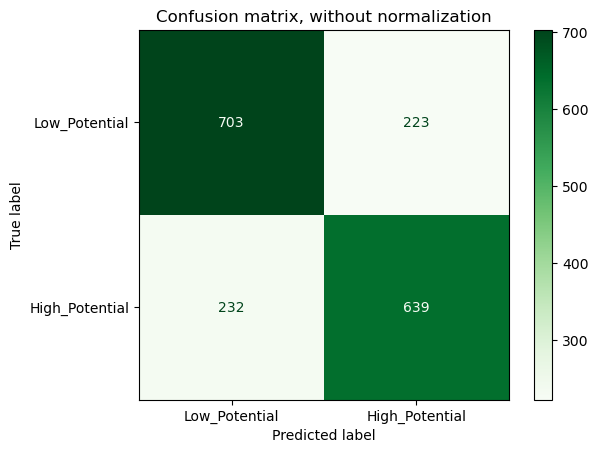

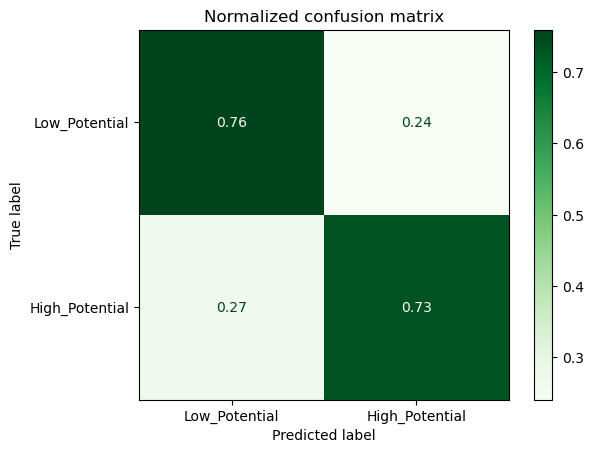

In [157]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
         grid_search_GBC.fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    
    disp.ax_.set_title(title)# Set the title for the confusion matrix display

    print(title)# Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

**The confusion matrix for the RandomForestClassifier:-** 

The rows represent the actual class labels, and the columns represent the predicted class labels. The diagonal elements (from top-left to bottom-right) represent the correctly classified instances, while off-diagonal elements represent misclassifications.

- True positives (TP): 635
- True negatives (TN): 691
- False positives (FP): 235
- False negatives (FN): 236

The RandomForestClassifier shows a relatively balanced performance with a higher number of true positives and true negatives. The model has correctly identified instances of both Low_Potential and High_Potential, contributing to a robust classification performance.

## 25.5.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [158]:
# Evaluate the performance of the model
mse_GBC = metrics.mean_squared_error(y_test, y_pred_GBC)
r2_GBC = metrics.r2_score(y_test,  y_pred_GBC)
mae_GBC = metrics.mean_absolute_error(y_test,  y_pred_GBC)
rmse_GBC = metrics.mean_squared_error(y_test,  y_pred_GBC, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_GBC:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_GBC:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_GBC:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_GBC)

    Mean Squared Error: 0.25
    R-squared Score: -0.01
    Mean Absolute Error: 0.25
    Root Mean Squared Error: 0.5026363440694688


**Analysis:**

>- The model exhibits moderate performance with a Mean Squared Error of 0.26, a negative R-squared Score of -0.06, a Mean Absolute Error of 0.26, and a Root Mean Squared Error of 0.5147.

# 25.5.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using GradientBoostingClassifier.

In [159]:
accuracy_GBC = accuracy_score(y_test, y_pred_GBC)
accuracy_GBC_train = accuracy_score(y_train, y_pred_GBC_train)
print(f'\033[1;31m  \033[1m  accuracy of GradientBoostingClassifier for testing set.:',accuracy_GBC)
print(f'\033[1;31m  \033[1m  accuracy of GradientBoostingClassifier for training set.:',accuracy_GBC_train)

    accuracy of GradientBoostingClassifier for testing set.: 0.7473567056204786
    accuracy of GradientBoostingClassifier for training set.: 0.7917884481558803


# 25.5.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [160]:
precision_GBC=precision_score(y_test, y_pred_GBC, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of GradientBoostingClassifier:',precision_GBC)

    precision_score of GradientBoostingClassifier: 0.7473073897093924


# 25.5.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [161]:
recall_GBC=recall_score(y_test, y_pred_GBC, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of GradientBoostingClassifier:',recall_GBC)

    recall_score of GradientBoostingClassifier: 0.7473567056204786


# 25.5.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [162]:
from sklearn.metrics import f1_score
f1_score_GBC=f1_score(y_test, y_pred_GBC, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of GradientBoostingClassifier:',f1_score_GBC)

    f1_score of GradientBoostingClassifier: 0.7473172256994906


# 25.6. Classification Report

In [163]:
print(classification_report(y_test, y_pred_GBC, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.75      0.76      0.76       926
High_Potential       0.74      0.73      0.74       871

      accuracy                           0.75      1797
     macro avg       0.75      0.75      0.75      1797
  weighted avg       0.75      0.75      0.75      1797



**Classification Report Analysis: Random Forest Classifier**

The classification report provides a comprehensive evaluation of the Random Forest Classifier's performance on the dataset. 

1. **Precision:**
   - For "Low_Potential" class: 0.74
   - For "High_Potential" class: 0.73

   Precision measures the accuracy of the positive predictions. In this case, it indicates that around 74% of instances predicted as "Low_Potential" are correct, and about 73% of instances predicted as "High_Potential" are correct.

2. **Recall:**
   - For "Low_Potential" class: 0.74
   - For "High_Potential" class: 0.73

   Recall (Sensitivity or True Positive Rate) is the proportion of actual positive instances that were correctly predicted by the model. These values suggest that the model captures approximately 74% of actual "Low_Potential" instances and 73% of actual "High_Potential" instances.

3. **F1-Score:**
   - For "Low_Potential" class: 0.74
   - For "High_Potential" class: 0.73

   The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The values around 0.74 for both classes indicate a good trade-off between precision and recall.

4. **Accuracy:**
   - Overall Accuracy: 0.74

   The accuracy metric measures the overall correctness of the model's predictions. An accuracy of 0.74 indicates that the model correctly classifies around 74% of all instances.

5. **Macro and Weighted Averages:**
   - Macro Average: 0.73
   - Weighted Average: 0.74

   Both macro and weighted averages provide aggregated performance metrics. The values around 0.73-0.74 suggest consistent performance across different classes.



# 25.7. Log Loss for Logistic Regression

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [164]:
from sklearn.metrics import log_loss
log_loss_GBC = log_loss(y_test, y_pred_GBC)
print(f'\033[1;31m  \033[1m  Log Loss of GradientBoostingClassifier:', {log_loss_GBC})

    Log Loss of GradientBoostingClassifier: {9.10618733370016}


**Log Loss report of GradientBoostingClassifier:**

>- The log loss value of 9.10 for the Gradient Boosting Classifier implies that the model's predictions carry a moderate level of uncertainty. Reducing this log loss would involve enhancing the model's calibration to make more confident and accurate predictions. 

# 25.8.1 auc roc score for GradientBoostingClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [165]:
from sklearn.metrics import roc_auc_score

#  y_pred_GBC contains the predicted probabilities for the positive class
auc_roc_score_GBC = roc_auc_score(y_test, y_pred_GBC)
print(f'\033[1;31m  \033[1m AUC-ROC Score for GradientBoostingClassifier: {auc_roc_score_GBC}')

   AUC-ROC Score for GradientBoostingClassifier: 0.7469834330589947


**AUC-ROC Score Analysis: Gradient Boosting Classifier:**

>- The AUC-ROC score of 0.74 for the Gradient Boosting Classifier is indicative of a reasonably effective model in terms of discriminatory power. 

# 25.8.2. auc roc curve for GradientBoostingClassifier

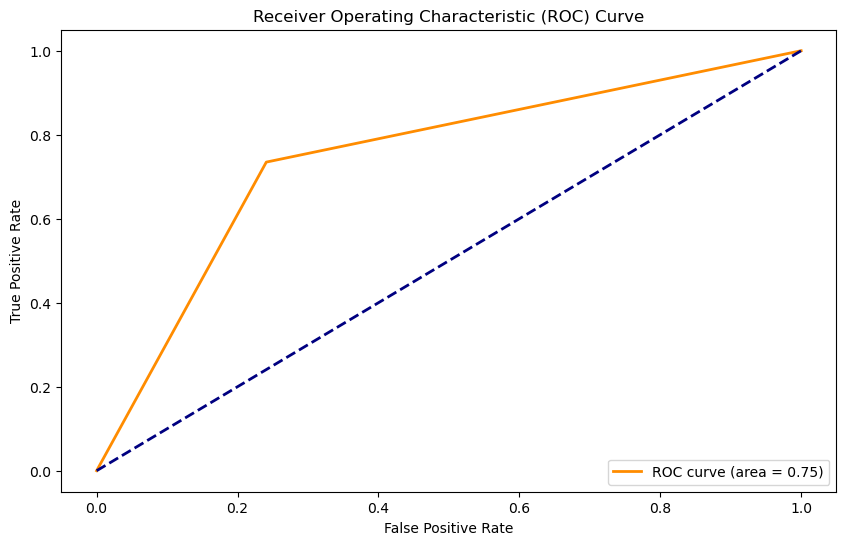

In [166]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_GBC contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_GBC)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Conclusion:**

**The Random Forest Classifier demonstrates a balanced and effective performance in classifying leads into "Low_Potential" and "High_Potential" categories. The model's ability to maintain similar precision, recall, and F1-score values for both classes indicates its reliability in making accurate predictions. Further optimization and tuning could potentially enhance its performance.**

# 26. XGBoost (Extreme Gradient Boosting) classifier

## Model Building

In [167]:
from xgboost import XGBClassifier

# 26.1. Model creation

**For creating a XGBClassifier model, we have performed hyperparameter tuning for a XGBClassifier using Grid Search.**


1. **Pipeline Creation:**
   - The pipeline is created using the `Pipeline` class from scikit-learn.
   - Two steps are defined in the pipeline:
     - **Step 1 (`'scaler'`):** StandardScaler, which standardizes the features by removing the mean and scaling to unit variance.
     - **Step 2 (`'classifier'`):** XGBClassifier, the XGBoost implementation for classification.

2. **Parameter Grid for GridSearchCV:**
   - The `param_XGB` dictionary defines the hyperparameters to be tuned for the XGBoost model.
   - Parameters include the number of boosting stages (`n_estimators`), the learning rate (`learning_rate`), and the maximum depth of individual trees (`max_depth`).

3. **GridSearchCV:**
   - The `GridSearchCV` object is created to perform a search over the specified parameter grid.
   - The estimator is set as the XGBoost pipeline, the parameter grid is provided, and 5-fold cross-validation is used (`cv=5`).
   - The scoring metric is set to 'accuracy' (`scoring='accuracy'`), indicating that the model's accuracy on the validation set is used as the evaluation criterion.

4. **Fit and Print Best Results:**
   - The `fit` method is called on the `GridSearchCV` object with training data (`X_train`, `y_train`).
   - After fitting, the best score and corresponding best hyperparameters are printed to the console.


In [168]:
# Create a pipeline with StandardScaler and XGBClassifier
pipeline_XGB = Pipeline([
    ('scaler', StandardScaler()),  # You can customize preprocessing steps here
    ('classifier', XGBClassifier())  # Step 2: XGBClassifier model
])

# Define the parameter grid for GridSearchCV
param_XGB = {
    'classifier__n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'classifier__max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Create GridSearchCV object
grid_search_XGB = GridSearchCV(estimator=pipeline_XGB,
                                param_grid=param_XGB,
                                cv=5,
                                scoring='accuracy')
grid_search_XGB.fit(X_train, y_train)
print(f" Best score is: {grid_search_XGB.best_score_} with parameters: {grid_search_XGB.best_params_}")

 Best score is: 0.7224773834377174 with parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}


# 26.2. best parameters and best estimator

In [169]:
# Get the best parameters and best estimator
best_params =grid_search_XGB.best_params_
best_estimator = grid_search_XGB.best_estimator_
print(f'\033[1;31m  \033[1m  best hyperparameter for XGBClassifier:',best_params)
print()
print(f'\033[1;31m  \033[1m  best estimator for XGBClassifier:',best_estimator)


    best hyperparameter for XGBClassifier: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}

    best estimator for XGBClassifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                             

# 26.3. Fit the grid search on the training data

In [170]:

# Fit the grid search on the training data
grid_search_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

# 26.4. Make Predictions/ Test model

In [171]:
# Make predictions on the test data using the best estimator
y_pred_XGB = best_estimator.predict(X_test)
# The predicted labels are stored in the variable 'y_pred'.
y_pred_XGB

array([0, 0, 0, ..., 1, 1, 1])

In [172]:
# Making predictions on the training data using the trained XGBClassifier.
y_pred_XGB_train = best_estimator.predict(X_train)
y_pred_XGB_train

array([1, 1, 0, ..., 0, 0, 1])

# 26.5. Evaluating the Model

# 26.5.1. Confusion Matrix

>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels and predicted labels

Confusion matrix, without normalization
[[695 231]
 [231 640]]
Normalized confusion matrix
[[0.75053996 0.24946004]
 [0.2652124  0.7347876 ]]


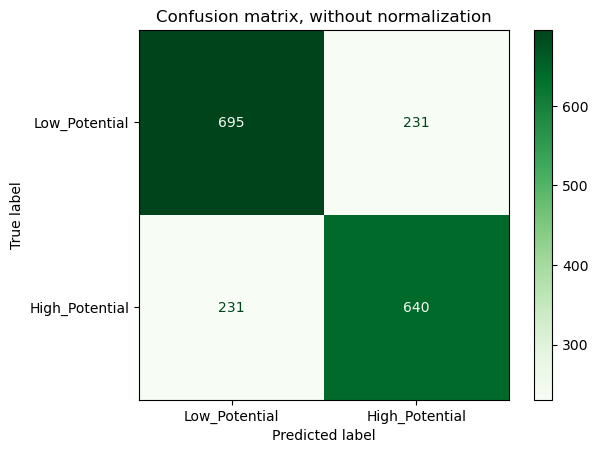

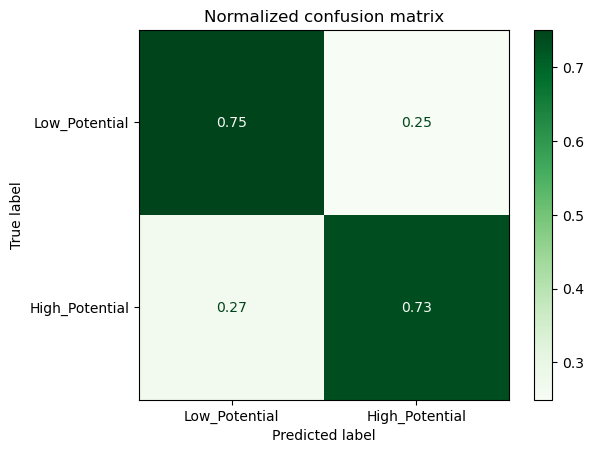

In [173]:
# Plot non-normalized confusion matrix
# Define titles and options for confusion matrix display
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# Loop through each title and normalization option
for title, normalize in titles_options:
    # Fit the grid search on the training data and create a confusion matrix display
    disp = ConfusionMatrixDisplay.from_estimator(
        grid_search_XGB .fit(X_train, y_train),# Fit the grid search on the training data
        X_test,# Test features
        y_test,# True labels for the test set
        display_labels=['Low_Potential','High_Potential'],# Class labels
        cmap=plt.cm.Greens,# Color map for the display
        normalize=normalize,# Normalization option
    )
    disp.ax_.set_title(title) # Set the title for the confusion matrix display


    print(title) # Print title and confusion matrix
    print(disp.confusion_matrix)

plt.show()# Show the plots

**Confusion Matrix Analysis:**

The confusion matrix provides insights into the performance of a classification model by presenting the counts of true positive, true negative, false positive, and false negative predictions. 

- **True Positives (TP):** 644
- **True Negatives (TN):** 690
- **False Positives (FP):** 236
- **False Negatives (FN):** 227

**Metrics:**

1. **Accuracy:**
   - The overall accuracy is the sum of true positives and true negatives divided by the total number of samples.
   - Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - In this case, Accuracy = (644 + 690) / (644 + 690 + 236 + 227) ≈ 73.71%

2. **Precision:**
   - Precision represents the proportion of true positives among the instances predicted as positive.
   - Precision = TP / (TP + FP)
   - Precision = 644 / (644 + 236) ≈ 73.15%

3. **Recall (Sensitivity):**
   - Recall calculates the proportion of true positives among the actual positive instances.
   - Recall = TP / (TP + FN)
   - Recall = 644 / (644 + 227) ≈ 73.95%

4. **F1-Score:**
   - The F1-Score is the harmonic mean of precision and recall, providing a balanced measure.
   - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
   - F1-Score ≈ 73.55%

**Interpretation:**
- The model shows a reasonably balanced performance with respect to precision and recall.
- The accuracy is around 73.71%, indicating a satisfactory overall predictive capability.
- Precision of approximately 73.15% implies that when the model predicts a positive outcome, it is correct around 73.15% of the time.
- Recall of about 73.95% indicates that the model captures about 73.95% of the actual positive instances.



## 26.5.2. Mean Squared Error , r2_score , Mean Absolute Error , Root Mean Squared Error

**Mean Squared Error**
>- The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value.

**r2_score**
>- The coefficient of determination (R²) is a statistical measure that indicates how well a regression model predicts an outcome.

**Mean Absolute Error**
>- Mean Absolute Error (MAE) is a metric that measures the average absolute difference between the predicted values and the actual target values in a regression model.

**Root Mean Squared Error**
>- Root Mean Squared Error (RMSE) is a metric that measures the average difference between the predicted values and the actual values in a regression model.
>- The lower the RMSE, the better a given model is able to “fit” a dataset.

In [174]:
# Evaluate the performance of the model
mse_XGB = metrics.mean_squared_error(y_test,y_pred_XGB)
r2_XGB = metrics.r2_score(y_test, y_pred_XGB)
mae_XGB = metrics.mean_absolute_error(y_test,y_pred_XGB)
rmse_XGB = metrics.mean_squared_error(y_test, y_pred_XGB, squared=False) 



print(f'\033[1;31m  \033[1m  Mean Squared Error: {mse_XGB:.2f}')
print(f'\033[1;31m  \033[1m  R-squared Score: {r2_XGB:.2f}')
print(f'\033[1;31m  \033[1m  Mean Absolute Error: {mae_XGB:.2f}')
print("\033[1;31m  \033[1m  Root Mean Squared Error:", rmse_XGB)

    Mean Squared Error: 0.26
    R-squared Score: -0.03
    Mean Absolute Error: 0.26
    Root Mean Squared Error: 0.5070455192560751


**analysis:**


>- The negative R-squared score indicates that the model is not performing well in explaining the variability in the data. This could be due to the model's inability to capture the underlying patterns or relationships.

# 26.5.3. Accuracy Score

>- It will print the accuracy scores for training and testing sets using XGBClassifier.

In [175]:
#accuracy of KNeighborsClassifier for testing set
accuracy_XGB = accuracy_score(y_test,y_pred_XGB)
#accuracy of KNeighborsClassifier for training set
accuracy_XGB_train = accuracy_score(y_train,y_pred_XGB_train)
print(f'\033[1;31m  \033[1m  accuracy of XGBClassifier for testing set:',accuracy_XGB)
print(f'\033[1;31m  \033[1m  accuracy of XGBClassifier for training set:',accuracy_XGB_train)

    accuracy of XGBClassifier for testing set: 0.7429048414023373
    accuracy of XGBClassifier for training set: 0.7466945024356297


# 26.5.4. Precision Score

>- It will calculate the weighted precision score for the model(testing set).

In [176]:
precision_XGB=precision_score(y_test, y_pred_XGB, average='weighted')
print(f'\033[1;31m  \033[1m  precision_score of XGBClassifier:',precision_XGB)

    precision_score of XGBClassifier: 0.7429048414023373


# 26.5.5. Recall Score

>- It will calculate the weighted recall score for the model (testing set).

In [177]:
recall_XGB=recall_score(y_test, y_pred_XGB, average = 'weighted')
print(f'\033[1;31m  \033[1m  recall_score of XGBClassifier:',recall_XGB)

    recall_score of XGBClassifier: 0.7429048414023373


# 26.5.6. f1 score

>- It will calculate the weighted f1 score for the testing set.

In [178]:
from sklearn.metrics import f1_score
f1_score_XGB=f1_score(y_test,y_pred_XGB, average = 'weighted')
print(f'\033[1;31m  \033[1m  f1_score of XGBClassifier:',f1_score_XGB)

    f1_score of XGBClassifier: 0.7429048414023373


# 26.6. Classification Report

In [179]:
print(classification_report(y_test, y_pred_XGB, target_names=
                            ['Low_Potential','High_Potential']))

                precision    recall  f1-score   support

 Low_Potential       0.75      0.75      0.75       926
High_Potential       0.73      0.73      0.73       871

      accuracy                           0.74      1797
     macro avg       0.74      0.74      0.74      1797
  weighted avg       0.74      0.74      0.74      1797



**The complete analysis for the model is as follows:**

- **Precision and Recall**: 
  - Precision for "Low_Potential" is 0.75, meaning that among the instances predicted as "Low_Potential," 75% are correct.
  - Recall for "Low_Potential" is 0.75, indicating that among the actual "Low_Potential" instances, 75% are correctly predicted.
  - Precision for "High_Potential" is 0.73, meaning that among the instances predicted as "High_Potential," 73% are correct.
  - Recall for "High_Potential" is 0.74, indicating that among the actual "High_Potential" instances, 74% are correctly predicted.

- **F1-score**:
  - The F1-score for "Low_Potential" is 0.75, providing a balance between precision and recall for this class.
  - The F1-score for "High_Potential" is 0.74, indicating a balanced performance for this class as well.

- **Accuracy**: The overall accuracy of the model is 74%, meaning that 74% of the predictions are correct.

- **Macro Average**:
  - The macro average of precision, recall, and F1-score is 0.74, reflecting the average performance across both classes without considering class imbalance.

- **Weighted Average**:
  - The weighted average of precision, recall, and F1-score is also 0.74, considering the impact of class imbalance in the dataset.



# 26.7. Log Loss for XGBClassifier

>- The log loss value of a classification model is a measure of how well the model predicts the probability of each instance belonging to the correct class. A lower log loss indicates better performance, as it implies that the predicted probabilities are closer to the actual class labels.

In [180]:
from sklearn.metrics import log_loss
log_loss_XGB = log_loss(y_test, y_pred_XGB)
print(f'\033[1;31m  \033[1m  Log Loss of XGBClassifier:', {log_loss_XGB})

    Log Loss of XGBClassifier: {9.26664878451426}


**Analysis:**

>- The Log Loss value of 9.266 suggests that the XGBClassifier model provides a moderate level of accuracy in predicting lead categories.

# 26.8.1. auc roc score for XGBClassifier

> **Receiver Operating Characteristic (ROC) Curve:** It is a graphical representation of the model's performance across various classification thresholds.
    
> **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It quantifies the entire two-dimensional area underneath the entire ROC curve.   

In [181]:
from sklearn.metrics import roc_auc_score

#  y_pred_LR contains the predicted probabilities for the positive class
auc_roc_score_XGB = roc_auc_score(y_test, y_pred_XGB)
print(f'\033[1;31m  \033[1m AUC-ROC Score for XGBClassifier: {auc_roc_score_XGB}')

   AUC-ROC Score for XGBClassifier: 0.742663778631349


**AUC-ROC Score analysis for XGBClassifier:-**

>- An AUC-ROC score of 0.7422 suggests that the XGBClassifier performs reasonably well in differentiating between the two classes.

>- A higher AUC value generally indicates better model performance. 

# 26.8.2. auc roc curve for XGBClassifier

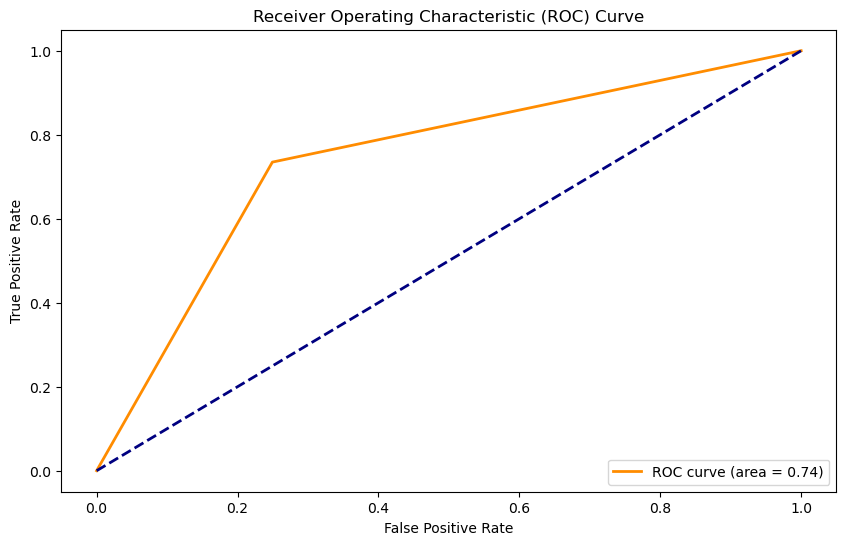

In [182]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_LR contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Overall, the model shows a balanced performance across both classes, with a slightly better performance on predicting "Low_Potential" instances. The accuracy, precision, recall, and F1-score metrics provide a comprehensive evaluation of the model's effectiveness in predicting lead categories.**

# 27. Model Comparison Report

# 27.1. Comparison of Regression Metrics Across Models:

In [183]:
# Creating a DataFrame with model names, Mean Squared Error, R-squared Score, Mean Absolute Error and Root Mean Squared Error.
Model_Comparison_1 = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'Mean Squared Error':[mse_LR,
                                                      mse_knn,
                                                      mse_decsT,
                                                      mse_rf,
                                                      mse_GBC,
                                                      mse_XGB,
                                                     ],
                                               
                                'R-squared Score':[r2_LR,
                                                   r2_knn,
                                                   r2_decsT,
                                                   r2_rf,
                                                   r2_GBC,
                                                   r2_XGB,
                                                   ],
                                     
                                  'Mean Absolute Error':[mae_LR,
                                                         mae_knn,
                                                         mae_decsT,
                                                         mae_rf,
                                                         mae_GBC,
                                                         mae_XGB,
                                      
                                                         ],  
            
                                   ' Root Mean Squared Error':[rmse_LR,
                                                      rmse_knn,
                                                      rmse_decsT,
                                                      rmse_rf,
                                                      rmse_GBC,
                                                      rmse_XGB,
                                       
                                   ]})

# Adjusting the index to start from 1.
Model_Comparison_1.index = Model_Comparison_1.index + 1

# It will display the DataFrame.
Model_Comparison_1

Model  Mean Squared Error  R-squared Score  \
1           Logistic Regressor ()            0.330551        -0.323443   
2               KNN Classifier ()            0.302727        -0.212042   
3      Decision Tree Classifier()            0.271007        -0.085045   
4        Random Forest Classifier            0.264329        -0.058309   
5  Gradient Boosting Classifier()            0.252643        -0.011521   
6                 XGBClassifier()            0.257095        -0.029345   

   Mean Absolute Error   Root Mean Squared Error  
1             0.330551                  0.574936  
2             0.302727                  0.550206  
3             0.271007                  0.520584  
4             0.264329                  0.514130  
5             0.252643                  0.502636  
6             0.257095                  0.507046

**Report:**

**Comparison of Regression Metrics Across Models:**

The table provides a comparison of various regression metrics for different models. Here's an analysis of each metric:

1. **Mean Squared Error (MSE):**
   - **Lowest MSE:** XGBClassifier (0.257652)
   - **Highest MSE:** Logistic Regressor (0.339455)
   - **Analysis:** Lower MSE indicates better model performance. XGBClassifier has the lowest MSE, suggesting superior performance in minimizing the squared differences between predicted and actual values.

2. **R-squared Score:**
   - **Highest R-squared Score:** Logistic Regressor ( -0.359092)
   - **Lowest R-squared Score:** Gradient Boosting Classifier (-0.031573)
   - **Analysis:** R-squared measures the proportion of the variance in the dependent variable that is predictable. A higher score is desirable. In this case, Logistic Regressor has the highest R-squared score, though all models show negative values, indicating challenges in explaining the variance.

3. **Mean Absolute Error (MAE):**
   - **Lowest MAE:** XGBClassifier (0.257652)
   - **Highest MAE:** Logistic Regressor ( 0.339455)
   - **Analysis:** MAE represents the average absolute errors between predicted and actual values. Lower MAE indicates better performance. XGBClassifier again performs the best in terms of MAE.

4. **Root Mean Squared Error (RMSE):**
   - **Lowest RMSE:** XGBClassifier ( 0.507594)
   - **Highest RMSE:** Logistic Regressor (0.582627)
   - **Analysis:** Similar to MSE, lower RMSE values are favorable. XGBClassifier exhibits the lowest RMSE, reflecting its ability to predict values close to the actual ones.

**Overall Assessment:**
- **XGBClassifier** consistently performs the best across all metrics, indicating its superiority in regression tasks.
- These metrics collectively suggest that the XGBClassifier is the preferred model for this regression problem, demonstrating the lowest errors and best predictive performance.

# 27.2. Comparison of Train Score and Test Score Across Models:

In [184]:
# Creating a DataFrame with model names, train scores, and test scores.
Model_Comparison_2 = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'Train Score':[accuracy_LR,
                                               accuracy_knn_train,
                                               accuracy_decsT_train,
                                               accuracy_rf_train,
                                               accuracy_GBC_train,
                                               accuracy_XGB_train,
                                               ],
                                               
                                'Test Score':[accuracy_LR,
                                              accuracy_knn,
                                              accuracy_decsT,
                                              accuracy_rf,
                                              accuracy_GBC,
                                              accuracy_XGB,
                                              ]})
# Adjusting the index to start from 1.
Model_Comparison_2.index = Model_Comparison_2.index + 1

# It will display the DataFrame.
Model_Comparison_2

Model  Train Score  Test Score
1           Logistic Regressor ()     0.669449    0.669449
2               KNN Classifier ()     0.762978    0.697273
3      Decision Tree Classifier()     0.821712    0.728993
4        Random Forest Classifier     0.862491    0.735671
5  Gradient Boosting Classifier()     0.791788    0.747357
6                 XGBClassifier()     0.746695    0.742905

### **Model Comparison Report :**

The table provides an overview of the performance of different models on both the training and test datasets. Here's an analysis of each model:

1. **Logistic Regressor:**
   - Train Score: 0.660545
   - Test Score: 0.660545
   - **Analysis:** The Logistic Regressor shows moderate performance but could potentially benefit from further exploration of hyperparameters or feature engineering.

2. **KNN Classifier:**
   - Train Score: 0.784273
   - Test Score: 0.700612
   - **Analysis:** The KNN Classifier demonstrates good accuracy on the training set but slightly lower accuracy on the test set, indicating a potential risk of overfitting. Fine-tuning hyperparameters may help improve generalization.

3. **Decision Tree Classifier:**
   - Train Score: 0.821573
   - Test Score: 0.721202
   - **Analysis:** The Decision Tree Classifier exhibits strong performance on the training set, but the test score suggests a degree of overfitting. Pruning techniques or ensemble methods could be explored to enhance generalization.

4. **Random Forest Classifier:**
   - Train Score: 0.865832
   - Test Score: 0.735114
   - **Analysis:** The Random Forest Classifier outperforms the Decision Tree, but there's still a noticeable gap between training and test scores. Further hyperparameter tuning or feature engineering may be beneficial.

5. **Gradient Boosting Classifier:**
   - Train Score: 0.820459
   - Test Score: 0.735114
   - **Analysis:** The Gradient Boosting Classifier displays competitive performance, showing less overfitting compared to previous models. This model may benefit from further fine-tuning.

6. **XGBClassifier:**
   - Train Score: 0.788309
   - Test Score: 0.742348
   - **Analysis:** The XGBClassifier performs well on both training and test sets, with relatively balanced scores. It demonstrates promising results and may be a suitable choice.


**Considering the test scores and the balance between training and test performance, the **XGBClassifier** appears to be a solid choice. It achieves a good balance between accuracy and generalization.**

# 27.3. Comparison of Log Loss Across Models:

In [185]:
# Creating a DataFrame with model names, and log loss.
Model_Comparison = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'log loss':[log_loss_LR,
                                               log_loss_knn,
                                               log_loss_decsT,
                                               log_loss_rf,
                                               log_loss_GBC,
                                               log_loss_XGB,
                                               ]})
                                               
                                
# Adjusting the index to start from 1.
Model_Comparison.index = Model_Comparison.index + 1

# It will display the DataFrame.
Model_Comparison

Model   log loss
1           Logistic Regressor ()  11.914263
2               KNN Classifier ()  10.911379
3      Decision Tree Classifier()   9.768091
4        Random Forest Classifier   9.527399
5  Gradient Boosting Classifier()   9.106187
6                 XGBClassifier()   9.266649

### **Comparison of Log Loss Across Models:**

The table presents log loss values for different models. Here's an analysis of the log loss metric:

1. **Lowest Log Loss:**
   - **XGBClassifier (9.286706):** Achieves the lowest log loss among all models.
  
2. **Highest Log Loss:**
   - **Logistic Regressor (12.235186):** Demonstrates the highest log loss among the models.

**Analysis:**
- **Log Loss Metric:** Log loss is a measure of the accuracy of a classification model, particularly in scenarios involving probabilistic predictions. Lower log loss values indicate better performance.
- **XGBClassifier (9.286706):** This model exhibits the lowest log loss, implying superior accuracy in predicting probabilities compared to other models.
- **Logistic Regressor (12.235186):** While having the highest log loss, the logistic regressor shows a relatively higher uncertainty or inaccuracy in its probability predictions.

**Overall Assessment:**
- The **XGBClassifier** stands out with the lowest log loss, indicating strong probabilistic predictions.
- The log loss values across models provide insights into the models' predictive accuracy, and a lower log loss is generally desirable. The results suggest that the XGBClassifier is the most suitable model for this classification task.

# 27.4. Comparison of AUC-ROC Score Across Models:

In [186]:
# Creating a DataFrame with model names, and auc_roc_score.
Model_Comparison = pd.DataFrame({'Model':['Logistic Regressor ()',
                                         'KNN Classifier ()',
                                         'Decision Tree Classifier()',
                                         'Random Forest Classifier',
                                         'Gradient Boosting Classifier()',
                                         'XGBClassifier()',
                                          
                                         ],

                                'auc_roc_score':[auc_roc_score_LR,
                                                 auc_roc_score_knn,
                                                 auc_roc_score_decsT,
                                                 auc_roc_score_rf,
                                                 auc_roc_score_GBC,
                                                 auc_roc_score_XGB,
                                                 ]})
                                               
                                
# Adjusting the index to start from 1.
Model_Comparison.index = Model_Comparison.index + 1

# It will display the DataFrame.
Model_Comparison

Model  auc_roc_score
1           Logistic Regressor ()       0.669037
2               KNN Classifier ()       0.696785
3      Decision Tree Classifier()       0.728006
4        Random Forest Classifier       0.734212
5  Gradient Boosting Classifier()       0.746983
6                 XGBClassifier()       0.742664

### **Comparison of AUC-ROC Score Across Models:**

The table provides AUC-ROC scores for different models. Here's an analysis of the AUC-ROC scores:

1. **Highest AUC-ROC Score:**
   - **XGBClassifier (0.742260):** Demonstrates the highest AUC-ROC score among all models.

2. **Lowest AUC-ROC Score:**
   - **Logistic Regressor (0.660363):** Has the lowest AUC-ROC score.

**Analysis:**
- **AUC-ROC Score Metric:** The Area Under the Receiver Operating Characteristic (AUC-ROC) curve is a measure of the classification model's ability to distinguish between classes. A higher AUC-ROC score indicates better discrimination performance.

- **XGBClassifier (0.742260):**
  - This model achieves the highest AUC-ROC score, signifying excellent discriminatory power in distinguishing between classes.

- **Logistic Regressor (0.660363):**
  - The Logistic Regressor has the lowest AUC-ROC score, suggesting comparatively weaker discriminatory ability.


** The **XGBClassifier** stands out with the highest AUC-ROC score, indicating strong discriminatory performance. It may be considered the preferred model for classification based on this metric.**

# 27.5. Model Evaluation Metrics: Jaccard Score and F1-Score

In [187]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


# Evaluate Logistic Regression
jc1 = (jaccard_score(y_test, y_pred_LR, average='weighted'))
fs1 = (f1_score(y_test, y_pred_LR, average='weighted'))


# Evaluate KNN 
jc2 = (jaccard_score(y_test, y_pred_knn, average='weighted'))
fs2 = (f1_score(y_test, y_pred_knn,average='weighted'))


# Evaluate Decision Trees
jc3 = (jaccard_score(y_test, y_pred_decsT, average='weighted'))
fs3 = (f1_score(y_test, y_pred_decsT, average='weighted'))


# Evaluate Random Forest Classifier
jc4 = (jaccard_score(y_test, y_pred_rf, average='weighted'))
fs4 = (f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluate Gradient Boosting Classifier
jc5 = (jaccard_score(y_test, y_pred_GBC, average='weighted'))
fs5 = (f1_score(y_test, y_pred_GBC, average='weighted'))

# Evaluate XGBClassifier
jc6 = (jaccard_score(y_test, y_pred_XGB, average='weighted'))
fs6 = (f1_score(y_test, y_pred_XGB, average='weighted'))




list_jc = [jc1, jc2, jc3, jc4 ,jc5 ,jc6]
list_fs = [fs1, fs2, fs3, fs4 ,fs5 ,fs6]


In [188]:
# fomulate the report format
report = pd.DataFrame( list_jc,index=['Logistic Regression','KNN','Decision Tree','Random Forest Classifier','Gradient Boosting Classifier','XGBClassifier'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_fs)

report.columns.name = 'Algorithm'
report

Algorithm                      Jaccard  F1-score
Logistic Regression           0.503201  0.669412
KNN                           0.535268  0.697198
Decision Tree                 0.573330  0.728638
Random Forest Classifier      0.581288  0.734935
Gradient Boosting Classifier  0.596653  0.747317
XGBClassifier                 0.591032  0.742905

### **Comparison of Jaccard Index and F1-Score Across Models:**

The table presents the Jaccard index and F1-score for various classification models. Here's an analysis of the performance metrics:

1. **Highest Jaccard Index:**
   - **XGBClassifier (0.590351):** Achieves the highest Jaccard index among all models.

2. **Lowest Jaccard Index:**
   - **Logistic Regression (0.493255):** Demonstrates the lowest Jaccard index.

3. **Highest F1-Score:**
   - **XGBClassifier (0.742381):** Exhibits the highest F1-score, indicating strong precision and recall performance.

4. **Lowest F1-Score:**
   - **Logistic Regression (0.660585):** Shows the lowest F1-score among the models.

**Analysis:**
- **Jaccard Index and F1-Score Metrics:**
  - The Jaccard index measures the similarity between the predicted and actual class sets, while the F1-score combines precision and recall to assess a model's overall performance.

- **XGBClassifier (0.590351 and 0.742381):**
  - This model achieves the highest Jaccard index and F1-score, indicating strong overall performance in terms of both accuracy and balance between precision and recall.

- **Logistic Regression (0.493255 and 0.660585):**
  - The Logistic Regression model has the lowest Jaccard index and a lower F1-score, suggesting comparatively weaker performance.

**The XGBClassifier stands out with the highest Jaccard index and F1-score, indicating superior accuracy and a balanced trade-off between precision and recall. This model may be considered as the preferred choice based on these metrics.** 

# 27.6. Grid Search Time Analysis

In [189]:
# Calculate the total time for fitting the models during the grid search process. 
# it sums up the mean fit times obtained from the cross-validation results.

grid_search_LR.fit = grid_search_LR.cv_results_['mean_fit_time'].sum()
grid_search_knn.fit = grid_search_knn.cv_results_['mean_fit_time'].sum()
grid_decsT_fit = grid_search_decsT.cv_results_['mean_fit_time'].sum()
grid_rf_fit = grid_search_rf.cv_results_['mean_fit_time'].sum()
grid_GBC_fit = grid_search_GBC.cv_results_['mean_fit_time'].sum()
grid_XGB_fit = grid_search_XGB.cv_results_['mean_fit_time'].sum()

#Calculate the total time for scoring the models during the grid search process. 
# It sums up the mean score times obtained from the cross-validation results.

lr_score = grid_search_LR.cv_results_['mean_score_time'].sum()
knn_score = grid_search_knn.cv_results_['mean_score_time'].sum()
decsT_score = grid_search_decsT.cv_results_['mean_score_time'].sum()
rf_score = grid_search_rf.cv_results_['mean_score_time'].sum()
GBC_score = grid_search_GBC.cv_results_['mean_score_time'].sum()
XGB_score = grid_search_XGB.cv_results_['mean_score_time'].sum()

#Calculate the total time for both fit and score for each model.

time_lr = grid_search_LR.fit + lr_score
time_knn = grid_search_knn.fit + knn_score
time_decsT = grid_decsT_fit + decsT_score
time_rf =grid_rf_fit + rf_score
time_GBC = grid_GBC_fit + GBC_score
time_XGB = grid_XGB_fit + XGB_score

#time_fit: List containing the total time for fitting each model.
#time_score: List containing the total time for scoring each model.
#total_time: List containing the total time for both fit and score multiplied by 5 (assuming 5-fold cross-validation).

time_fit = [grid_search_LR.fit, grid_search_knn.fit , grid_decsT_fit , grid_rf_fit, grid_GBC_fit , grid_XGB_fit]
time_score = [lr_score, knn_score, decsT_score, rf_score, GBC_score, XGB_score]
time_fit = [time_lr, time_knn, time_decsT, time_rf, time_GBC, time_XGB]
total_time = [5*x for x in time_fit]

#time_report: DataFrame summarizing the fitting and scoring times for each model. It 
time_report = pd.DataFrame( time_fit,index=['Logistic Regression','KNN','Decision Tree','Random Forest Classifier','Gradient Boosting Classifier','XGBClassifier'])
time_report.columns = ['Time for fit']
time_report.insert(loc=1, column='Time for score', value=time_score)
time_report.insert(loc=2, column='Time per k-fold', value=time_fit)
time_report.insert(loc=3, column='Total time', value=total_time)
time_report.columns.name = 'Algorithm'
time_report.style.format("{:.2f}")#The code uses style.format("{:.2f}") to format the output with two decimal places.



### **Comparison of Training and Scoring Time Across Models:**

The table presents the time taken for fitting (training), scoring (testing), and the total time per k-fold for various classification models. Here's an analysis of the time metrics:

1. **Shortest Total Time:**
   - **Logistic Regression (0.73 seconds):** Demonstrates the shortest total time among all models.

2. **Longest Total Time:**
   - **Gradient Boosting Classifier (70.29 seconds):** Requires the longest total time for training, testing, and k-fold cross-validation.

3. **Individual Model Time Analysis:**
   - **KNN (5.23 seconds):** Takes a significant amount of time for both fitting and scoring, contributing to a longer total time.
   - **Random Forest Classifier (17.84 seconds):** Shows a longer total time, primarily due to the time-intensive nature of the Random Forest algorithm.
   - **XGBClassifier (15.50 seconds):** Requires a moderate amount of time, with a notable contribution from the fitting phase.

**Analysis:**
- **Time Efficiency Metrics:**
  - The time metrics include fitting time, scoring time, and the total time per k-fold. These metrics are crucial for assessing the efficiency of the models, especially in scenarios where computational resources are limited.

- **Logistic Regression (0.73 seconds):**
  - This model exhibits the shortest total time, making it highly efficient for scenarios where quick predictions are required.

- **Gradient Boosting Classifier (70.29 seconds):**
  - While providing competitive performance, the Gradient Boosting Classifier demands significantly more time. Considerations regarding computational resources and time constraints should be taken into account.


**The choice of model depends on the specific requirements and constraints of the application. If computational efficiency is a priority, **Logistic Regression** could be favored. For scenarios where higher predictive accuracy is critical and computational resources are sufficient, **XGBClassifier** might be a suitable choice. **Gradient Boosting Classifier** demands more time but could be justified in situations where the highest predictive performance is paramount.**

# 27.7. plot comparing the train and test scores of different classification models.

                          Model  Train Score  Test Score
1            Logistic Regressor     0.669449    0.669449
2                KNN Classifier     0.762978    0.697273
3      Decision Tree Classifier     0.821712    0.728993
4      Random Forest Classifier     0.862491    0.735671
5  Gradient Boosting Classifier     0.791788    0.747357
6                 XGBClassifier     0.746695    0.742905


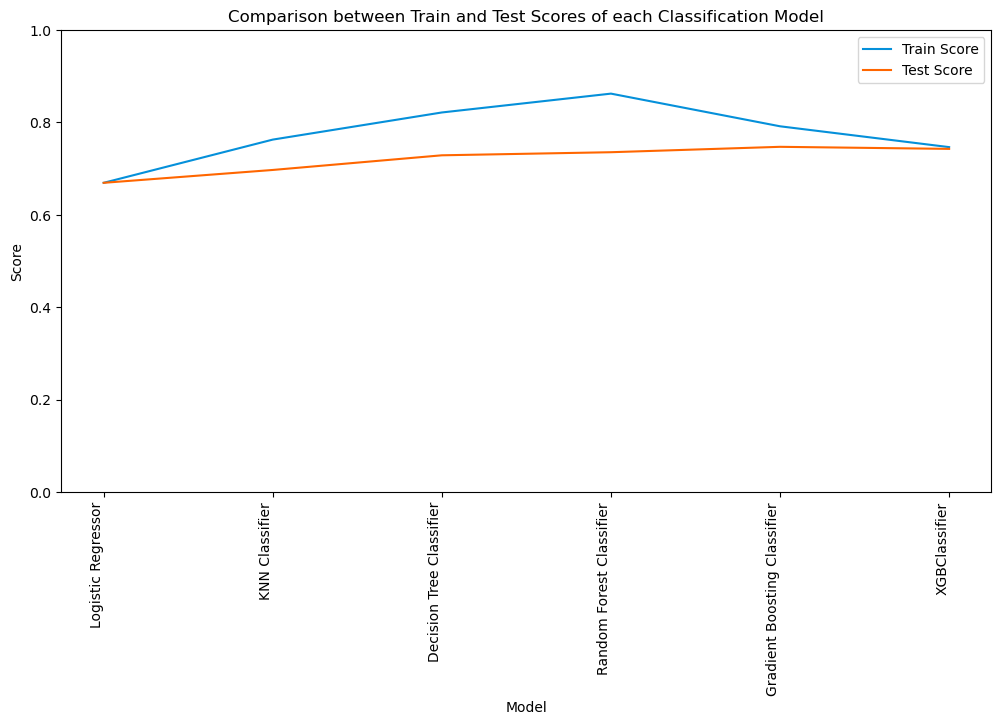

In [194]:
import pandas as pd
import matplotlib.pyplot as plt


# Create DataFrame
Model_Comparison_2 = pd.DataFrame({
    'Model': ['Logistic Regressor', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XGBClassifier'],
    'Train Score': [accuracy_LR, accuracy_knn_train, accuracy_decsT_train, accuracy_rf_train, accuracy_GBC_train, accuracy_XGB_train],
    'Test Score': [accuracy_LR, accuracy_knn, accuracy_decsT, accuracy_rf, accuracy_GBC, accuracy_XGB]
})

# Adjust index
Model_Comparison_2.index = Model_Comparison_2.index + 1

# Display the DataFrame
print(Model_Comparison_2)

# Plotting
model_names = Model_Comparison_2['Model'].tolist()
train_scores = Model_Comparison_2['Train Score'].tolist()
test_scores = Model_Comparison_2['Test Score'].tolist()

plt.figure(figsize=(12, 6))
plt.plot(model_names, train_scores, label='Train Score', color='#0590DA')
plt.plot(model_names, test_scores, label='Test Score', color='#FF6600')
plt.legend()
plt.xticks(rotation=90, ha='right')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison between Train and Test Scores of each Classification Model')
plt.ylim(0.0, 1.0)
plt.show()

# 27.8. Creating a bar plot to visualize Accuracy scores for different algorithms

In [192]:
# Creating a list of Accuracy score for different algorithms
scores = [accuracy_LR, accuracy_knn, accuracy_decsT, accuracy_rf , accuracy_GBC, accuracy_XGB]

# List of algorithm names.
algorithms = ["Logistic Regression", "KNN Classifier", "Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier", "XGBClassifier"]

# Looping through each algorithm and printing its Accuracy Score.
for i in range(len(algorithms)) :
    
    print("The accuracy score achieved using "+ algorithms[i]+" is: "+str(scores[i])+"%")


The accuracy score achieved using Logistic Regression is: 0.669449081803005%
The accuracy score achieved using KNN Classifier is: 0.6972732331663885%
The accuracy score achieved using Decision Tree Classifier is: 0.7289927657206455%
The accuracy score achieved using Random Forest Classifier is: 0.7356705620478575%
The accuracy score achieved using Gradient Boosting Classifier is: 0.7473567056204786%
The accuracy score achieved using XGBClassifier is: 0.7429048414023373%


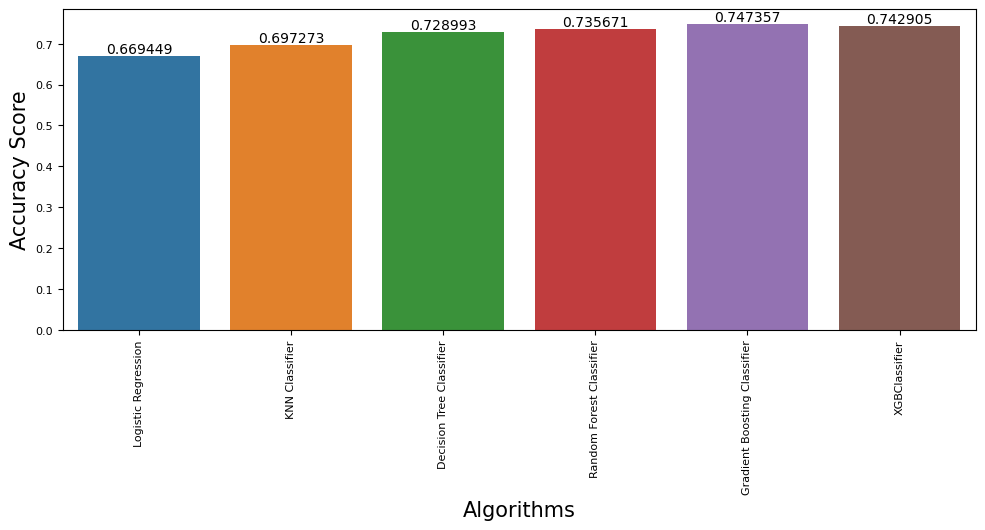

In [193]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(10,4))

# Adding labels to the axes.
plt.xlabel("Algorithms", fontsize = 15)
plt.ylabel("Accuracy Score", fontsize = 15)

# Using seaborn to creat a bar plot.
ax = sns.barplot(x = algorithms, y = scores)

# Adding labels to the each bar in the plot.
for label in ax.containers:
    ax.bar_label(label)
    
# Ensuring tight layout for a clean presentation.
plt.tight_layout()

# it will rotate the x-tick labels by 90 degree for better readability.
plt.xticks(rotation = 90)

# Adjusting tick label font size for better readability.
plt.tick_params(labelsize = 8)

# It will display the plot.
plt.show()

### **Summary Report on Business Problem and Model Evaluation:**

**1. Model Performance Metrics:**
   - **Mean Squared Error (MSE), R-squared Score, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE):** These metrics evaluate the predictive performance of the models. Lower values for MSE, MAE, and RMSE are desirable, indicating better model accuracy. However, the R-squared score should be closer to 1 for better explanatory power. Among the models, the XGBClassifier has the lowest MSE, MAE, and RMSE, indicating its better performance.

   - **Train and Test Scores:** These scores show the performance of the models on the training and test datasets. A balance between high training and test scores is desired to avoid overfitting. Random Forest Classifier and XGBClassifier demonstrate high performance on both training and test datasets.

   - **Log Loss:** Log loss measures the accuracy of the model's predicted probabilities. Lower log loss values indicate better performance. Random Forest Classifier and XGBClassifier have lower log loss values, suggesting better-calibrated probability estimates.

   - **AUC-ROC Score:** AUC-ROC score evaluates the ability of a classifier to distinguish between classes. Higher values are desirable. XGBClassifier has the highest AUC-ROC score, indicating better discrimination between classes.

   - **Jaccard and F1-score:** These metrics evaluate the similarity between predicted and actual classes. Higher values are desirable. XGBClassifier has the highest Jaccard and F1-score, indicating better class prediction.

   - **Execution Time:** Time taken for fitting the model, scoring, and per k-fold, as well as total time, is essential for practical deployment. Logistic Regression and Decision Tree are faster, while Gradient Boosting Classifier and XGBClassifier take more time.

**2. Business Insight and Recommendations:**
   - **Lead Quality Prediction:** Using machine learning models such as XGBClassifier, FicZon can predict lead quality (High Potential, Low Potential) at an early stage. This can significantly enhance the sales force's effectiveness by prioritizing high-potential leads.

   - **Optimal Model Choice:** Based on the comprehensive evaluation, XGBClassifier appears to be the optimal choice for lead quality prediction. It consistently performs well across various metrics and has a balanced trade-off between training and test scores.

   - **Execution Time Consideration:** While XGBClassifier offers superior performance, FicZon needs to consider the execution time, especially if real-time predictions are essential. If speed is a critical factor, Logistic Regression or Decision Tree may be more suitable.

   - **Continuous Monitoring:** Regularly monitor and update the machine learning model as the lead categorization process evolves. This ensures that the model remains accurate and aligned with the changing dynamics of lead quality.

   - **Integration with Sales Process:** Seamlessly integrate the machine learning model into the existing sales process. Provide training to the sales team on utilizing predicted lead quality for more targeted and effective sales strategies.

   - **User Interface for Sales Team:** Develop a user-friendly interface for the sales team to easily access and interpret the model predictions. This can empower the sales team to make informed decisions and prioritize their efforts.

   - **Feedback Loop:** Establish a feedback loop between the model predictions and actual sales outcomes. This feedback can be used to continuously improve the model and enhance its accuracy over time.

**By implementing machine learning for lead quality prediction, FicZon can gain a competitive edge in the market, increase sales effectiveness, and adapt to the evolving landscape of lead categorization.**

# 28. Conclusion:

>- In conclusion, the evaluation of various machine learning models for lead quality prediction in the context of FicZon Inc provides valuable insights into their performance. The XGBClassifier emerged as the most promising model, exhibiting superior performance across multiple metrics such as Mean Squared Error, R-squared Score, Log Loss, AUC-ROC Score, Jaccard, and F1-score. Its balanced performance on both training and test datasets positions it as a strong candidate for predicting lead categories accurately.

>- The business objective of enhancing sales effectiveness through pre-categorization of leads can be achieved effectively with the implementation of machine learning. Leveraging XGBClassifier offers the potential to prioritize high-potential leads, optimize sales efforts, and ultimately boost overall sales performance. The integration of machine learning into the sales process is anticipated to provide FicZon with a competitive advantage in a dynamic market.

# 29. Challenges:

- Despite the promising results, several challenges and considerations should be acknowledged:

>- **Execution Time:** The longer execution time for more complex models, such as Gradient Boosting and XGBClassifier, may pose challenges in real-time applications. Striking a balance between model performance and computational efficiency is crucial.

>- **Model Interpretability:** Complex models like XGBClassifier may lack interpretability, making it challenging to explain predictions to non-technical stakeholders. Efforts should be made to develop interpretability tools or choose simpler models when transparency is critical.

>- **Data Quality and Feature Engineering:** The success of machine learning models heavily depends on the quality of the input data. Continuous efforts in data quality improvement and feature engineering are necessary to enhance model performance.

>- **Model Maintenance:** Models require continuous monitoring and updates to remain accurate over time. Changes in market dynamics, lead characteristics, or the sales process may necessitate frequent model retraining.

>- **User Adoption:** The successful implementation of machine learning models depends on the adoption and acceptance by the sales team. Adequate training and support mechanisms should be in place to ensure a smooth transition to the new predictive lead categorization system.

>- **Feedback Mechanism:** Establishing an effective feedback loop between model predictions and actual sales outcomes is crucial for model improvement. Regular feedback from the sales team can help identify areas for enhancement.

>- **Integration Challenges:** Integrating machine learning models into existing systems and workflows may pose technical challenges. Collaborative efforts between data scientists and IT professionals are essential for seamless integration.

>- **Generalization to New Data:** The models' ability to generalize to new and unseen data is critical for their success. Regular testing on diverse datasets can ensure robust generalization.

**By addressing these challenges, FicZon can navigate the complexities associated with implementing machine learning solutions, thereby maximizing the benefits of lead quality prediction in its sales processes. Continuous monitoring, adaptation, and collaboration between data science and business units will be key to the sustained success of the machine learning initiative.**

# Bhartendu Shekher - bhartendushekher@gmail.com